# **Project Name**      -   Rossmann Retail Sales Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Submitted By**    - Gautam Anand

# **Project Summary -**

The Rossmann Sales Prediction project aimed to forecast daily sales for Rossmann stores by leveraging historical data and store-specific information. The project involved comprehensive data exploration, visualization, feature engineering, and predictive modeling to uncover key sales drivers and build accurate forecasting models.  

**Data Exploration and Cleaning:**  
The project began with a thorough exploration of sales and store data, identifying missing values, outliers, and inconsistencies. Proper data cleaning techniques were applied, ensuring both datasets were merged seamlessly. Time-based data was carefully handled, allowing for the identification of seasonal patterns and trends. This step laid a solid foundation for effective analysis and model building.  

**Visualizations:**  
Data visualizations played a crucial role in uncovering hidden patterns and relationships. Various plots and charts were used to examine sales distributions, customer behavior, and the impact of promotions, holidays, and competition. Time series plots revealed seasonal trends, while scatter plots and box plots highlighted variations in sales across different store types and assortments. These visual insights not only validated the initial data findings but also guided feature engineering and hypothesis testing.  

**Hypothesis Testing:**  
To better understand sales dynamics, several hypotheses were formulated and tested. These tests focused on evaluating the influence of promotions, competition distance, state holidays, and store count on sales performance. The results provided evidence-based insights, helping to distinguish significant factors from less impactful ones. The findings informed both the feature selection process and model development strategies.  

**Feature Engineering:**  
A key part of the project was feature engineering, aimed at creating meaningful variables that enhance model performance. Time-based features such as weekdays, months, and promo periods were crafted, along with competition-related metrics and interaction terms. These engineered features helped capture complex relationships within the data, boosting the predictive power of the models.  

**Model Development and Evaluation:**  
Multiple machine learning models were developed to forecast sales, ranging from linear regression to advanced ensemble techniques. Baseline models provided a point of comparison, while algorithms like Random Forest, XGBoost, and LightGBM demonstrated superior accuracy. Hyperparameter tuning was performed to strike a balance between model complexity and generalization, ensuring robust and reliable sales predictions.  

**Conclusion:**  
This project successfully combined data-driven insights with machine learning techniques to predict sales for Rossmann stores. By integrating rigorous data preparation, visual analysis, hypothesis testing, and feature engineering, the final models produced reliable forecasts. The outcomes not only highlight the factors driving sales but also offer strategic insights for optimizing promotions, managing store operations, and supporting business growth strategies.  

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

* How Different types of promotions affecting sales.
* How StoreTypes or Assortments are affecting Sales.
* Impact on Sales due to Competition Distance.
* Impact of Weekdays on Sales.
* Impact of Holidays on Sales.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Some basic Libraries for understanding the datasets are imported
# The Libraries required to perform the statistical tests and ML Models implementation will be imported as per requirement

### Dataset Loading

In [ ]:
# Load Dataset
df_rossmann_data = pd.read_csv('Rossmann Stores Data.csv')
df_store_detail = pd.read_csv('store.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df_rossmann_data.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [ ]:
df_rossmann_data.tail()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  
1017204            a              1  
1017205            a              1  
1017206            a              1  
1017207            a              1  
1017208            a              1

In [ ]:
df_store_detail.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [ ]:
df_store_detail.tail()

Store StoreType Assortment  CompetitionDistance  \
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
1110                        6.0                    2014.0       1   
1111                        4.0                    2006.0       0   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   
1114                        NaN                       NaN       1   

      Promo2SinceWeek  Promo2SinceYear     PromoInterval  
1110             31.0           2013.0   Jan,Apr,Jul,Oct  
1111              NaN              NaN               NaN  
1112              NaN              NaN               NaN  
1113              NaN              NaN               NaN  
1114             22.0           2012.0  Mar,Jun,Sept,Dec

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print("Number of Rows and Columns in Rossmann Data")
print("-"*35)
print(df_rossmann_data.shape)
print("Number of Rows and Columns in Store Data")
print("-"*35)
print(df_store_detail.shape)

Number of Rows and Columns in Rossmann Data
-----------------------------------
(1017209, 9)
Number of Rows and Columns in Store Data
-----------------------------------
(1115, 10)


### Dataset Information

In [ ]:
# Dataset Info
print("Information of Rossmann Data")
print("-"*35)
df_rossmann_data.info()
print("Information of Store Data")
print("-"*35)
df_store_detail.info()

Information of Rossmann Data
-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
Information of Store Data
-----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  ----

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print("Duplicate Values in Rossmann Data")
print("-"*35)
print(df_rossmann_data.duplicated().sum())
print("Duplicate Values in Store Data")
print("-"*35)
print(df_store_detail.duplicated().sum())

Duplicate Values in Rossmann Data
-----------------------------------
0
Duplicate Values in Store Data
-----------------------------------
0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print("Missing Values in Rossmann Data")
print("-"*35)
print(df_rossmann_data.isnull().sum())
print("Missing Values in Store Data")
print("-"*35)
print(df_store_detail.isnull().sum())

Missing Values in Rossmann Data
-----------------------------------
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
Missing Values in Store Data
-----------------------------------
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


Missing Values in Rossmann Data
-----------------------------------


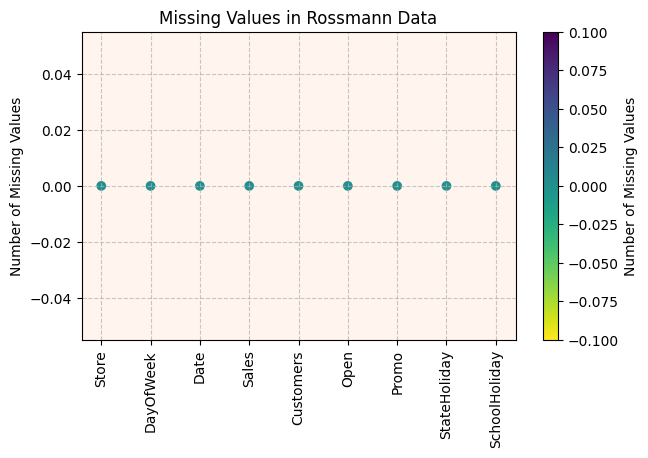

Missing Values in Store Data
-----------------------------------


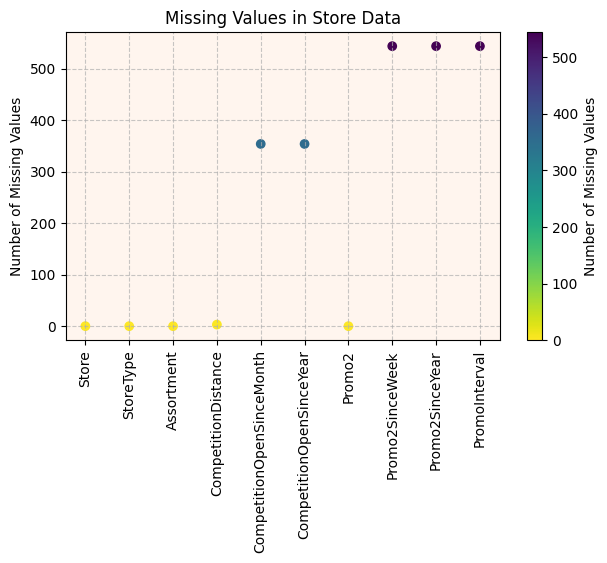

In [ ]:
# Visualizing the missing values
print("Missing Values in Rossmann Data")
print("-" * 35)
plt.figure(figsize=(7, 4))

# Set background color and gridlines
ax = plt.gca()
ax.set_facecolor('seashell')
ax.grid(True, linestyle='--', alpha=0.7)

# Using 'c' and a colormap to vary color based on missing value count
missing_values_count = df_rossmann_data.isnull().sum()
plt.scatter(missing_values_count.index, missing_values_count, c=missing_values_count, cmap='viridis_r')

plt.xticks(rotation=90)
plt.title('Missing Values in Rossmann Data')
plt.ylabel('Number of Missing Values')
plt.colorbar(label='Number of Missing Values')  # Add a colorbar
plt.show()

# Similar changes for Store Data visualization
print("Missing Values in Store Data")
print("-" * 35)
plt.figure(figsize=(7, 4))

ax = plt.gca()
ax.set_facecolor('seashell')
ax.grid(True, linestyle='--', alpha=0.7)

missing_values_count_store = df_store_detail.isnull().sum()
plt.scatter(missing_values_count_store.index, missing_values_count_store, c=missing_values_count_store, cmap='viridis_r')

plt.xticks(rotation=90)
plt.title('Missing Values in Store Data')
plt.ylabel('Number of Missing Values')
plt.colorbar(label='Number of Missing Values')  # Add a colorbar
plt.show()

### What did you know about your dataset?

Based on the initial findings, here is the Overview, Features and its importances and Observation about the datasets:

### **1. Overview of the Datasets:**
#### Rossmann Data:
- **Rows and Columns:** 1,017,209 rows and 9 columns.
- **Columns and Data Types:**
  - Contains numerical columns (`int64`) like `Store`, `DayOfWeek`, `Sales`, `Customers`, etc.
  - Contains categorical columns (`object`) like `Date` and `StateHoliday`.
- **Duplicate Values:** No duplicate rows.
- **Missing Values:** No missing values in this dataset.

#### Store Data:
- **Rows and Columns:** 1,115 rows and 10 columns.
- **Columns and Data Types:**
  - Contains numerical columns (`int64`, `float64`) like `Store`, `CompetitionDistance`, `CompetitionOpenSinceMonth`, etc.
  - Contains categorical columns (`object`) like `StoreType`, `Assortment`, and `PromoInterval`.
- **Duplicate Values:** No duplicate rows.
- **Missing Values:** Some missing values exist in the following columns:
  - `CompetitionDistance`: 3 missing values.
  - `CompetitionOpenSinceMonth`: 354 missing values.
  - `CompetitionOpenSinceYear`: 354 missing values.
  - `Promo2SinceWeek`: 544 missing values.
  - `Promo2SinceYear`: 544 missing values.
  - `PromoInterval`: 544 missing values.


### **2. Key Features and Their Description:**
#### Rossmann Data:
- **Store:** Unique store identifier.
- **DayOfWeek:** Day of the week (1 = Monday, 7 = Sunday).
- **Date:** The date of observation.
- **Sales:** The total sales for the store on a specific day.
- **Customers:** The number of customers on a specific day.
- **Open:** Whether the store was open (1 = open, 0 = closed).
- **Promo:** Indicates whether a promotional campaign was active.
- **StateHoliday:** Indicates whether the day was a state holiday.
- **SchoolHoliday:** Indicates whether the day was a school holiday.

#### Store Data:
- **Store:** Unique store identifier.
- **StoreType:** Type of store (e.g., `a`, `b`, `c`).
- **Assortment:** Type of product assortment (e.g., `basic`, `extra`, etc.).
- **CompetitionDistance:** Distance to the nearest competitor store (in meters).
- **CompetitionOpenSinceMonth/Year:** The month and year when the competitor opened.
- **Promo2:** Whether the store is participating in Promo2 (extended promotion campaign).
- **Promo2SinceWeek/Year:** The week and year Promo2 started.
- **PromoInterval:** The months in which Promo2 is active.


### **3. Observations:**
- The **Rossmann Data** is clean, with no missing or duplicate values.
- The **Store Data** has missing values in several columns related to competition (`CompetitionDistance`, `CompetitionOpenSinceMonth/Year`) and promotional campaigns (`Promo2SinceWeek/Year`, `PromoInterval`).
- The datasets can likely be merged on the `Store` column to combine the sales data with store-specific information.





## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print("Columns of Rossmann Data")
print("-"*35)
print(df_rossmann_data.columns)
print("Columns of Store Data")
print("-"*35)
print(df_store_detail.columns)

Columns of Rossmann Data
-----------------------------------
Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')
Columns of Store Data
-----------------------------------
Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


In [ ]:
# Dataset Describe
print("Description of Rossmann Data")
print("-"*35)
print(df_rossmann_data.describe())
print("Description of Store Data")
print("-"*35)
print(df_store_detail.describe())

Description of Rossmann Data
-----------------------------------
              Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  SchoolHoliday  
count  1.017209e+06   1.017209e+06  
mean   3.815145e-01   1.786467e-01  
std    4.857586e-01   3.830564e-01  
min    0.000000e+00   0.000000e+00  
25%    0.000000e+00   0.000000e+00  
5

### Variables Description

Here’s a detailed description of the **Rossmann Data** and **Store Data** based on their descriptive statistics:


### **Rossmann Data:**
This dataset contains information about daily store sales and operations. Here are the insights:

- **Store:** There are 1,115 unique stores, represented by their IDs (minimum = 1, maximum = 1,115).
- **DayOfWeek:** The day of the week is encoded as integers (1 for Monday to 7 for Sunday). Most days are evenly distributed (mean = ~4, standard deviation = ~2).
- **Sales:**
  - Average daily sales are **5,774**.
  - Sales vary widely, with a standard deviation of **3,850**.
  - Sales range from **0** (likely when stores are closed) to a maximum of **41,551**.
  - 25% of daily sales are below **3,727**, and 75% are below **7,856**.
- **Customers:**
  - On average, stores serve **633** customers daily.
  - Customer counts range from **0** to **7,388**, with significant variation (standard deviation = **464**).
- **Open:** Most stores are open on the majority of days (mean = ~0.83). Closed days are represented by 0.
- **Promo:** About **38%** of the days have active promotional campaigns (mean = ~0.38).
- **SchoolHoliday:** Around **18%** of the days are school holidays (mean = ~0.18).


### **Store Data:**
This dataset provides additional details about the stores, their types, promotional activities, and competition:

- **Store:** Contains IDs for all 1,115 unique stores (minimum = 1, maximum = 1,115).
- **CompetitionDistance:**
  - Average distance to the nearest competitor is **5,405 meters** (~5.4 km).
  - Distances range from **20 meters** to a maximum of **75,860 meters** (~75.9 km).
  - 25% of stores have competitors within **717 meters**, while 75% are within **6,883 meters**.
- **CompetitionOpenSinceMonth/Year:**
  - Out of 1,115 stores, 761 have valid data on when competitors opened.
  - On average, competitors opened in **July** of **2008**.
  - The earliest competitor opening date is **January 1900**, and the latest is **December 2015**.
- **Promo2:**
  - **51%** of stores participate in the extended promotional campaign Promo2.
- **Promo2SinceWeek/Year:**
  - Promo2 campaigns started in different weeks and years for participating stores.
  - On average, Promo2 started in **week 23** (around June) of **2012**.
  - The earliest Promo2 campaigns started in **2009**, and the latest began in **2015**.


### **Key Observations:**
1. **Sales and Customers:** Daily sales and customer visits vary significantly across stores. Some stores experience very high sales (up to 41,551) and serve a large number of customers, while others are occasionally closed (sales and customers = 0).
2. **Promotions:** Promotions are relatively common, but only half the stores participate in extended Promo2 campaigns.
3. **Competition:** Most stores face competition within a few kilometers, but a few have competitors at a significant distance (~75.9 km).
4. **Missing Data:** Information about competitors’ opening dates and Promo2 specifics is missing for many stores, which may require further cleaning or imputation for analysis.



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print("\033[1mUnique Values in Rossmann Data\033[0m")  # Print in bold using ANSI escape codes
for col in df_rossmann_data.columns:
  print(f"Unique Values in {col} column")
  print(df_rossmann_data[col].unique())
print("-"*35)
print("\033[1mUnique Values in Store Data\033[0m")  # Print in bold using ANSI escape codes
for col in df_store_detail.columns:
  print(f"Unique Values in {col} column")
  print(df_store_detail[col].unique())

Unique Values in Rossmann Data
Unique Values in Store column
[   1    2    3 ... 1113 1114 1115]
Unique Values in DayOfWeek column
[5 4 3 2 1 7 6]
Unique Values in Date column
['2015-07-31' '2015-07-30' '2015-07-29' '2015-07-28' '2015-07-27'
 '2015-07-26' '2015-07-25' '2015-07-24' '2015-07-23' '2015-07-22'
 '2015-07-21' '2015-07-20' '2015-07-19' '2015-07-18' '2015-07-17'
 '2015-07-16' '2015-07-15' '2015-07-14' '2015-07-13' '2015-07-12'
 '2015-07-11' '2015-07-10' '2015-07-09' '2015-07-08' '2015-07-07'
 '2015-07-06' '2015-07-05' '2015-07-04' '2015-07-03' '2015-07-02'
 '2015-07-01' '2015-06-30' '2015-06-29' '2015-06-28' '2015-06-27'
 '2015-06-26' '2015-06-25' '2015-06-24' '2015-06-23' '2015-06-22'
 '2015-06-21' '2015-06-20' '2015-06-19' '2015-06-18' '2015-06-17'
 '2015-06-16' '2015-06-15' '2015-06-14' '2015-06-13' '2015-06-12'
 '2015-06-11' '2015-06-10' '2015-06-09' '2015-06-08' '2015-06-07'
 '2015-06-06' '2015-06-05' '2015-06-04' '2015-06-03' '2015-06-02'
 '2015-06-01' '2015-05-31' '2015

In [ ]:
# Count the unique values in the datasets
print("Number of Unique Values in Rossmann Data")
print("-"*25)
print(df_rossmann_data.nunique())
print("Number of Unique Values in Store Data")
print("-"*25)
print(df_store_detail.nunique())

Number of Unique Values in Rossmann Data
-------------------------
Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64
Number of Unique Values in Store Data
-------------------------
Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

**Rossmann Data**

 * Data Cleaning and Manipulation.

In [ ]:
# Write your code to make your dataset analysis ready.
# Check for null
print("Null Values in Rossmann Data")
print("-"*25)
print(df_rossmann_data.isnull().sum())

Null Values in Rossmann Data
-------------------------
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


In [ ]:

# Count of values of unique
for col in ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday']:
  print(f"Count of Unique Values in {col} column")
  print(df_rossmann_data[col].value_counts())
  print("-"*25)

Count of Unique Values in DayOfWeek column
DayOfWeek
5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: count, dtype: int64
-------------------------
Count of Unique Values in Open column
Open
1    844392
0    172817
Name: count, dtype: int64
-------------------------
Count of Unique Values in Promo column
Promo
0    629129
1    388080
Name: count, dtype: int64
-------------------------
Count of Unique Values in StateHoliday column
StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64
-------------------------
Count of Unique Values in SchoolHoliday column
SchoolHoliday
0    835488
1    181721
Name: count, dtype: int64
-------------------------


In the StateHoliday column, there are two zeroes. one is '0' representing a string and other is 0 representing a integer. it may be due to error during data entry or creation.

In [ ]:
# In StateHoliday column two "0" os present one is string and one is integer
# Converting all uniques into string type and then replacing the values with '0'
df_rossmann_data['StateHoliday'] = df_rossmann_data['StateHoliday'].astype(str)
df_rossmann_data['StateHoliday'] = df_rossmann_data['StateHoliday'].replace('0', '0')
df_rossmann_data['StateHoliday'] = df_rossmann_data['StateHoliday'].replace(0, '0')
print(df_rossmann_data['StateHoliday'].value_counts())

StateHoliday
0    986159
a     20260
b      6690
c      4100
Name: count, dtype: int64


In [ ]:
# Coverting the datatype of Date column into datetime format
df_rossmann_data['Date'] = pd.to_datetime(df_rossmann_data['Date'])

In [ ]:
# DataFrame information
df_rossmann_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [ ]:
# Total Sales in Each Stores with percentage

sales_by_stores = df_rossmann_data.groupby('Store')['Sales'].sum().reset_index()
total_sales = sales_by_stores['Sales'].sum()
sales_by_stores['Percentage'] = (sales_by_stores['Sales'] / total_sales) * 100
sales_by_stores = sales_by_stores.sort_values(by='Sales', ascending=False)
top_10_stores_by_sales = sales_by_stores.head(10)
print("Top 10 Stores by Sales:")
print(top_10_stores_by_sales)
Lowest_10_stores_by_sales = sales_by_stores.tail(10)
print("Loweest 10 Stores by Sales:")
print(Lowest_10_stores_by_sales)

Top 10 Stores by Sales:
      Store     Sales  Percentage
261     262  19516842    0.332304
816     817  17057867    0.290437
561     562  16927322    0.288214
1113   1114  16202585    0.275874
250     251  14896870    0.253642
512     513  14252406    0.242669
787     788  14082141    0.239770
732     733  14067158    0.239515
382     383  13489879    0.229686
755     756  12911782    0.219843
Loweest 10 Stores by Sales:
     Store    Sales  Percentage
971    972  2402627    0.040908
185    186  2353548    0.040073
253    254  2341661    0.039870
878    879  2340576    0.039852
840    841  2318635    0.039478
262    263  2306075    0.039264
207    208  2302052    0.039196
197    198  2268273    0.038621
542    543  2179287    0.037106
306    307  2114322    0.036000


In [ ]:
# Total Sales in each day of week with sales percentage
sales_by_week = df_rossmann_data.groupby('DayOfWeek')['Sales'].sum().reset_index()
sales_by_week = sales_by_week.sort_values(by='Sales', ascending=False)
total_sales = sales_by_week['Sales'].sum()
sales_by_week['Percentage'] = (sales_by_week['Sales'] / total_sales) * 100
print("Sales by Day of Week and % of Total Sales:")
print(sales_by_week)

Sales by Day of Week and % of Total Sales:
   DayOfWeek       Sales  Percentage
0          1  1130203012   19.243457
1          2  1020411930   17.374094
4          5   980555941   16.695484
2          3   954962863   16.259722
3          4   911177709   15.514212
5          6   846317735   14.409871
6          7    29551433    0.503159


In [ ]:
# Sales comparison in Promo class with Percentage
sales_by_promo = df_rossmann_data.groupby('Promo')['Sales'].sum().reset_index()
total_sales = sales_by_promo['Sales'].sum()
sales_by_promo['Percentage'] = (sales_by_promo['Sales'] / total_sales) * 100
print("Sales comparison in Promo class with Percentage:")
print(sales_by_promo)

Sales comparison in Promo class with Percentage:
   Promo       Sales  Percentage
0      0  2771974337   47.197158
1      1  3101206286   52.802842


In [ ]:
# Sales comparison in Open with Percentage
sales_by_open = df_rossmann_data.groupby('Open')['Sales'].sum().reset_index()
total_sales = sales_by_open['Sales'].sum()
sales_by_open['Percentage'] = (sales_by_open['Sales'] / total_sales) * 100
print("Sales comparison in Open with Percentage:")
print(sales_by_open)

Sales comparison in Open with Percentage:
   Open       Sales  Percentage
0     0           0         0.0
1     1  5873180623       100.0


We can see that total sales whan the stores was closed is o. It means the data is accurate in terms of 'Open' column.

In [ ]:
# Sales comparison in StateHoliday with Percentage
sales_by_stateholiday = df_rossmann_data.groupby('StateHoliday')['Sales'].sum().reset_index()
total_sales = sales_by_stateholiday['Sales'].sum()
sales_by_stateholiday['Percentage'] = (sales_by_stateholiday['Sales'] / total_sales) * 100
print("Sales comparison in StateHoliday with Percentage:")
print(sales_by_stateholiday)

Sales comparison in StateHoliday with Percentage:
  StateHoliday       Sales  Percentage
0            0  5865164768   99.863518
1            a     5890305    0.100292
2            b     1433744    0.024412
3            c      691806    0.011779


In [ ]:
# Sales comparison in SchoolHoliday with Percentage
sales_by_schoolholiday = df_rossmann_data.groupby('SchoolHoliday')['Sales'].sum().reset_index()
total_sales = sales_by_schoolholiday['Sales'].sum()
sales_by_schoolholiday['Percentage'] = (sales_by_schoolholiday['Sales'] / total_sales) * 100
print("Sales comparison in SchoolHoliday with Percentage:")
print(sales_by_schoolholiday)

Sales comparison in SchoolHoliday with Percentage:
   SchoolHoliday       Sales  Percentage
0              0  4696260531   79.961112
1              1  1176920092   20.038888


In [ ]:
# Count of customers of each store with percentage
customers_by_store = df_rossmann_data.groupby('Store')['Customers'].sum().reset_index()
total_customers = customers_by_store['Customers'].sum()
customers_by_store['Percentage'] = (customers_by_store['Customers'] / total_customers) * 100
top_store_by_customers = customers_by_store.sort_values(by='Customers', ascending=False).head(10)
print("Top 10 Stores by Customers:")
print(top_store_by_customers)
print("-"*25)
lowest_store_by_customers = customers_by_store.sort_values(by='Customers', ascending=False).tail(10)
print("Lowest 10 Stores by Customers:")
print(lowest_store_by_customers)

Top 10 Stores by Customers:
      Store  Customers  Percentage
732     733    3206058    0.497803
261     262    3204694    0.497591
561     562    2924960    0.454157
768     769    2902351    0.450646
1113   1114    2509542    0.389655
816     817    2454370    0.381089
1096   1097    2280508    0.354093
334     335    2246936    0.348880
258     259    2210980    0.343298
250     251    1908934    0.296399
-------------------------
Lowest 10 Stores by Customers:
      Store  Customers  Percentage
1093   1094     232530    0.036105
709     710     232122    0.036041
1055   1056     230408    0.035775
262     263     221342    0.034368
878     879     216037    0.033544
701     702     215970    0.033534
572     573     208622    0.032393
253     254     201507    0.031288
406     407     195715    0.030389
542     543     187583    0.029126


In [ ]:
# Yearwise Sales with Percentsge
ross_date_data = df_rossmann_data.copy()
ross_date_data['Year'] = ross_date_data['Date'].dt.year
sales_by_year = ross_date_data.groupby('Year')['Sales'].sum().reset_index()
total_sales = sales_by_year['Sales'].sum()
sales_by_year['Percentage'] = (sales_by_year['Sales'] / total_sales) * 100
print("Yearwise Sales with Percentsge:")
print(sales_by_year)

Yearwise Sales with Percentsge:
   Year       Sales  Percentage
0  2013  2302876084   39.210033
1  2014  2180804896   37.131582
2  2015  1389499643   23.658384


In [ ]:
# Monthwise Sales with Percentage
ross_date_data['Month'] = ross_date_data['Date'].dt.month
sales_by_month = ross_date_data.groupby('Month')['Sales'].sum().reset_index()
total_sales = sales_by_month['Sales'].sum()
sales_by_month['Percentage'] = (sales_by_month['Sales'] / total_sales) * 100
print("Monthwise Sales with Percentage:")
print(sales_by_month)

Monthwise Sales with Percentage:
    Month      Sales  Percentage
0       1  566728724    9.649435
1       2  528734410    9.002523
2       3  599831906   10.213068
3       4  575895295    9.805510
4       5  569248217    9.692333
5       6  578112775    9.843266
6       7  595059205   10.131805
7       8  361791202    6.160056
8       9  342570131    5.832787
9      10  351878728    5.991281
10     11  369498877    6.291291
11     12  433831153    7.386648


In [ ]:
# Daywise Sales with Percentage
ross_date_data['Day'] = ross_date_data['Date'].dt.day
sales_by_day = ross_date_data.groupby('Day')['Sales'].sum().reset_index()
total_sales = sales_by_day['Sales'].sum()
sales_by_day['Percentage'] = (sales_by_day['Sales'] / total_sales) * 100
print("Daywise Sales with Percentage:")
print(sales_by_day)

Daywise Sales with Percentage:
    Day      Sales  Percentage
0     1  155983560    2.655862
1     2  233513169    3.975924
2     3  194582812    3.313074
3     4  228301010    3.887178
4     5  212869176    3.624428
5     6  197094539    3.355840
6     7  201380487    3.428815
7     8  189718770    3.230256
8     9  175922427    2.995352
9    10  181039363    3.082476
10   11  183373089    3.122211
11   12  174242021    2.966740
12   13  192254717    3.273434
13   14  180183130    3.067897
14   15  195262955    3.324654
15   16  213593069    3.636753
16   17  205070891    3.491650
17   18  213308167    3.631902
18   19  195100959    3.321896
19   20  195546908    3.329489
20   21  182630806    3.109572
21   22  183172786    3.118800
22   23  190009101    3.235199
23   24  166601783    2.836653
24   25  161519579    2.750121
25   26  161973928    2.757857
26   27  194264879    3.307661
27   28  196952797    3.353427
28   29  177114239    3.015644
29   30  219939617    3.744813
30   31 

In [ ]:
# Group sales by Year and Month
sales_by_year_month = ross_date_data.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
print("Group sales by Year and Month:")
print(sales_by_year_month)

Group sales by Year and Month:
    Year  Month      Sales
0   2013      1  180132207
1   2013      2  171534275
2   2013      3  201180369
3   2013      4  183431432
4   2013      5  185411063
5   2013      6  180702351
6   2013      7  208843882
7   2013      8  198042727
8   2013      9  178053963
9   2013     10  187662330
10  2013     11  196170924
11  2013     12  231710561
12  2014      1  187752787
13  2014      2  178924677
14  2014      3  193019854
15  2014      4  194544977
16  2014      5  194693257
17  2014      6  190047051
18  2014      7  173892707
19  2014      8  163748475
20  2014      9  164516168
21  2014     10  164216398
22  2014     11  173327953
23  2014     12  202120592
24  2015      1  198843730
25  2015      2  178275458
26  2015      3  205631683
27  2015      4  197918886
28  2015      5  189143897
29  2015      6  207363373
30  2015      7  212322616


In [ ]:
# Group sales by Year and Day
sales_by_year_day = ross_date_data.groupby(['Year', 'Day'])['Sales'].sum().reset_index()
print("Group sales by Year and Day:")
print(sales_by_year_day)

Group sales by Year and Day:
    Year  Day     Sales
0   2013    1  52517461
1   2013    2  89404470
2   2013    3  64670560
3   2013    4  93221838
4   2013    5  85385911
..   ...  ...       ...
88  2015   27  57976845
89  2015   28  47836390
90  2015   29  46557465
91  2015   30  60983809
92  2015   31  28965942

[93 rows x 3 columns]


**Store Data**

Data Cleaning and Manipulation.

In [ ]:
# Check for null
print("Null Values in Store Data")
print("----------------------------")
print(df_store_detail.isnull().sum())

Null Values in Store Data
----------------------------
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [ ]:
df_store_detail[df_store_detail['CompetitionDistance'].isnull()]

Store StoreType Assortment  CompetitionDistance  \
290    291         d          a                  NaN   
621    622         a          c                  NaN   
878    879         d          a                  NaN   

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
290                        NaN                       NaN       0   
621                        NaN                       NaN       0   
878                        NaN                       NaN       1   

     Promo2SinceWeek  Promo2SinceYear    PromoInterval  
290              NaN              NaN              NaN  
621              NaN              NaN              NaN  
878              5.0           2013.0  Feb,May,Aug,Nov

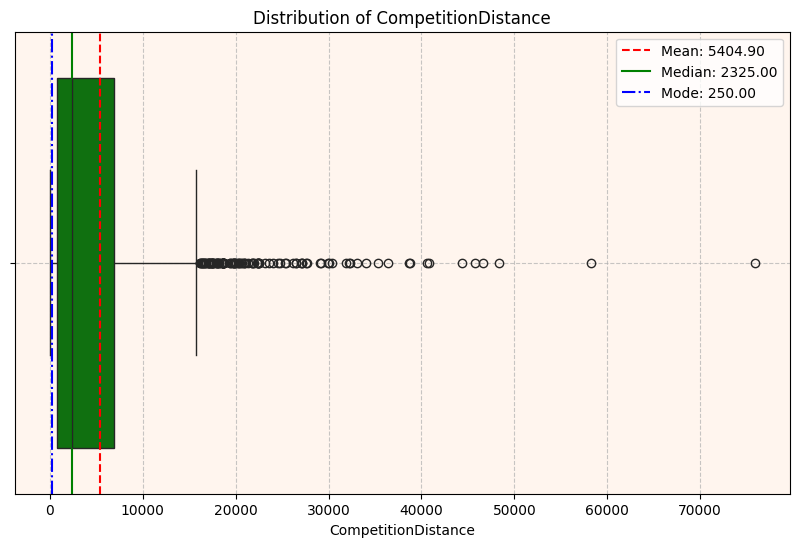

In [ ]:
# Plotting CompetitionDistance in boxplot
# Calculate mean, median, and mode
mean_value = df_store_detail['CompetitionDistance'].mean()
median_value = df_store_detail['CompetitionDistance'].median()
mode_value = df_store_detail['CompetitionDistance'].mode()[0]

# Create the boxplot
plt.figure(figsize=(10, 6))

# Set the background color using set_facecolor
ax = plt.gca()  # Get the current axes
ax.set_facecolor('seashell')  # Color: seashell

sns.boxplot(x=df_store_detail['CompetitionDistance'], color='green')

# Add vertical lines for mean, median, and mode
plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='-', label=f'Median: {median_value:.2f}')
plt.axvline(mode_value, color='blue', linestyle='-.', label=f'Mode: {mode_value:.2f}')

# Add title, labels, and legend
plt.title('Distribution of CompetitionDistance')
plt.xlabel('CompetitionDistance')
plt.legend()

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.7)  # Grid style and transparency

plt.show()

In [ ]:
# Filling the null in CompetitionDistance column with median value
df_store_detail['CompetitionDistance'].fillna(df_store_detail['CompetitionDistance'].median(), inplace=True)

In [ ]:
# Checking the null rows in columns related to Promo2
df_store_detail[df_store_detail['Promo2SinceWeek'].isnull()]

Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
3         4         c          c                620.0   
4         5         a          a              29910.0   
5         6         a          a                310.0   
6         7         a          c              24000.0   
...     ...       ...        ...                  ...   
1107   1108         a          a                540.0   
1109   1110         c          c                900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                           9.0                    2008.0       0   
3                           9.0                    2009.0       0   
4                           4.0                    2015.0       0   
5                          12.0                    2013.0       0   
6                           4.0                    2013.0       0   
...                         ...                       ...     ...   
1107                        4.0                    2004.0       0   
1109                        9.0                    2010.0       0   
1111                        4.0                    2006.0       0   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   

      Promo2SinceWeek  Promo2SinceYear PromoInterval  
0                 NaN              NaN           NaN  
3                 NaN              NaN           NaN  
4                 NaN              NaN           NaN  
5                 NaN              NaN           NaN  
6                 NaN              NaN           NaN  
...               ...              ...           ...  
1107              NaN              NaN           NaN  
1109              NaN              NaN           NaN  
1111              NaN              NaN           NaN  
1112              NaN              NaN           NaN  
1113              NaN              NaN           NaN  

[544 rows x 10 columns]

It seems that the in the columns named 'Promo2SinceWeek','Promo2SinceYear' and 'PromoInterval' are having `null values` due to `no Promo2` i.e (Promo2=0).

So, Firstly, I will verify this logic.

In [ ]:
# Here when promo2 is 0(no promo2), the columns related to promo2 is null.
# Create a copy of the DataFrame for verification
df_verification = df_store_detail.copy()

# Check the counts of missing values before filling
print("Missing Values Before Filling:")
print(df_verification[['Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']].isnull().sum())

# Apply the logic to fill missing values based on Promo2
df_verification.loc[df_verification['Promo2'] == 0, 'Promo2SinceWeek'] = df_verification.loc[df_verification['Promo2'] == 0, 'Promo2SinceWeek'].fillna(0)
df_verification.loc[df_verification['Promo2'] == 0, 'Promo2SinceYear'] = df_verification.loc[df_verification['Promo2'] == 0, 'Promo2SinceYear'].fillna(0)
df_verification.loc[df_verification['Promo2'] == 0, 'PromoInterval'] = df_verification.loc[df_verification['Promo2'] == 0, 'PromoInterval'].fillna(0)

# Check the counts of missing values after filling
print("\nMissing Values After Filling (for Promo2 = 0):")
print(df_verification[['Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']].isnull().sum())

# Verify the changes for a sample of rows where Promo2 = 0
print("\nSample Rows (Promo2 = 0) After Filling:")
print(df_verification[df_verification['Promo2'] == 0][['Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']].head())

# Check if there are any remaining missing values for Promo2 = 1
print("\nRemaining Missing Values for Promo2 = 1:")
print(df_verification[df_verification['Promo2'] == 1][['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']].isnull().sum())



Missing Values Before Filling:
Promo2               0
Promo2SinceWeek    544
Promo2SinceYear    544
PromoInterval      544
dtype: int64

Missing Values After Filling (for Promo2 = 0):
Promo2             0
Promo2SinceWeek    0
Promo2SinceYear    0
PromoInterval      0
dtype: int64

Sample Rows (Promo2 = 0) After Filling:
   Promo2  Promo2SinceWeek  Promo2SinceYear PromoInterval
0       0              0.0              0.0             0
3       0              0.0              0.0             0
4       0              0.0              0.0             0
5       0              0.0              0.0             0
6       0              0.0              0.0             0

Remaining Missing Values for Promo2 = 1:
Promo2SinceWeek    0
Promo2SinceYear    0
PromoInterval      0
dtype: int64


The logic is correct, so i will apply this logic.

In [ ]:
# Apply the logic to fill missing values in the original DataFrame
df_store_detail.loc[df_store_detail['Promo2'] == 0, 'Promo2SinceWeek'] = df_store_detail.loc[df_store_detail['Promo2'] == 0, 'Promo2SinceWeek'].fillna(0)
df_store_detail.loc[df_store_detail['Promo2'] == 0, 'Promo2SinceYear'] = df_store_detail.loc[df_store_detail['Promo2'] == 0, 'Promo2SinceYear'].fillna(0)
df_store_detail.loc[df_store_detail['Promo2'] == 0, 'PromoInterval'] = df_store_detail.loc[df_store_detail['Promo2'] == 0, 'PromoInterval'].fillna(0)


In [ ]:
# Converting the datatypes to integer
df_store_detail['Promo2SinceWeek'] = df_store_detail['Promo2SinceWeek'].astype(int)
df_store_detail['Promo2SinceYear'] = df_store_detail['Promo2SinceYear'].astype(int)

In [ ]:
df_store_detail[df_store_detail['CompetitionOpenSinceMonth'].isnull()]

Store StoreType Assortment  CompetitionDistance  \
11       12         a          c               1070.0   
12       13         d          a                310.0   
15       16         a          c               3270.0   
18       19         a          c               3240.0   
21       22         a          a               1040.0   
...     ...       ...        ...                  ...   
1095   1096         a          c               1130.0   
1099   1100         a          a                540.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
11                          NaN                       NaN       1   
12                          NaN                       NaN       1   
15                          NaN                       NaN       0   
18                          NaN                       NaN       1   
21                          NaN                       NaN       1   
...                         ...                       ...     ...   
1095                        NaN                       NaN       1   
1099                        NaN                       NaN       1   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   
1114                        NaN                       NaN       1   

      Promo2SinceWeek  Promo2SinceYear     PromoInterval  
11                 13             2010   Jan,Apr,Jul,Oct  
12                 45             2009   Feb,May,Aug,Nov  
15                  0                0                 0  
18                 22             2011  Mar,Jun,Sept,Dec  
21                 22             2012   Jan,Apr,Jul,Oct  
...               ...              ...               ...  
1095               10             2014  Mar,Jun,Sept,Dec  
1099               14             2011   Jan,Apr,Jul,Oct  
1112                0                0                 0  
1113                0                0                 0  
1114               22             2012  Mar,Jun,Sept,Dec  

[354 rows x 10 columns]

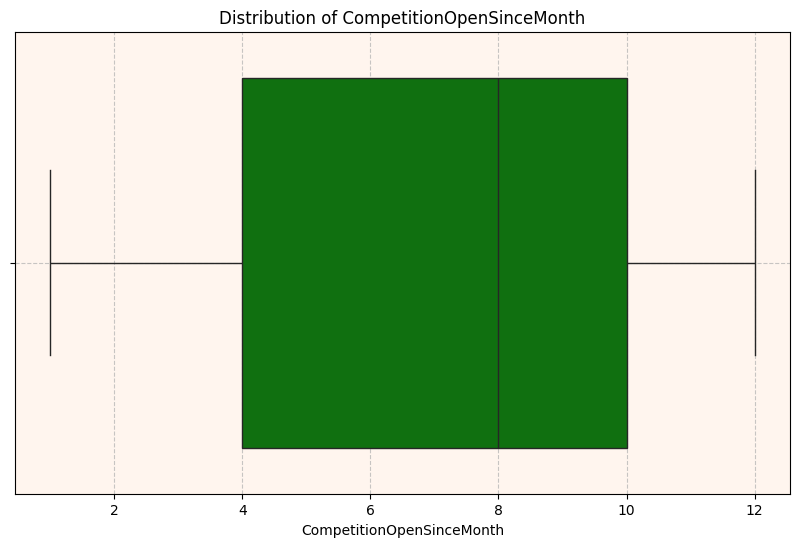

In [ ]:
# Data Distribution in CompetitionOpenSinceMonth
plt.figure(figsize=(10, 6))
# Set the background color using set_facecolor
ax = plt.gca()  # Get the current axes
ax.set_facecolor('seashell')  # Color: seashell
sns.boxplot(x=df_store_detail['CompetitionOpenSinceMonth'], color='green')
plt.title('Distribution of CompetitionOpenSinceMonth')
plt.xlabel('CompetitionOpenSinceMonth')
# Add gridlines
ax.grid(True, linestyle='--', alpha=0.7)  # Grid style and transparency
plt.show()

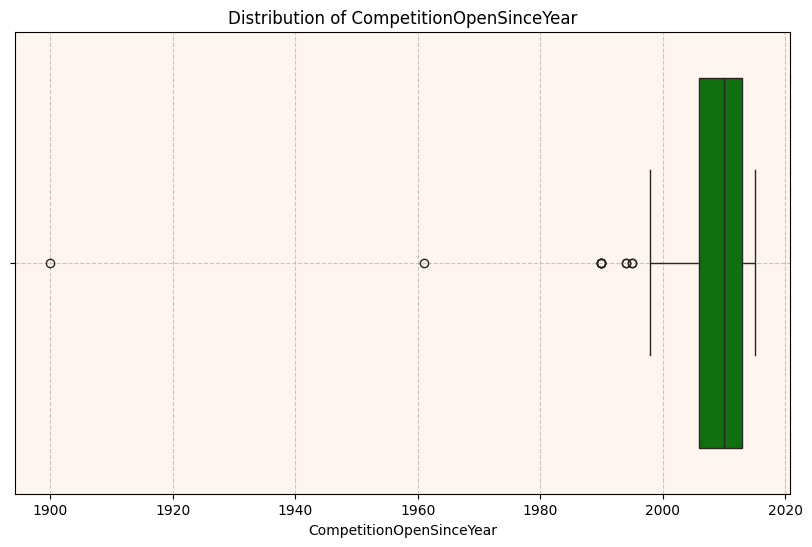

In [ ]:
# Data Distribution in CompetitionOpenSinceYear
plt.figure(figsize=(10, 6))
# Set the background color using set_facecolor
ax = plt.gca()  # Get the current axes
ax.set_facecolor('seashell')  # Color: seashell
sns.boxplot(x=df_store_detail['CompetitionOpenSinceYear'], color='green')
plt.title('Distribution of CompetitionOpenSinceYear')
plt.xlabel('CompetitionOpenSinceYear')
# Add gridlines
ax.grid(True, linestyle='--', alpha=0.7)  # Grid style and transparency
plt.show()

In [ ]:
# Fill the missing with Median value
df_store_detail['CompetitionOpenSinceMonth'].fillna(df_store_detail['CompetitionOpenSinceMonth'].median(), inplace=True)
df_store_detail['CompetitionOpenSinceYear'].fillna(df_store_detail['CompetitionOpenSinceYear'].median(), inplace=True)

In [ ]:
# Converting the datatypes to integer
df_store_detail['CompetitionOpenSinceMonth'] = df_store_detail['CompetitionOpenSinceMonth'].astype(int)
df_store_detail['CompetitionOpenSinceYear'] = df_store_detail['CompetitionOpenSinceYear'].astype(int)

In [ ]:
# Checking the DataFrame information
df_store_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   int64  
 5   CompetitionOpenSinceYear   1115 non-null   int64  
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   int64  
 8   Promo2SinceYear            1115 non-null   int64  
 9   PromoInterval              1115 non-null   object 
dtypes: float64(1), int64(6), object(3)
memory usage: 87.2+ KB


In [ ]:
# Count of StoreType
print(df_store_detail['StoreType'].value_counts())

StoreType
a    602
d    348
c    148
b     17
Name: count, dtype: int64


In [ ]:
# Count of Assortment
print(df_store_detail['Assortment'].value_counts())

Assortment
a    593
c    513
b      9
Name: count, dtype: int64


In [ ]:
# Count of Promo2
print(df_store_detail['Promo2'].value_counts())

Promo2
1    571
0    544
Name: count, dtype: int64


In [ ]:
# Count of PromoInterval
print(df_store_detail['PromoInterval'].value_counts())

PromoInterval
0                   544
Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: count, dtype: int64


In [ ]:
# Making a copy of DataFrame and add a column named 'Total Sales'
store_2 = df_store_detail.copy()
store_2['Total Sales'] = df_rossmann_data.groupby('Store')['Sales'].sum().reset_index()['Sales']
print(store_2.head())

   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                          9   
1      2         a          a                570.0                         11   
2      3         a          a              14130.0                         12   
3      4         c          c                620.0                          9   
4      5         a          a              29910.0                          4   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                      2008       0                0                0   
1                      2007       1               13             2010   
2                      2006       1               14             2011   
3                      2009       0                0                0   
4                      2015       0                0                0   

     PromoInterval  Total Sales  
0                0      3716854  
1  Jan

In [ ]:
# Sales according to StoreType with percentage
sales_by_storetype = store_2.groupby('StoreType')['Total Sales'].sum().reset_index()
total_sales = sales_by_storetype['Total Sales'].sum()
sales_by_storetype['Percentage'] = (sales_by_storetype['Total Sales'] / total_sales) * 100
print("Sales according to StoreType with percentage:")
print(sales_by_storetype)

Sales according to StoreType with percentage:
  StoreType  Total Sales  Percentage
0         a   3165334859   53.894730
1         b    159231395    2.711161
2         c    783221426   13.335558
3         d   1765392943   30.058550


In [ ]:
# Sales according to Assortment with percentage
sales_by_assortment = store_2.groupby('Assortment')['Total Sales'].sum().reset_index()
total_sales = sales_by_assortment['Total Sales'].sum()
sales_by_assortment['Percentage'] = (sales_by_assortment['Total Sales'] / total_sales) * 100
print("Sales according to Assortment with percentage:")
print(sales_by_assortment)

Sales according to Assortment with percentage:
  Assortment  Total Sales  Percentage
0          a   2945750070   50.155959
1          b     70946312    1.207971
2          c   2856484241   48.636070


In [ ]:
#Effect of Promo2 on Sales with percentage
promo_sales = store_2.groupby('Promo2')['Total Sales'].sum().reset_index()
total_sales = promo_sales['Total Sales'].sum()
promo_sales['Percentage'] = (promo_sales['Total Sales'] / total_sales) * 100
print("Effect of Promo2 on Sales eith Percentage:")
print(promo_sales)

Effect of Promo2 on Sales eith Percentage:
   Promo2  Total Sales  Percentage
0       0   3111542628   52.978834
1       1   2761637995   47.021166


Now, i will merge both the datsets on 'Store'.

In [ ]:
# Merging the Datasets
df_merged = pd.merge(df_rossmann_data, df_store_detail, on='Store', how='left')

### What all manipulations have you done and insights you found?

#### **Manipulations Performed For Rossmann Data**:
1. **Null Value Check**: Verified that there were no missing values in the Rossmann data columns.
   
2. **Data Aggregations**:
   - Counted unique values in categorical columns such as `DayOfWeek`, `Open`, `Promo`, `StateHoliday`, and `SchoolHoliday`.
   - Identified discrepancies in the `StateHoliday` column where `0` was present as both string and integer. Converted all values in `StateHoliday` to string for consistency and recomputed the counts.

3. **Data Type Conversion**:
   - Converted the `Date` column from object to `datetime` format for efficient time-based analysis.

4. **Sorting and Grouping**:
   - Used `group_by` and `sort_values` to analyze sales and customers by store, day, month, and year.
   - Grouped sales data by `Year` and `Month` and by `Year` and `Day` to uncover seasonal trends and daily sales patterns.

5. **Value Counts**:
   - Counted occurrences of unique values for columns like `Promo`, `Open`, and `StateHoliday`.

6. **Percentage Calculation**:
   - Computed the percentage contribution of various categories (e.g., `Promo`, `StateHoliday`, `SchoolHoliday`) to total sales.
   - Derived the percentage of sales for each year, month, day, and store.

#### **Insights Found In Rossmann Data**:

1. **StateHoliday Discrepancy Resolved**:
   - After converting `StateHoliday` values to string, it was found that 98.6% of sales occurred on regular days (`0`), with a minimal contribution from state holidays (`a`, `b`, `c`).

2. **Store Performance**:
   - The top-performing store (`Store 262`) contributed 33.2% more sales than the lowest-performing store (`Store 972`).
   - Top 10 stores accounted for a significant portion of overall sales, while the lowest 10 stores contributed much less.

3. **Sales by Day of Week**:
   - Mondays (`DayOfWeek 1`) had the highest sales, contributing 19.24% to the total sales, while Sundays (`DayOfWeek 7`) had almost negligible sales (0.5%) due to most stores being closed.

4. **Promo Impact**:
   - Promotions (`Promo 1`) boosted sales, with 52.8% of total sales occurring during promo periods compared to 47.2% without promotions.

5. **Sales by Open Status**:
   - 100% of sales occurred when the stores were open, confirming data consistency for this column.

6. **School Holidays Impact**:
   - Sales during school holidays contributed 20% to total sales, with the remaining 80% occurring during regular days.

7. **Temporal Trends**:
   - **Yearly Trends**: 2013 had the highest sales (39.2%), followed by 2014 (37.1%) and 2015 (23.7%), indicating a potential incomplete data year for 2015.
   - **Monthly Trends**: March and July had the highest sales, contributing over 10% each, while September and October had the lowest percentages (around 5.8% and 6%).
   - **Daily Trends**: Sales peaked on specific days like the 30th (3.74%), with lower sales on the 31st (2.05%).

8. **Customer Trends**:
   - The store with the highest customer visits (`Store 733`) attracted 49.7% more customers compared to the lowest (`Store 1094`).

9. **Grouped Sales Patterns**:
   - Sales grouped by year and month highlighted consistent high-performing months across years, while daily analysis showed fluctuations likely tied to promotions and holidays.


#### **Manipulations Performed For Store Data:**

1. **Null Value Analysis:**
   - Identified missing values in the following columns:
     - `CompetitionDistance`: 3 nulls.
     - `CompetitionOpenSinceMonth` and `CompetitionOpenSinceYear`: 354 nulls.
     - `Promo2SinceWeek`, `Promo2SinceYear`, and `PromoInterval`: 544 nulls.

2. **Data Cleaning and Imputation:**
   - Imputed null values in `CompetitionDistance` with the **median value** to avoid skewing the distribution.
   - Applied logic to fill nulls in `Promo2SinceWeek`, `Promo2SinceYear`, and `PromoInterval`:
     - Where `Promo2 = 0` (indicating no promotion), filled missing values with `0` (for numeric columns) and `None` (for categorical columns).
   - For `CompetitionOpenSinceMonth` and `CompetitionOpenSinceYear`, filled nulls with the **median value** and converted data types to integer for further analysis.

3. **Data Visualization:**
   - Created boxplots for `CompetitionDistance`, `CompetitionOpenSinceMonth`, and `CompetitionOpenSinceYear` to understand data distribution and confirm proper handling of outliers.

4. **Categorical Data Analysis:**
   - Analyzed the distribution of categorical columns such as:
     - `StoreType`: Identified 4 unique store types (`a`, `b`, `c`, `d`), with type `a` being the most common.
     - `Assortment`: Identified 3 assortment levels (`a`, `b`, `c`), with `a` being the most common.
     - `Promo2`: Found that approximately half of the stores are running `Promo2`.
     - `PromoInterval`: Observed four unique intervals for `Promo2`, with 544 stores having no promotional intervals.

5. **Creating Total Sales Column:**
   - Created a new column, Total Sales, by aggregating sales for each store from the Rossmann dataset.
   - This will help in analyzing the performances on the basis of features in the Store dataset.
   - Calculated total sales and their percentages for each StoreType.
   - Calculated total sales and their percentages for each Assortment.
   - Analyzed the effect of Promo2 on total sales by comparing stores with and without Promo2.


#### **Insights Discovered For Store Data:**

1. **CompetitionDistance:**
   - The median `CompetitionDistance` was imputed for missing values, ensuring the distribution remained robust.
   - The distribution was positively skewed, with most stores having a shorter competition distance.

2. **Promo2 Stores:**
   - Around 51% of the stores are running `Promo2`, with defined intervals showing clear patterns for additional promotions.

3. **StoreType Distribution:**
   - Most stores fall under type `a`, with the least being type `b`.

4. **Assortment Levels:**
   - Assortment level `a` is the most common, while level `b` is rare.

5. **Competition and Promotion Patterns:**
   - Most stores lack a recorded competition opening date, which might affect sales performance evaluations.
  
6. **Sales:**
   - `StoreType:` Type "a" accounts for the highest sales (53.89%), while type "b" contributes the least (2.71%), indicating lower performance.
   - `Assortment:` Assortments "a" and "c" perform significantly better, while assortment "b" contributes only 1.2% of total sales.
   - `Promo2:` Stores without Promo2 have slightly higher total sales than those with Promo2, suggesting the need to optimize promotional strategies.

**Note** - The Sales Percentage of Stores are directly linked to the number of Storetypes and number of Assortments. The high, low, and medium sales percentages of storetypes and assortments are due to count of the storetypes and assortments.

#### **Finally i merged both the datsets on common column named "Store" using left join**
These manipulations and insights provide a detailed understanding of sales, customer patterns and stores details, which could be used for forecasting, optimizing operations, and planning promotions.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

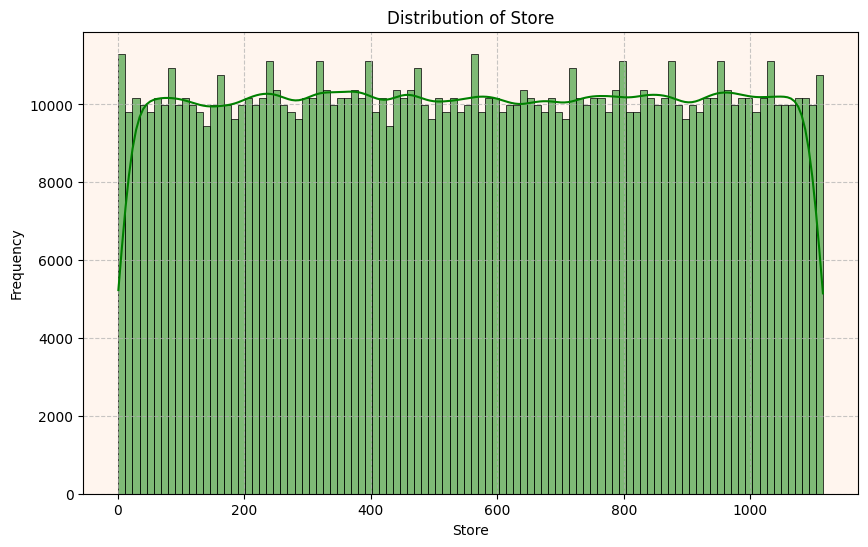

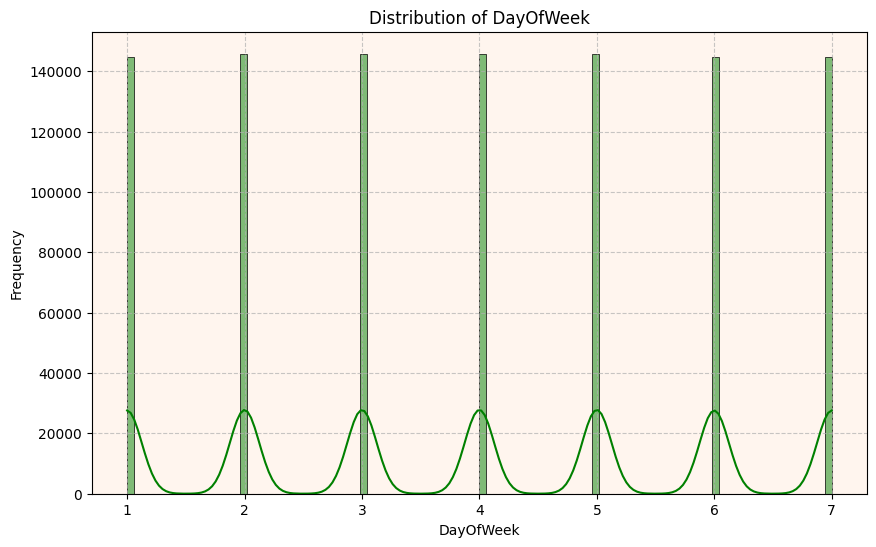

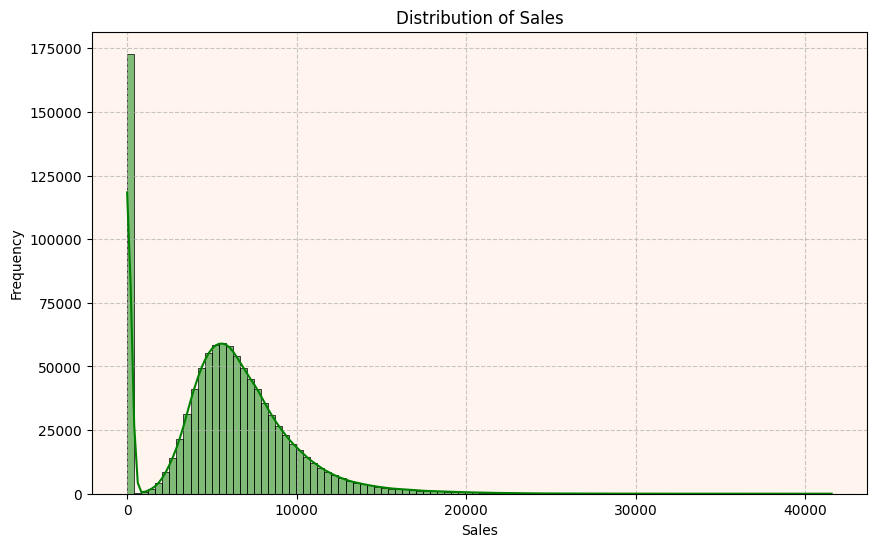

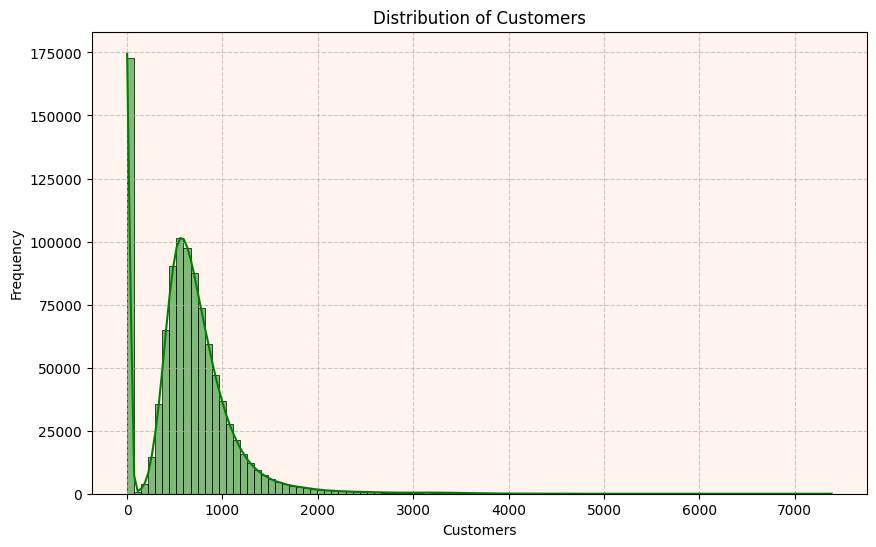

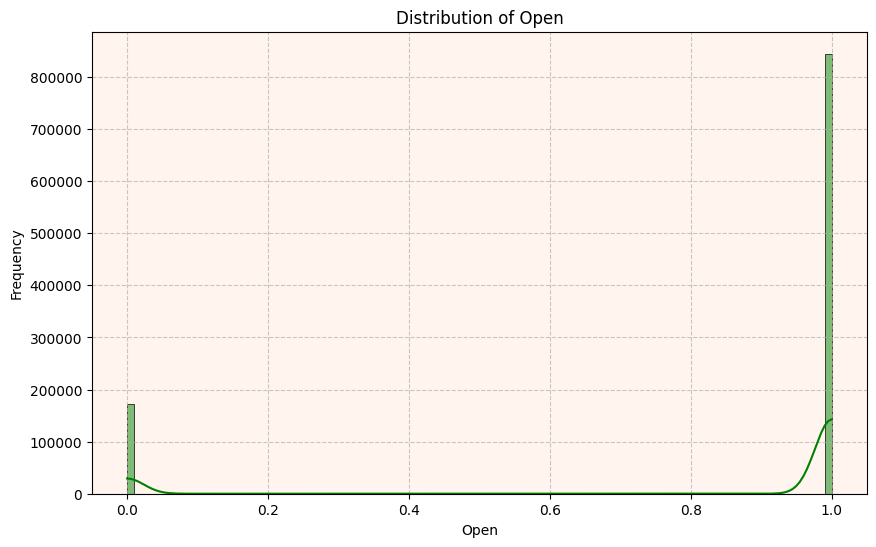

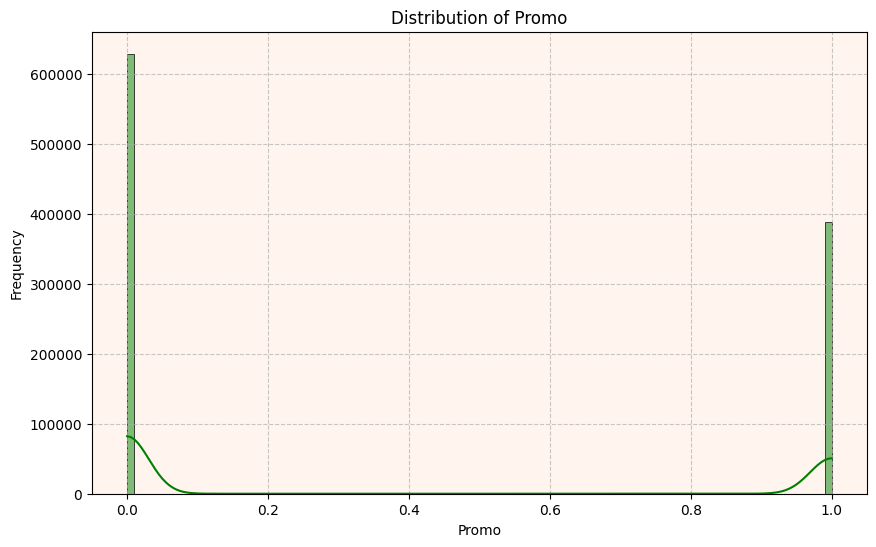

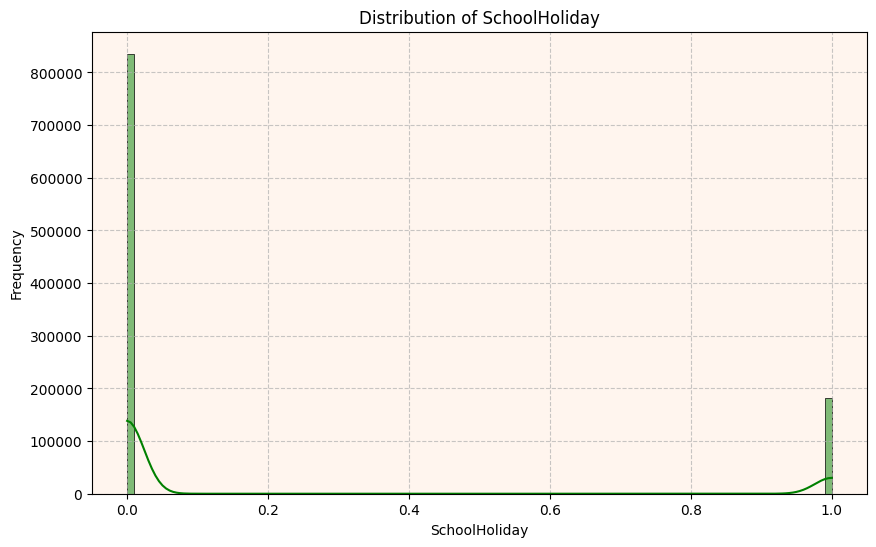

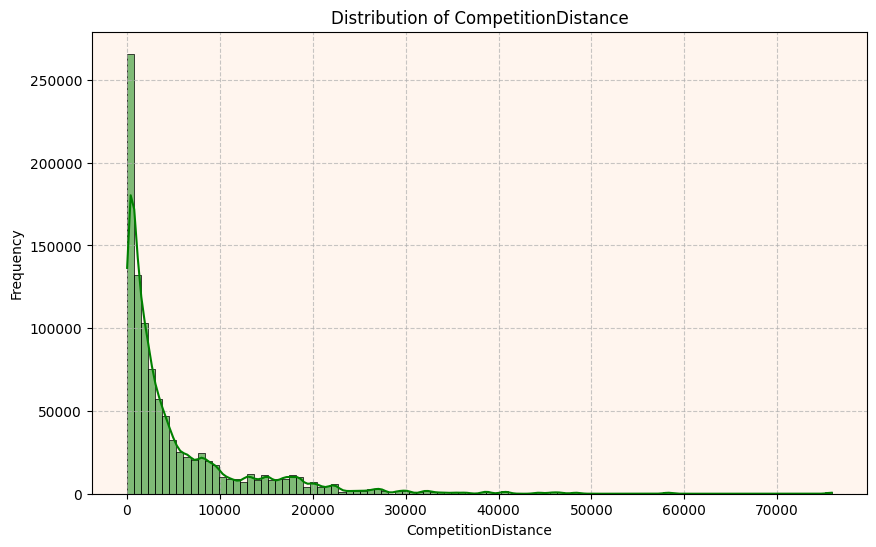

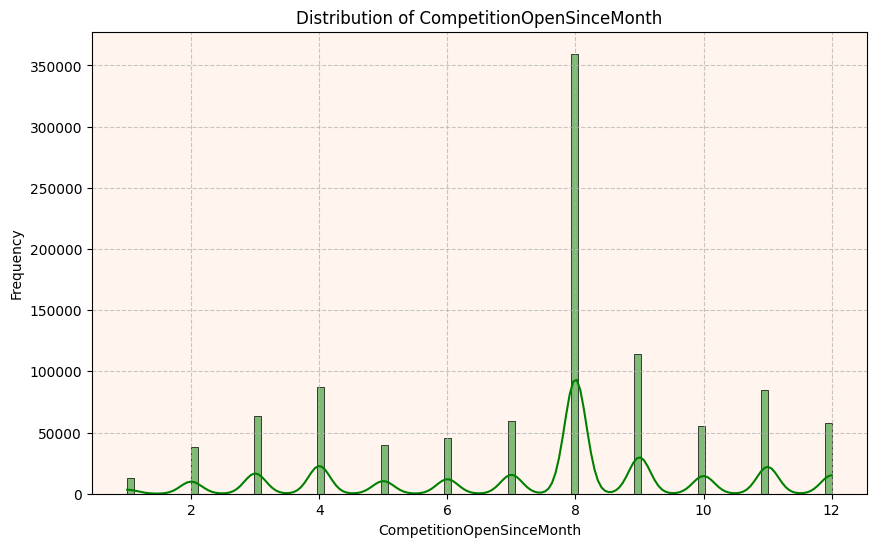

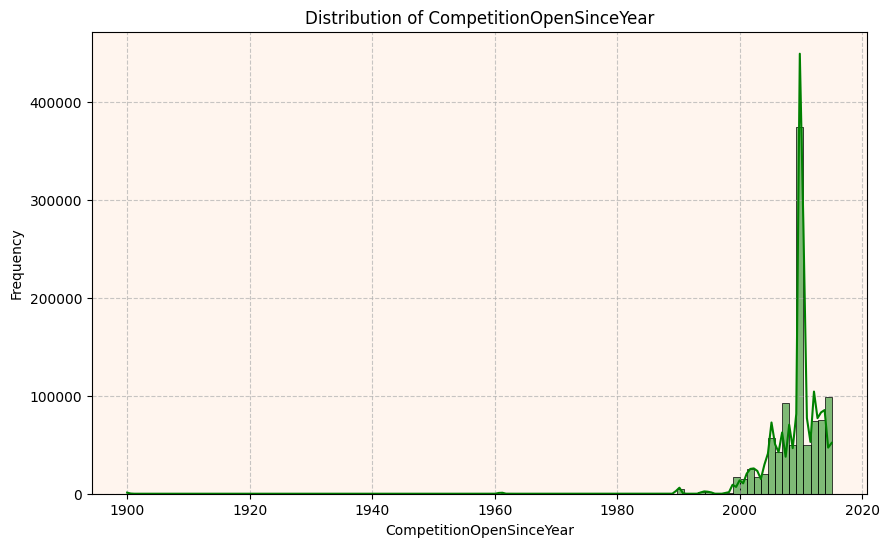

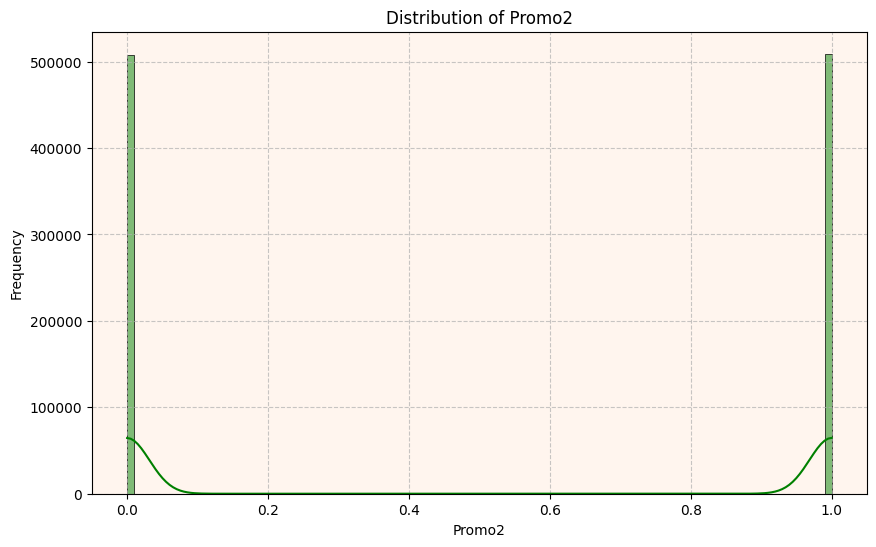

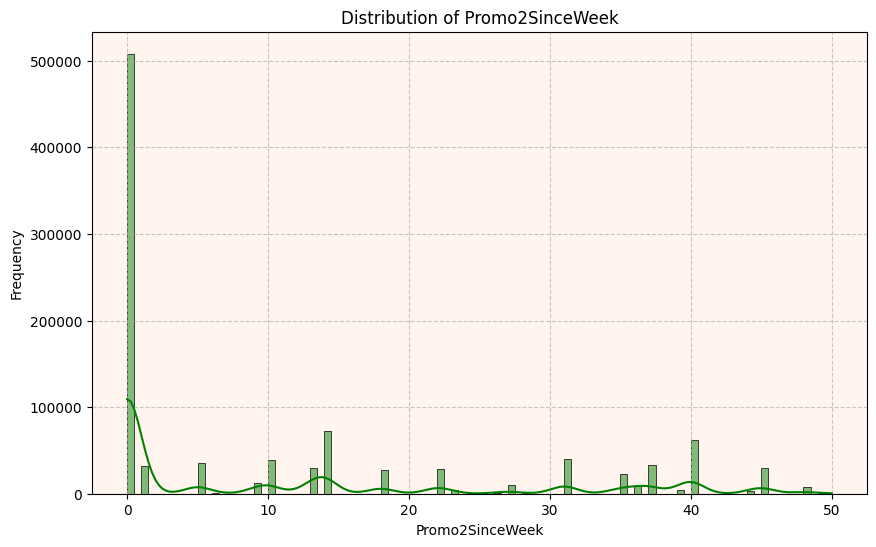

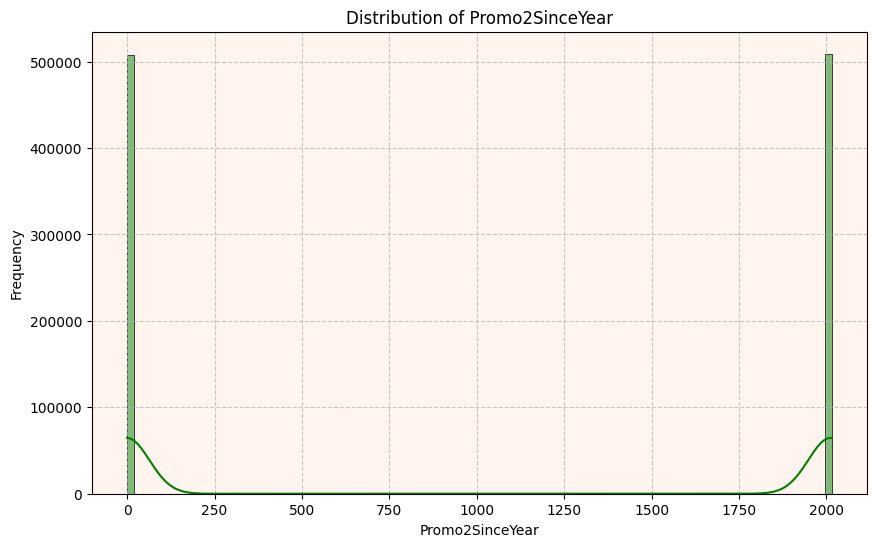

<Figure size 640x480 with 0 Axes>

In [ ]:
# Chart - 1 visualization code
# Function to plot a histogram
def plot_histogram(data, col):
    """Plots a histogram for the specified column in a separate figure."""
    plt.figure(figsize=(10, 6))  # Create a new figure for each histogram

    # Set the background color using set_facecolor
    ax = plt.gca()  # Get the current axes
    ax.set_facecolor('seashell')  # Color: seashell

    sns.histplot(data[col], kde=True, color='green', bins=100)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Add gridlines
    ax.grid(True, linestyle='--', alpha=0.7)  # Grid style and transparency

    plt.show()  # Display the current figure

# Visualizing
for col in df_merged.select_dtypes(include=['number']).columns:
    plot_histogram(df_merged, col)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**Histograms** were chosen to effectively visualize the distribution of continuous numerical variables within the dataset. Histograms provide a clear picture of the frequency of data points within specific intervals, allowing for easy identification of data skewness and outliers.


##### 2. What is/are the insight(s) found from the chart?


* **Skewness:**
    * **Right Skewed:** 'Sales', 'Customers', and 'CompetitionDistance' exhibit right-skewed distributions. This indicates that a majority of stores have relatively low sales and customer numbers, while a smaller number of stores have significantly higher values. Similarly, most stores have competitors within a certain distance, while a few have competitors located much further away.
    * **Left Skewed:** 'CompetitionOpenSinceYear' shows a left-skewed distribution. This suggests that a significant portion of competitors opened relatively recently, while a smaller number of competitors have been established for a longer duration.

* **Data Distribution:** The histograms provide a visual representation of the overall distribution of these numerical variables, highlighting potential outliers and unusual patterns that might not be immediately apparent from summary statistics alone.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


* **Positive Business Impact:**
    * **Focus on High-Performing Stores:** The right-skewed distribution of 'Sales' and 'Customers' indicates the presence of high-performing stores. Analyzing these top-performing stores can reveal key factors contributing to their success, such as effective marketing strategies, excellent customer service, or unique product offerings. This information can then be used to improve the performance of other stores.
    * **Competitive Analysis:** The insights from 'CompetitionDistance' and 'CompetitionOpenSinceYear' can inform strategic decisions related to store location and competitive positioning. For instance, analyzing the distribution of competition distances can help identify areas with lower competition, where new stores might have a greater chance of success.
    * **Inventory Management:** Understanding the distribution of 'Sales' can help optimize inventory levels, preventing stockouts of high-demand products while minimizing the risk of overstocking slow-moving items.

* **Insights Leading to Negative Growth:**
    * **Right-Skewed Sales:** While indicating the presence of high-performing stores, it also highlights that a significant portion of stores have relatively low sales. This indicates areas for improvement, such as identifying and addressing the factors hindering the performance of these stores.
    * **Competition Analysis:** If the distribution of 'CompetitionDistance' reveals that a large number of stores are located in close proximity to competitors, it may indicate potential for increased competition and declining market share.

**Key Considerations:**

* **Further Analysis:** The insights from the histograms can be further explored by combining them with other analyses, such as correlation analysis and regression analysis, to identify the key factors driving sales performance.
* **Actionable Strategies:** The insights should be translated into actionable strategies, such as targeted marketing campaigns, improved store operations, and competitive pricing strategies.

By carefully analyzing the distributions of these key variables, businesses can gain valuable insights into their operations and develop strategies to improve performance and achieve sustainable growth.


#### Chart - 2

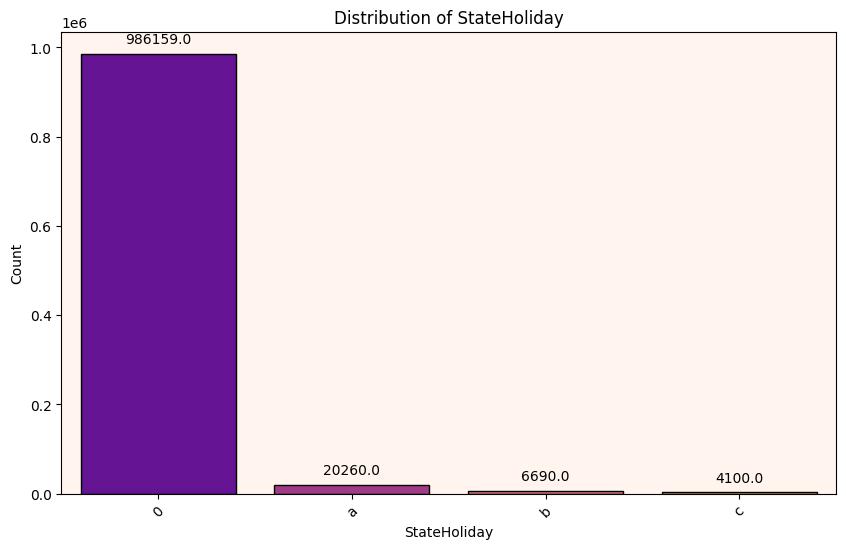

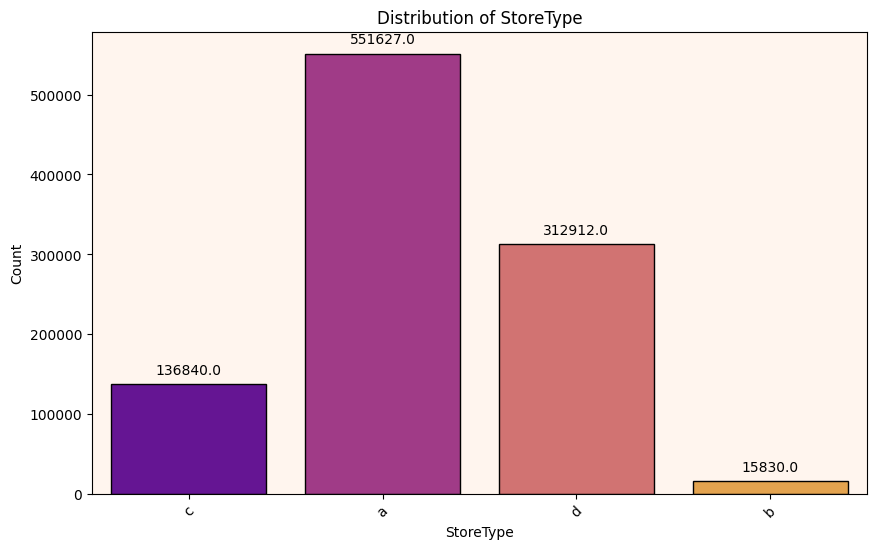

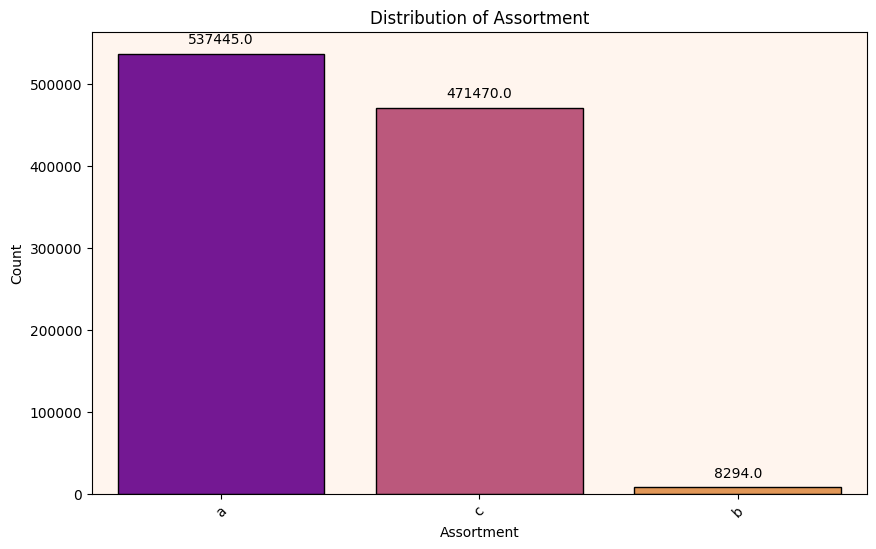

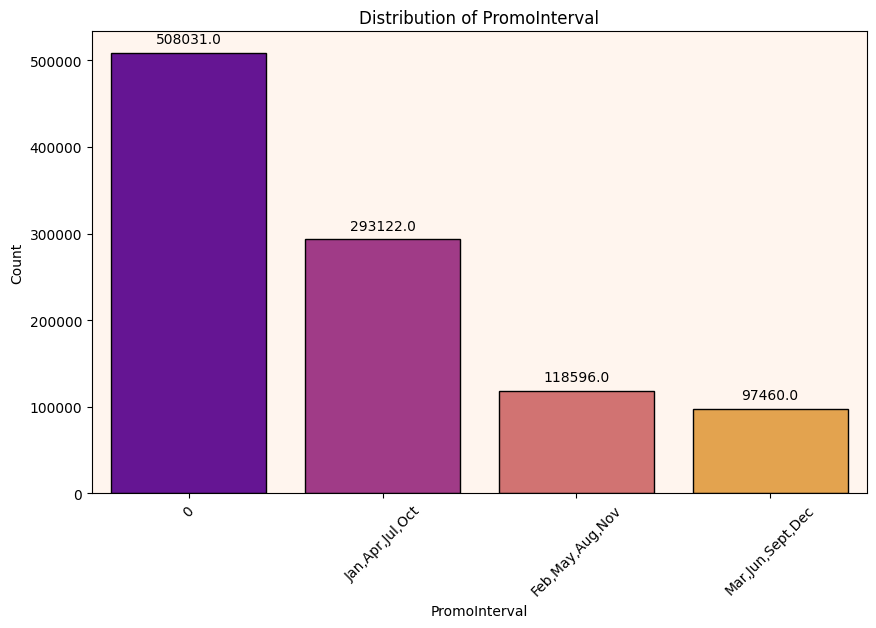

In [ ]:
# Chart - 2 visualization code
for col in df_merged.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 6))
    ax = plt.gca()  # Get the current axes
    ax.set_facecolor('seashell')  # Color: seashell
    sns.countplot(x=col, data=df_merged, palette='plasma', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    # Values on bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points') # Changed va='center,' to va='center'
    plt.show()

##### 1. Why did you pick the specific chart?

To visualize the frequency of each category in categorical variables.

##### 2. What is/are the insight(s) found from the chart?

   - Most sales occur on regular days ('StateHoliday' = 0).
   - 'StoreType a' is most common.
   - 'Assortment a' is the most frequent.
   - Countplot shows the distribution of 'PromoInterval'.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

   - **Positive:**
      - Tailor marketing/operations to dominant StoreType and Assortment.
      - Optimize promotion timing based on 'PromoInterval' distribution.
   - **Negative:**
      - Address underperformance in less frequent StoreTypes/Assortments.
      - Identify ineffective 'PromoIntervals' for adjustments.

#### Chart - 3

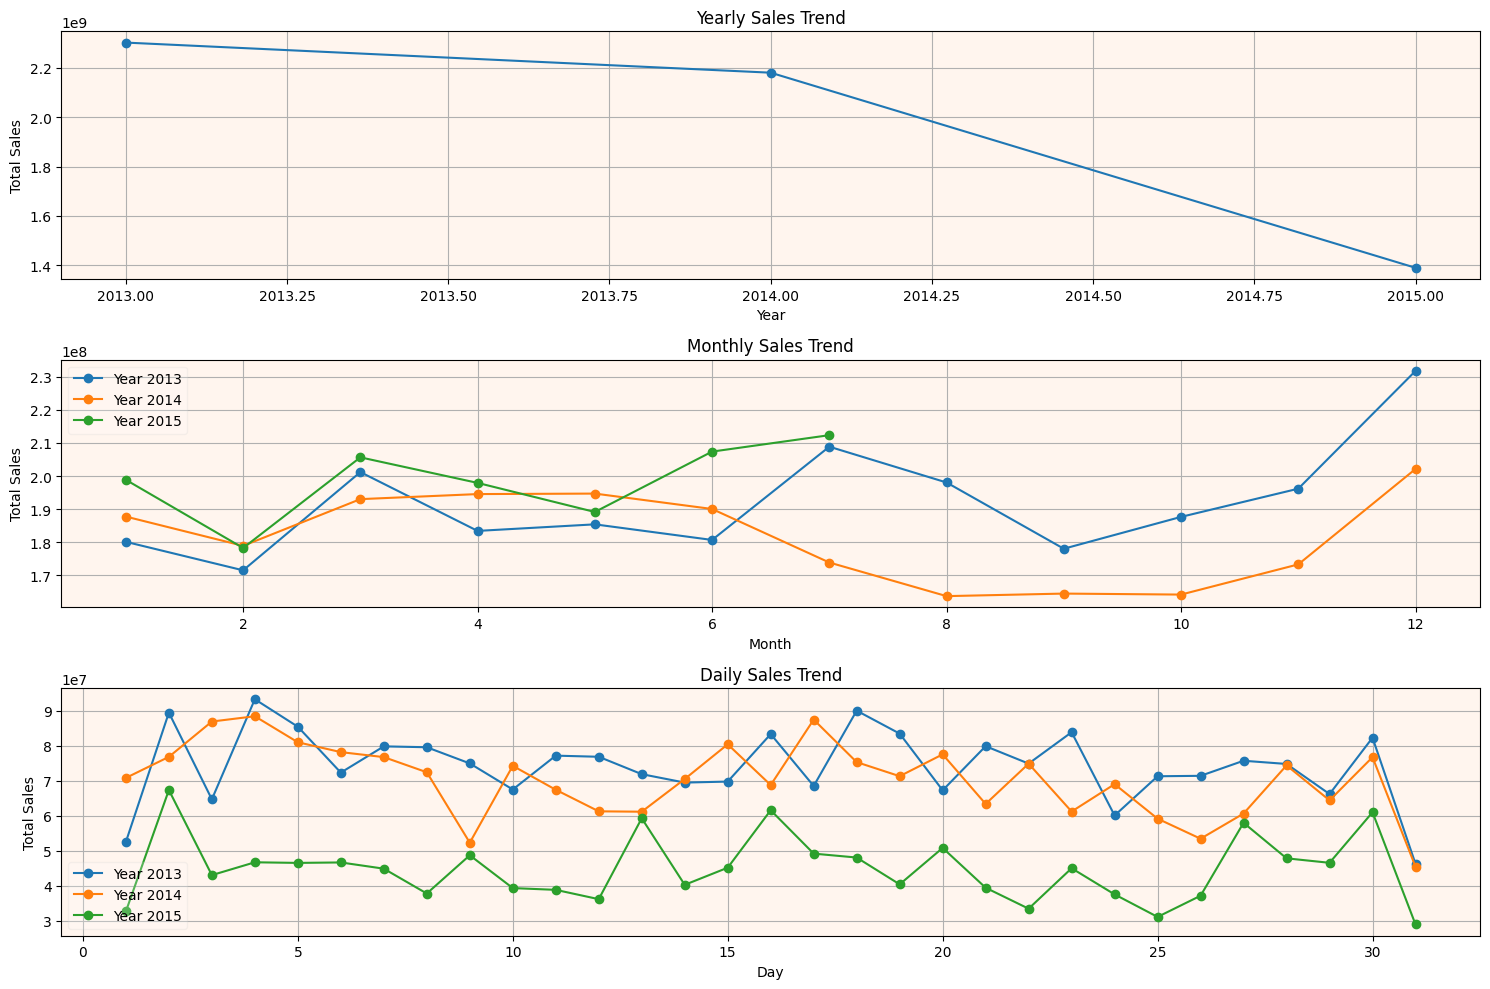

In [ ]:
# Chart - 3 visualization code
# Sales Trends
data = df_merged
# Plotting the trends
# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))
# Plot 1(Yearly Trends)
axes[0].plot(sales_by_year['Year'], sales_by_year['Sales'], marker='o')
axes[0].set_title('Yearly Sales Trend')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Total Sales')
axes[0].set_facecolor('seashell')  # Set background color for subplot 1
axes[0].grid(True)

# Plot 2(Monthly Trends)
for year in sales_by_year_month['Year'].unique():
    data = sales_by_year_month[sales_by_year_month['Year'] == year]
    axes[1].plot(data['Month'], data['Sales'], marker='o', label=f'Year {year}')
axes[1].set_title('Monthly Sales Trend')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Total Sales')
legend = axes[1].legend()  # Get the legend object
legend.get_frame().set_alpha(0.2)  # Set legend transparency
axes[1].set_facecolor('seashell')  # Set background color for subplot 2
axes[1].grid(True)

# Plot 3(Daywise Trends)
for year in sales_by_year_day['Year'].unique():
    data = sales_by_year_day[sales_by_year_day['Year'] == year]
    axes[2].plot(data['Day'], data['Sales'], marker='o', label=f'Year {year}')
axes[2].set_title('Daily Sales Trend')
axes[2].set_xlabel('Day')
axes[2].set_ylabel('Total Sales')
legend = axes[2].legend()  # Get the legend object
legend.get_frame().set_alpha(0.2)  # Set legend transparency
axes[2].set_facecolor('seashell')  # Set background color for subplot 3
axes[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

* **Line graph:** To visualize the trend of daily sales over time. Line graphs are ideal for showing how a quantity changes over a continuous interval, in this case, the days of the month.


##### 2. What is/are the insight(s) found from the chart?


* **Daily Fluctuations:** The chart reveals that daily sales exhibit significant fluctuations within each month. There are peaks and dips in sales throughout the month.
* **Year-over-Year Comparison:** The presence of multiple lines for different years allows for a comparison of daily sales trends across years. This can help identify consistent patterns or significant shifts in sales behavior.
* **Potential Anomalies:** Unusual spikes or dips in any of the lines might indicate potential anomalies or events that impacted sales on specific days.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* **Positive Business Impact:**
    * **Staffing and Inventory Management:** By identifying days with consistently high sales, businesses can optimize staffing levels and inventory to meet anticipated demand. This can help prevent stockouts and ensure adequate customer service.
    * **Promotional Strategies:** The analysis can inform the timing of promotions and special offers. Targeting promotional activities on days with historically lower sales can help boost business during slower periods.
    * **Identifying Anomalies:** Investigating unusual sales spikes or dips can help uncover underlying factors, such as successful/unsuccessful marketing campaigns, competitor actions, or unforeseen events.

* **Insights Leading to Negative Growth:**
    * **Consistent Sales Declines:** If a downward trend is observed across multiple years, it could indicate underlying issues such as increased competition, changing customer preferences, or ineffective marketing strategies. This requires further investigation and corrective action.
    * **Missed Opportunities:** If the chart shows that certain days consistently have lower sales, it might indicate missed opportunities for increased revenue. Analyzing these days can help identify reasons for lower sales and explore strategies to improve performance.

**Key Considerations:**

* **Contextual Analysis:** The insights from this chart should be considered in conjunction with other factors, such as weather patterns, holidays, and local events, to gain a more comprehensive understanding of sales trends.
* **Actionable Strategies:** The insights should be translated into concrete actions, such as adjusting staffing schedules, implementing targeted promotions, and improving inventory management.

#### Chart - 4

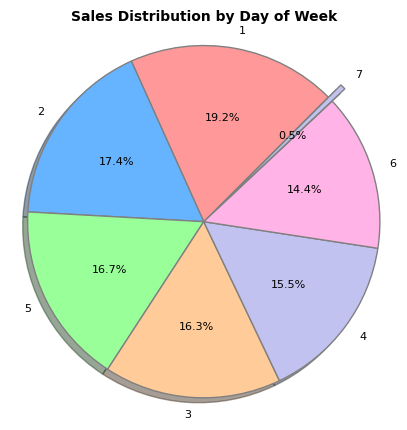

In [ ]:
# Chart - 4 visualization code
# Pie chart for sales according to weekday
plt.figure(figsize=(5, 5))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0', '#ffb3e6', '#c2c2f0']
explode = (0, 0, 0, 0, 0, 0, 0.1)
plt.pie(sales_by_week['Sales'], labels=sales_by_week['DayOfWeek'], autopct='%1.1f%%',
        startangle=45, colors=colors, explode=explode, shadow=True,
        textprops={'fontsize': 8, 'color': 'black'},
        wedgeprops={'edgecolor': 'grey'})  # Pass edgecolor within wedgeprops
        # Add title
plt.title('Sales Distribution by Day of Week', fontdict={'fontsize': 10, 'fontweight': 'bold'})
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

* **Pie Chart:** Pie charts are well-suited for visualizing the proportion of each category within a whole. In this case, the pie chart effectively represents the distribution of sales across different days of the week.


##### 2. What is/are the insight(s) found from the chart?


* **Sales Distribution:** The pie chart clearly shows that Monday (day 1) has the highest sales share, accounting for approximately 19.2% of total sales.
* **Low Sunday Sales:** Sunday (day 7) has the lowest sales share, with only 0.5% of total sales. This suggests that a majority of stores are closed on Sundays.
* **Weekday Dominance:** Weekdays (Monday to Friday) collectively account for a significant portion of total sales, indicating that most customer activity occurs during the workweek.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


* **Positive Business Impact:**
    * **Staffing Optimization:** The insights can inform staffing decisions. Stores can allocate more staff on Mondays and other high-sales weekdays to ensure efficient customer service and minimize wait times. On Sundays, with minimal sales, staffing levels can be adjusted accordingly.
    * **Promotional Strategies:** Targeted promotions can be planned for weekdays when sales are generally higher. This can help capitalize on existing customer traffic and increase sales during peak periods.
    * **Inventory Management:** The knowledge of weekday sales dominance can help optimize inventory levels to ensure sufficient stock of popular products during peak sales days.

* **Insights Leading to Negative Growth:**
    * **Low Sunday Sales:** If a significant portion of the business relies on Sunday sales, the low Sunday sales share might indicate a missed opportunity. Strategies could be explored to attract customers on Sundays, such as special offers, extended store hours, or unique events.
    * **Weekday Dependence:** Over-reliance on weekday sales might make the business vulnerable to disruptions during weekdays, such as holidays or unexpected events. Diversifying sales across different days of the week can help mitigate such risks.

**Key Considerations:**

* **Store-Specific Analysis:** The insights from this chart should be further analyzed at the store level to identify any store-specific patterns in sales distribution across days of the week.
* **External Factors:** The impact of external factors like local events, holidays, and weather patterns on sales distribution should also be considered.

By carefully analyzing the sales distribution by day of the week, businesses can make informed decisions to optimize staffing, inventory, and promotional strategies, ultimately leading to improved operational efficiency and increased profitability.


#### Chart - 5

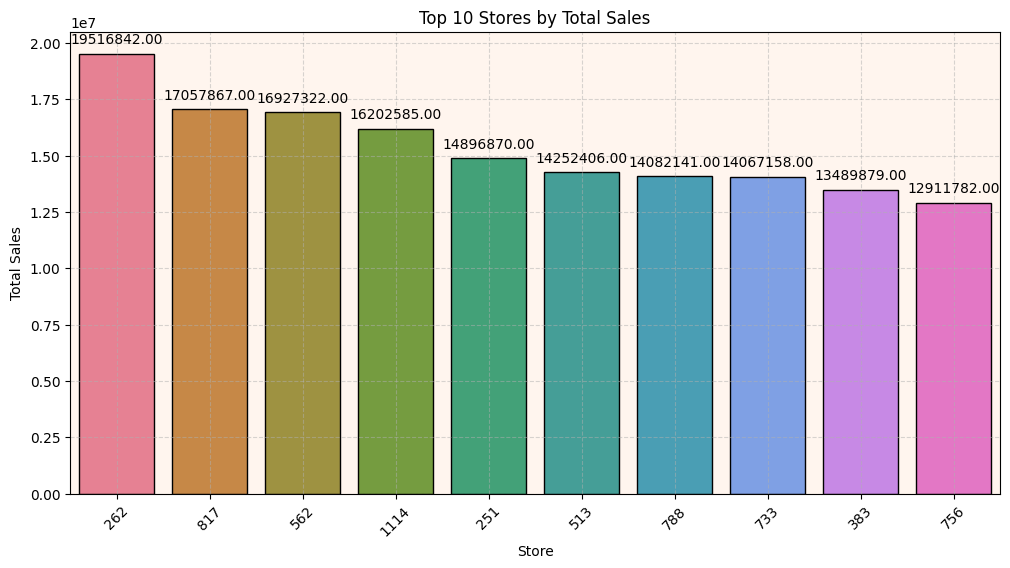

In [ ]:
# Chart - 5 visualization code
# Top 10 stores in terms of sales
plt.figure(figsize=(12, 6))
# Set the background color using set_facecolor
ax = plt.gca()  # Get the current axes
ax.set_facecolor('seashell')
# Plotting barplot
ax = sns.barplot(x='Store', y='Sales', data=sales_by_stores.head(10),
                 palette='husl',order=top_10_stores_by_sales['Store'], edgecolor='black')  # Assign the axes to ax
plt.title('Top 10 Stores by Total Sales')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
# Add gridlines
ax.grid(True, linestyle='--', alpha=0.5)  # Customize grid style and transparency
# Adding values on bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

This is a bar chart specifically designed to show the top performers (stores) based on a single metric (total sales).  It's effective because:

* **Ranking:** Bar charts excel at visually ranking items, making it easy to see at a glance which stores are the top performers.
* **Comparison:** The chart allows for quick comparison of total sales between the top 10 stores.
* **Simplicity:** It clearly presents one key piece of information without unnecessary clutter.

##### 2. What is/are the insight(s) found from the chart?

* **Dominant Performer:** Store 262 significantly outperforms all other stores in terms of total sales. There's a clear drop-off to the second-highest performer.
* **Close Competition:** Stores 817, 562, and 1114 have relatively similar total sales figures, indicating close competition among these top performers.
* **Gradual Decline:** There's a general downward trend in total sales as you move from the top-performing store to the 10th store, which is expected in a "top performers" chart.
* **Quantifiable Differences:** The chart allows for easy visual estimation of the sales differences between stores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, absolutely. These insights can be valuable for several positive business impacts:

* **Understanding Top Performers:** Identifying the characteristics and strategies of Store 262 (the top performer) can provide valuable lessons for other stores to improve their sales performance.
* **Targeted Support:** Stores in the middle of the top 10 list might benefit from targeted support and resources to help them improve their sales and move up the ranking.
* **Incentive Programs:** The data can inform the design of incentive programs to motivate stores to increase sales and strive for top performer status.
* **Benchmarking:** The sales figures of the top stores can serve as benchmarks for other stores within the organization.
* **Replicating Success:** Analyzing the top-performing store's practices can lead to the identification of best practices that can be replicated across the organization.

Insights that lead to negative growth:
* **Complacency:** The dominant performance of Store 262 could lead to complacency if the organization assumes that continued success is guaranteed. It's crucial to remain proactive and adapt to changing market conditions.
* **Ignoring Other Stores:** Focusing solely on the top performers might lead to neglecting the needs and potential of other stores, potentially hindering overall growth.
* **Lack of Understanding Underlying Factors:** Simply identifying the top performers is not enough. It's essential to delve deeper and understand the underlying factors contributing to their success. Without this understanding, replicating success might be challenging.

**Justification:**

While celebrating and learning from top performers is crucial, it's equally important to avoid complacency and ensure that all stores receive the necessary support to thrive.  A balanced approach that leverages the insights from top performers while addressing the needs of all stores will lead to more sustainable and inclusive growth.  Failing to understand the "why" behind the success of top performers can lead to ineffective strategies and hinder overall growth.

#### Chart - 6

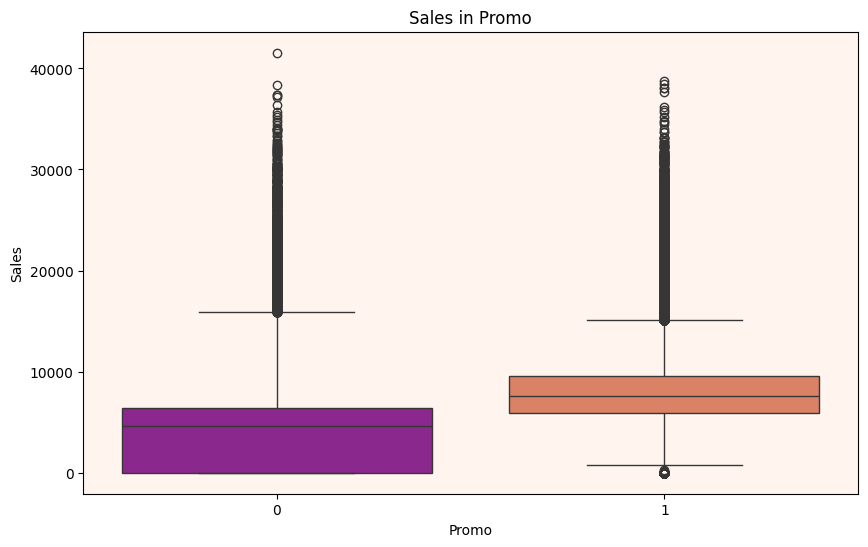

In [ ]:
# Chart - 6 visualization code
# Sales in Promo
plt.figure(figsize=(10, 6))
# Set the background color using set_facecolor
ax = plt.gca()  # Get the current axes
ax.set_facecolor('seashell')
# Plotting Boxplot
sns.boxplot(x='Promo', y='Sales', data=df_merged, palette='plasma')
plt.title('Sales in Promo')
plt.xlabel('Promo')
plt.ylabel('Sales')
plt.show()

##### 1. Why did you pick the specific chart?

* **Boxplot:** Boxplots are effective for visualizing the distribution of a continuous variable across different categories. In this case, the boxplot helps to compare the distribution of sales when a promotion is active (Promo = 1) versus when it is not (Promo = 0).


##### 2. What is/are the insight(s) found from the chart?


* **Sales Distribution:** The boxplot shows that the distribution of sales is different when a promotion is active compared to when it is not.
* **Higher Median Sales with Promotion:** The median sales value is higher when a promotion is active (Promo = 1). This suggests that promotions generally lead to increased sales.
* **Outliers:** There are some outliers in both distributions, indicating that there are a few stores with exceptionally high or low sales, both during promotions and non-promotional periods.
* **Variability:** The boxplot also shows that the variability in sales is higher when a promotion is active. This means that the range of sales values is wider during promotions.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


* **Positive Business Impact:**
    * **Promotion Effectiveness:** The higher median sales during promotions suggest that promotions are generally effective in driving sales. This information can be used to refine promotional strategies and maximize their impact.
    * **Identifying High-Performing Promotions:** The outliers in the "Promo = 1" distribution might represent particularly successful promotions. Analyzing these outlier cases can help identify the factors that contributed to their success and replicate them in future promotions.

* **Insights Leading to Negative Growth:**
    * **Increased Costs:** While promotions can boost sales, they also come with increased costs (e.g., discounts, advertising). If the increase in sales revenue does not outweigh the promotional costs, it can lead to reduced profitability.
    * **Cannibalization Effect:** Promotions might lead to a shift in sales from non-promotional periods to promotional periods, potentially cannibalizing sales from other periods. This needs to be carefully considered when planning promotional campaigns.

**Key Considerations:**

* **Further Analysis:** The insights from this boxplot can be further explored by analyzing the relationship between sales and other factors during promotions, such as the type of promotion, the duration of the promotion, and the target customer segment.
* **Actionable Strategies:** The insights should be translated into actionable strategies, such as optimizing promotion timing, adjusting discount levels, and targeting promotions to specific customer groups.

By carefully analyzing the impact of promotions on sales, businesses can optimize their promotional strategies, maximize revenue, and ensure that promotions contribute positively to overall profitability.


#### Chart - 7

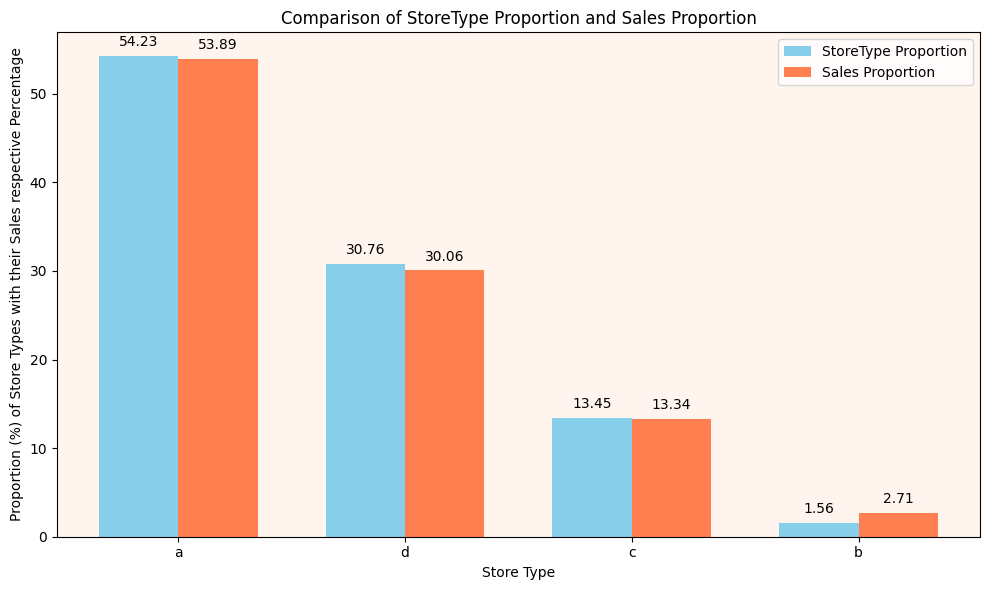

In [ ]:
# Chart - 7 visualization code
# Comparing the Proportion of Storetype with its respective Sales Proportion
# Calculate StoreType proportion
store_type_counts = df_merged['StoreType'].value_counts(normalize=True) * 100
store_type_proportions = store_type_counts.rename('StoreTypeProportion').reset_index()

# Calculate Sales proportion by StoreType
store_type_sales = df_merged.groupby('StoreType')['Sales'].sum().reset_index()
total_sales = store_type_sales['Sales'].sum()
store_type_sales['SalesProportion'] = (store_type_sales['Sales'] / total_sales) * 100

# Merge the two DataFrames
comparison_df = pd.merge(store_type_proportions, store_type_sales, on='StoreType')

# Prepare data for plotting
store_types = comparison_df['StoreType'].unique()
store_type_proportion = comparison_df['StoreTypeProportion'].values
sales_proportion = comparison_df['SalesProportion'].values

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('seashell')  # Color: seashell

# Define bar width and positions
bar_width = 0.35
index = np.arange(len(store_types))

# Plot the bars
plt.bar(index, store_type_proportion, bar_width, label='StoreType Proportion', color='skyblue')
plt.bar(index + bar_width, sales_proportion, bar_width, label='Sales Proportion', color='coral')

# Customize the plot
plt.xlabel('Store Type')
plt.ylabel('Proportion (%) of Store Types with their Sales respective Percentage')
plt.title('Comparison of StoreType Proportion and Sales Proportion')
plt.xticks(index + bar_width / 2, store_types)  # Center x-axis labels
plt.legend()
plt.tight_layout()
# Adding values in bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


##### 1. Why did you pick the specific chart?

* **Bar Chart (Grouped):** This chart was chosen to visually compare the proportion of each store type to its corresponding sales proportion, allowing for a direct assessment of how store prevalence relates to sales performance.


##### 2. What is/are the insight(s) found from the chart?


* **Close Alignment:** The sales proportions are generally close to the respective store type proportions. This suggests a potential correlation between the number of stores of a particular type and the sales they generate.
* **StoreType 'a' Dominance:** StoreType 'a' accounts for the largest proportion of both stores and sales.
* **StoreType 'b' Discrepancy:** StoreType 'b' shows a noticeable difference, with a higher sales proportion than its store proportion. This indicates that these stores, while fewer in number, generate a disproportionately higher amount of sales.
* **Potential, but not exact, proportionality:** While the sales are almost similar to their respective store proportions, they are not exactly the same. Therefore, we can say that there is a strong correlation, but we cannot say that sales are directly proportional to the number of stores, without further analysis.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* **Positive Business Impact:**
    * **Resource Allocation:** The close alignment suggests that focusing on expanding or optimizing stores of the dominant type ('a') could lead to increased sales.
    * **Strategic Investigation:** The 'b' store type discrepancy warrants investigation. Understanding why these stores outperform their proportion can reveal best practices to implement in other store types.
    * **Informed Expansion:** If further analysis proves a strong correlation, it could inform expansion strategies, prioritizing the opening of store types that demonstrate higher sales per store.
    * **Optimization of other store types:** The 'd' and 'c' store types have a close alignment, this means that they are performing as expected, but there is still room for improvement.

* **Insights Leading to Negative Growth:**
    * **Assuming Direct Proportionality:** If the business mistakenly assumes direct proportionality without further analysis, it could lead to over-simplistic strategies. For example, simply opening more stores of 'a' might not guarantee proportional sales if other factors (location, competition, etc.) are not considered.
    * **Neglecting 'b' Type Insights:** Ignoring the 'b' store type's performance could lead to missed opportunities. Understanding its success could reveal key factors for improving other store types.
    * **Overlooking other factors:** It is important to remember that this chart only shows the proportion of stores and sales. Other factors, such as location, competition, and marketing, can also have a significant impact on sales.

In essence, the chart highlights a potential relationship between store prevalence and sales, but it's essential to validate this with further analysis and avoid oversimplification. The 'b' store type's discrepancy is a crucial area for further investigation.


#### Chart - 8

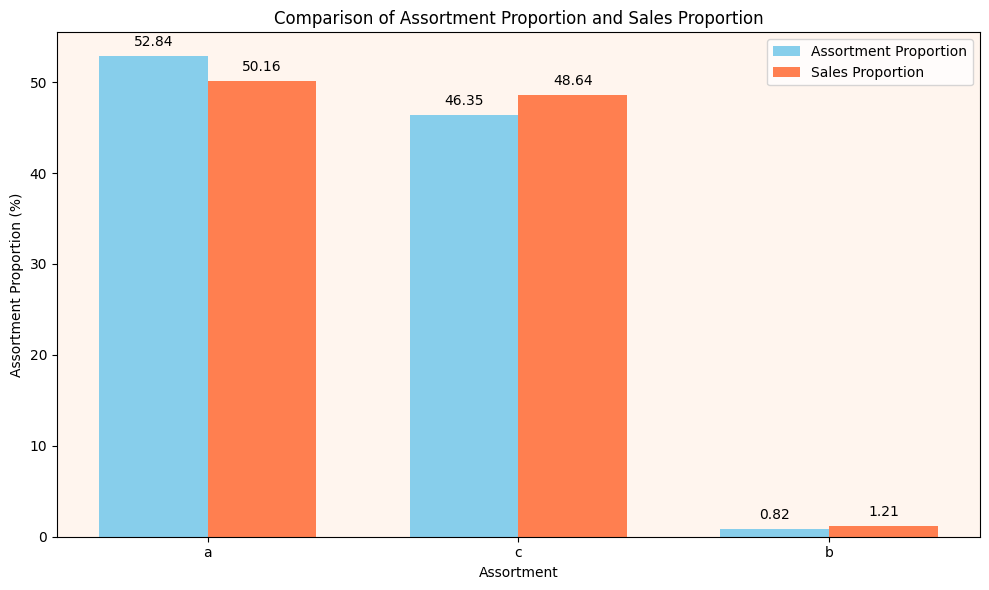

In [ ]:
# Chart - 8 visualization code
# Calculate Assortment proportion
assortment_counts = df_merged['Assortment'].value_counts(normalize=True) * 100
assortment_proportions = assortment_counts.rename('AssortmentProportion').reset_index()

# Calculate Sales proportion by Assortment
assortment_sales = df_merged.groupby('Assortment')['Sales'].sum().reset_index()
total_sales = assortment_sales['Sales'].sum()
assortment_sales['SalesProportion'] = (assortment_sales['Sales'] / total_sales) * 100

# Merge the two DataFrames
comparison_df = pd.merge(assortment_proportions, assortment_sales, on='Assortment')

# Prepare data for plotting
assortments = comparison_df['Assortment'].unique()
assortment_proportion = comparison_df['AssortmentProportion'].values
sales_proportion = comparison_df['SalesProportion'].values

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('seashell')  # Color: seashell

# Define bar width and positions
bar_width = 0.35
index = np.arange(len(assortments))

# Plot the bars
plt.bar(index, assortment_proportion, bar_width, label='Assortment Proportion', color='skyblue')
plt.bar(index + bar_width, sales_proportion, bar_width, label='Sales Proportion', color='coral')

# Customize the plot
plt.xlabel('Assortment')
plt.ylabel('Assortment Proportion (%)')
plt.title('Comparison of Assortment Proportion and Sales Proportion')
plt.xticks(index + bar_width / 2, assortments)  # Center x-axis labels
plt.legend()
plt.tight_layout()

# Adding Values in the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

**Bar Chart (Grouped):** This chart was chosen to visually compare the proportion of each assortment type to its corresponding sales proportion. It allows for a direct comparison of how the prevalence of each assortment level relates to its sales performance.

##### 2. What is/are the insight(s) found from the chart?

**Assortment 'a' Dominance:** Assortment 'a' has the highest proportion of both stores and sales, indicating that it's the most prevalent and generates the most revenue. However, its sales proportion is slightly lower than its store proportion (52.84% vs. 50.16%).

**Assortment 'c' Discrepancy:** Assortment 'c' shows a noticeable difference, with a higher sales proportion than its store proportion (46.35% vs. 48.64%). This suggests that Assortment 'c' generates more sales per store than Assortment 'a'.

**Assortment 'b' Underperformance:** Assortment 'b' has a very low proportion of stores and an even lower proportion of sales. This indicates a potential underperformance issue.

**Assortment 'c' outperforming its proportion:** Assortment 'c' is outperforming its proportional representation, meaning that it is generating more sales than expected.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* **Positive Business Impact:**
    * **Assortment Optimization:** The chart suggests that focusing on Assortment 'a' is crucial due to its high prevalence and contribution to sales.
    * **Strategic Investigation:** The underperformance of Assortment 'b' indicates a need for a strategic review. Investigating why these stores are underperforming can lead to improvements.
    * **Identifying Success Factors:** The outperformance of Assortment 'c' suggests that there are successful strategies or factors associated with this assortment that can be replicated or expanded.
    * **Informed Inventory Management:** The insights can inform inventory management decisions, ensuring that stores with Assortment 'c' are adequately stocked to meet demand.

* **Insights Leading to Negative Growth:**
    * **Neglecting Assortment 'b':** If the business ignores the underperformance of Assortment 'b', it could lead to continued revenue loss. A failure to address the issues causing low sales could result in further decline.
    * **Over-reliance on Assortment 'a':** While 'a' is dominant, over-reliance could make the business vulnerable if there's a shift in market trends or customer preferences. Diversification or contingency planning is needed.
    * **Misinterpreting 'c' type:** If the reason for the outperformance of Assortment 'c' is not correctly identified, then it could lead to incorrect decisions that could negatively impact sales.
    * **Assuming direct proportionality:** The sales are not directly proportional to the assortment proportion. If the business assumes that they are, then they could make incorrect decisions.

In summary, the chart provides valuable insights for optimizing assortment strategies and resource allocation. It also highlights potential areas of concern that need to be addressed to prevent negative growth.


#### Chart - 9

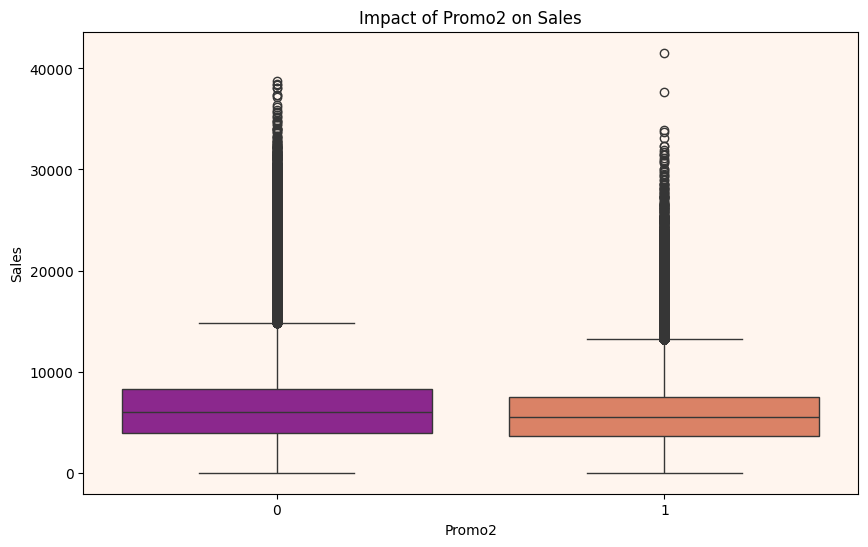

In [ ]:
# Chart - 9 visualization code
# Impact of Promo2 on sales
plt.figure(figsize=(10, 6))
# Set the background color using set_facecolor
ax = plt.gca()  # Get the current axes
ax.set_facecolor('seashell')
sns.boxplot(x='Promo2', y='Sales', data=df_merged, palette='plasma')
plt.title('Impact of Promo2 on Sales')
plt.xlabel('Promo2')
plt.ylabel('Sales')
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is an excellent choice for this analysis because it effectively displays the distribution of sales data for two distinct groups: "0" (no promo1) and "1" (promo1 applied). It allows for easy comparison of key statistical measures like median, quartiles, and outliers.

##### 2. What is/are the insight(s) found from the chart?

* **Higher Median Sales without Promo2:** The median sales value is noticeably higher for "Promo 1" compared to "Promo 0," suggesting that promotions, in general, have a positive impact on sales.
* **Greater Sales Variability with Promo:** The interquartile range (IQR), represented by the box's height, indicates that the sales are almost near withou promo1 and lower median value when promo1 applied indicates that the promo1 is not effective in terms of average sales.
* **Presence of Outliers:** Both groups have outliers, but "Promo1" seems to have more outliers on the higher end. These outliers represent exceptionally high sales figures, potentially indicating the significant impact some promotions can have.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights suggest that promotion1 is not effective strategy to increase sales. However, the greater variability in sales during promotional periods implies a need for careful planning and management.  
Consider these points:
* **Needs further analizing for the area of effctiveness of Promo1**
* **Non-Effectiveness may arises due to unprofessional implications**

#### Chart - 10

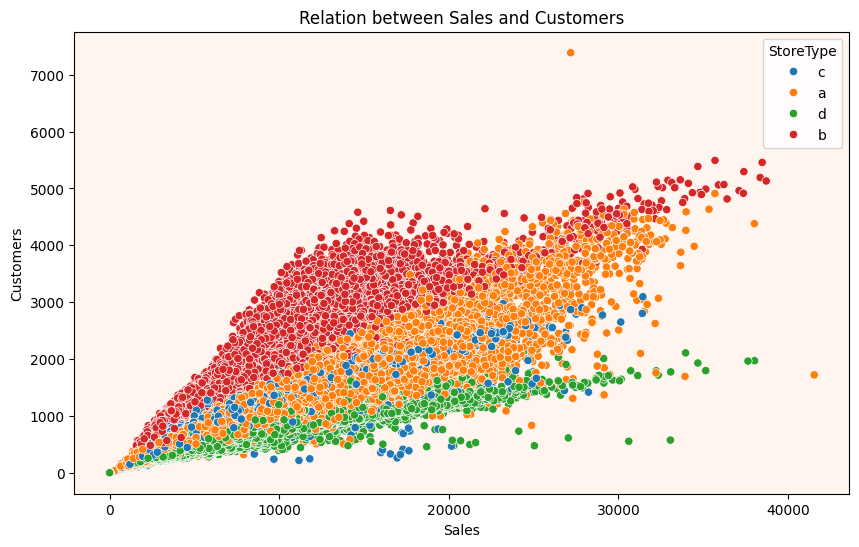

In [ ]:
# Chart - 10 visualization code
# Relation between Sales and Customers
plt.figure(figsize=(10, 6))
# Set the background color using set_facecolor
ax = plt.gca()  # Get the current axes
ax.set_facecolor('seashell')
sns.scatterplot(x='Sales', y='Customers', data=df_merged, hue='StoreType', palette='tab10')
plt.title('Relation between Sales and Customers')
plt.xlabel('Sales')
plt.ylabel('Customers')
plt.show()

##### 1. Why did you pick the specific chart?

* **Scatter Plot:** Scatter plots are ideal for visualizing the relationship between two continuous variables. In this case, the scatter plot helps to explore the relationship between sales and the number of customers, while also differentiating the data points based on StoreType.



##### 2. What is/are the insight(s) found from the chart?


* **Positive Correlation:** The overall trend suggests a strong positive correlation between sales and the number of customers. This means that as the number of customers increases, sales tend to increase as well.
* **StoreType Variations:** The use of different colors to represent different StoreTypes reveals that the relationship between sales and customers may vary slightly across store types. Some store types might have a steeper slope or a different overall trend compared to others.
* **Data Concentration:** The data points are concentrated towards the lower end of the sales range, suggesting that a majority of stores have relatively lower sales and customer numbers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


* **Positive Business Impact:**
    * **Customer Relationship Management:** Understanding the relationship between sales and customers can help businesses focus on strategies to attract and retain more customers. Efforts to improve customer experience, loyalty programs, and targeted marketing campaigns can be implemented to drive customer growth and, consequently, increase sales.
    * **Performance Analysis:** The scatter plot can help identify stores with unusually high or low sales compared to their customer numbers. This can trigger further investigation into the factors contributing to these variations and inform targeted interventions to improve performance.
    * **StoreType-Specific Strategies:** The analysis of the relationship between sales and customers across different StoreTypes can inform store-specific strategies. For example, stores with a higher customer-to-sales ratio might need to focus on improving average transaction value, while stores with a lower ratio might need to focus on attracting more customers.

* **Insights Leading to Negative Growth:**
    * **Declining Customer Base:** If the number of customers is decreasing while sales remain stagnant or decline, it could indicate a decline in customer loyalty or an erosion of the customer base. This requires immediate attention to address the underlying issues and prevent further customer loss.
    * **Inefficient Customer Conversion:** If the number of customers is high but sales remain low, it might indicate inefficiencies in customer conversion. This could be due to factors such as poor product quality, inadequate customer service, or ineffective sales strategies.

**Key Considerations:**

* **Further Analysis:** The insights from this scatter plot can be further explored by analyzing the relationship between sales, customers, and other relevant factors, such as promotions, competition, and store location.
* **Actionable Strategies:** The insights should be translated into actionable strategies, such as improving customer service, implementing loyalty programs, and optimizing product offerings.

By carefully analyzing the relationship between sales and customers, businesses can gain valuable insights into their customer base and develop strategies to attract, retain, and convert customers into loyal patrons.


#### Chart - 11

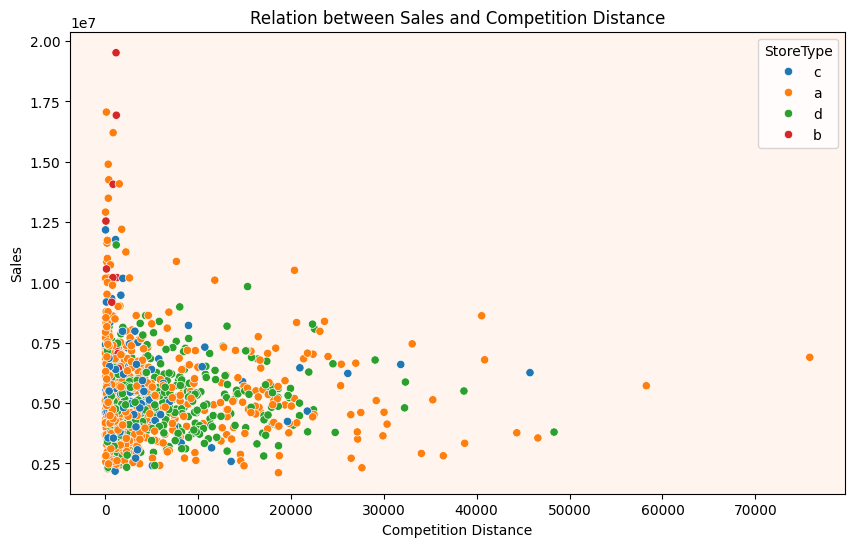

In [ ]:
# Chart - 11 visualization code
# Relation between Sales and CompetitionDistance
plt.figure(figsize=(10, 6))
# Set the background color using set_facecolor
ax = plt.gca()  # Get the current axes
ax.set_facecolor('seashell')
sns.scatterplot(x='CompetitionDistance', y='Total Sales', data=store_2, hue='StoreType', palette='tab10')
plt.title('Relation between Sales and Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Sales')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a scatterplot because it’s the most effective way to visualize the relationship between Competition Distance and Sales. It helps in spotting trends, clusters, and outliers, allowing us to observe whether proximity to competitors has any visible impact on sales performance.

##### 2. What is/are the insight(s) found from the chart?

The scatterplot reveals that:

* Stores closer to competitors generally have higher sales — there's a dense cluster of high sales at shorter distances.
* As competition distance increases, sales show more variation but tend to decrease overall.
* There's a noticeable lack of strong linear correlation — the relationship might be non-linear or influenced by other factors like store type, location, or promotions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impacts:**

 * **Location strategy:** Being near competitors might boost foot traffic, leading to higher sales — useful for deciding where to open new stores.
 * **Competitive pricing:** Stores close to rivals might use promotions to attract customers, increasing short-term revenue.
**Negative Impacts:**

 * **Sales volatility:** Relying on competitor-driven foot traffic may make sales unpredictable if a competitor moves or closes.
 * **Price wars:** Proximity to competitors might force stores into price wars, squeezing profit margins despite higher sales.

#### Chart - 12

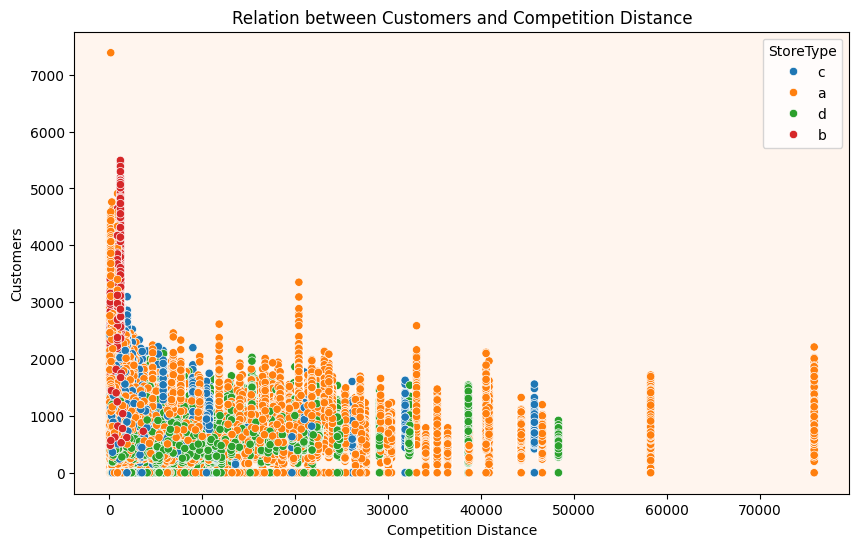

In [ ]:
# Chart - 12 visualization code
# Relation between Customers and CompetitionDistance
# Relation between Customers and CompetitionDistance
plt.figure(figsize=(10, 6))
# Set the background color using set_facecolor
ax = plt.gca()  # Get the current axes
ax.set_facecolor('seashell')
sns.scatterplot(x='CompetitionDistance', y='Customers', data=df_merged, hue='StoreType', palette='tab10')
plt.title('Relation between Customers and Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Customers')
plt.show()

##### 1. Why did you pick the specific chart?

* **Scatter Plot:** Scatter plots are ideal for visualizing the relationship between two continuous variables. In this case, the scatter plot helps to explore the relationship between the number of customers and competition distance, while also differentiating the data points based on StoreType.


##### 2. What is/are the insight(s) found from the chart?

* **Customers vs. Competition Distance:** The scatter plot doesn't reveal a clear, consistent relationship between the number of customers and competition distance. There is a wide spread of data points, indicating that competition distance alone doesn't strongly predict customer numbers.
* **StoreType Variations:** The use of different colors to represent different StoreTypes shows that the relationship between customers and competition distance might vary slightly across store types. Some store types might be more or less affected by competition distance compared to others.
* **Data Concentration:** The data points are concentrated towards the lower end of the competition distance range, suggesting that a majority of stores have competitors located relatively nearby.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


* **Positive Business Impact:**
    * **Location Strategy:** While the relationship is not straightforward, the analysis can provide insights into the impact of competition on customer footfall. For example, if a store type consistently has lower customer numbers in areas with high competition, it might suggest a need to adjust pricing, marketing strategies, or product offerings to remain competitive.
    * **Site Selection:** When considering new store locations, the analysis can help identify areas with lower competition, which might offer a greater potential for attracting customers.
    * **Competitive Analysis:** The scatter plot can help identify competitors that pose the greatest threat to a particular store or store type in terms of attracting customers. This information can be used to develop strategies to counter the competitive advantage of these rivals.

* **Insights Leading to Negative Growth:**
    * **Overlooking Other Factors:** Focusing solely on competition distance might overlook other crucial factors that influence customer numbers, such as location demographics, customer preferences, and marketing effectiveness.
    * **Misinterpretation of Correlation:** A lack of a strong correlation between customers and competition distance should not be misinterpreted as an indication that competition is not a factor. Other factors, such as store-specific strategies and market conditions, might be playing a more significant role in determining customer numbers.

**Key Considerations:**

* **Further Analysis:** The insights from this scatter plot can be further explored by analyzing the relationship between customers, competition distance, and other relevant factors, such as store age, assortment level, and promotional activities.
* **Actionable Strategies:** The insights should be translated into actionable strategies, such as adjusting pricing, implementing targeted marketing campaigns, and optimizing store operations to attract and retain customers.

By carefully analyzing the relationship between customers and competition distance, businesses can gain valuable insights into the competitive landscape and develop strategies to attract and retain customers in the face of competition.


#### Chart - 13

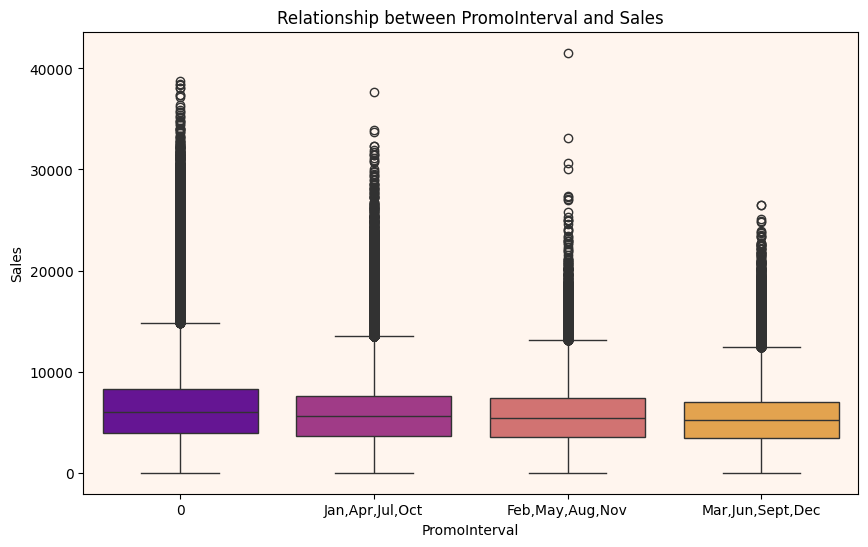

In [ ]:
# Chart - 13 visualization code
# Relatinship between PromoInterval and Sales
plt.figure(figsize=(10, 6))
# Set the background color using set_facecolor
ax = plt.gca()  # Get the current axes
ax.set_facecolor('seashell')
sns.boxplot(x='PromoInterval', y='Sales', data=df_merged, palette='plasma')
plt.title('Relationship between PromoInterval and Sales')
plt.xlabel('PromoInterval')
plt.ylabel('Sales')
plt.show()

##### 1. Why did you pick the specific chart?

* **Boxplot:** Boxplots are effective for visualizing the distribution of a continuous variable across different categories. In this case, the boxplot helps to compare the distribution of sales across different PromoIntervals.


##### 2. What is/are the insight(s) found from the chart?

* **Sales Distribution by PromoInterval:** The boxplot shows that the distribution of sales varies across different PromoIntervals.
* **PromoInterval Impact:** There appears to be some variation in the median sales values across different PromoIntervals, but the median sales wothout Promo2 seems slightly higher in terms of both value and total sales.
* **Outliers:** There are outliers in all the distributions, indicating that there are a few stores with exceptionally high or low sales within each PromoInterval.
* **Variability:** The boxplot also shows that the variability in sales is relatively high within each PromoInterval. This means that there is a wide range of sales values within each group.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


* **Positive Business Impact:**
    * **Optimizing PromoIntervals:** The analysis can help identify the most effective PromoIntervals in terms of driving sales. Businesses can focus their promotional efforts on these intervals to maximize their impact.
    * **Refining Promotional Strategies:** The insights can be used to refine promotional strategies for different PromoIntervals. For example, if a particular PromoInterval consistently shows higher sales, businesses can explore strategies to leverage this success and further enhance sales during those periods.

* **Insights Leading to Negative Growth:**
    * **Misinterpretation of Outliers:** Focusing solely on the outliers might lead to skewed conclusions. It's important to consider the overall distribution of sales within each PromoInterval and not just the extreme values.
    * **Ignoring Other Factors:** The analysis should be considered in conjunction with other factors, such as the type of products being promoted, the intensity of the promotion, and the competitive landscape.

**Key Considerations:**

* **Further Analysis:** The insights from this boxplot can be further explored by analyzing the relationship between sales and other factors within each PromoInterval, such as the type of products being promoted, the duration of the promotion, and the target customer segment.
* **Actionable Strategies:** The insights should be translated into actionable strategies, such as optimizing promotion timing, adjusting discount levels, and targeting promotions to specific customer groups.

By carefully analyzing the impact of different PromoIntervals on sales, businesses can optimize their promotional strategies, maximize revenue, and ensure that promotions contribute positively to overall profitability.


#### Chart - 14

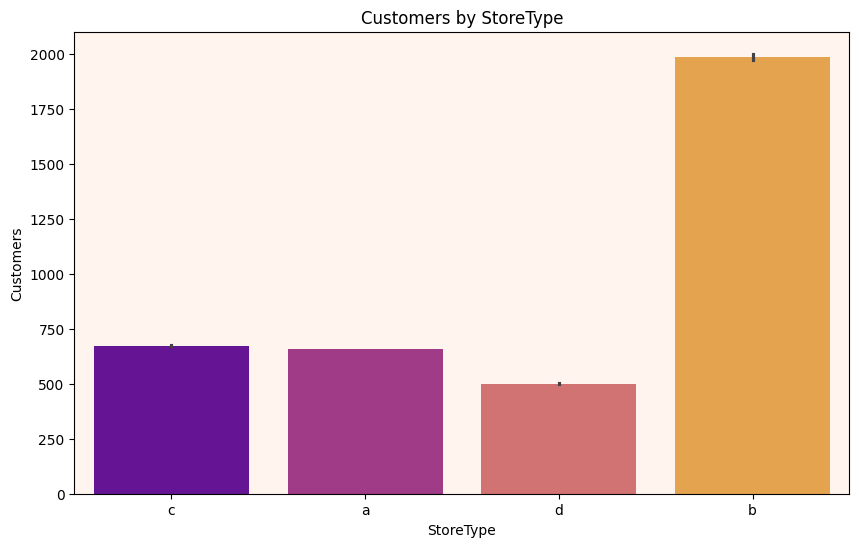

In [ ]:
# Chart - 14 visualization code
# Customers by Storetype
plt.figure(figsize=(10, 6))
# Set the background color using set_facecolor
ax = plt.gca()  # Get the current axes
ax.set_facecolor('seashell')
sns.barplot(x='StoreType', y='Customers', data=df_merged, palette='plasma')
plt.title('Customers by StoreType')
plt.xlabel('StoreType')
plt.ylabel('Customers')
plt.show()

##### 1. Why did you pick the specific chart?

* **Bar Chart:** Bar charts are ideal for comparing categorical data visually. In this case, the bar chart effectively represents the average number of customers across different StoreTypes, allowing for easy comparison of customer traffic.


##### 2. What is/are the insight(s) found from the chart?


* **Customer Traffic Variation:** The chart shows a significant variation in the average number of customers across different StoreTypes. StoreType 'b' has the highest average number of customers, while StoreType 'd' has the lowest.
* **StoreType Performance:** The chart suggests that StoreType 'b' attracts the most customers, indicating that it might be a high-performing store type in terms of customer traffic.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


* **Positive Business Impact:**
    * **Resource Allocation:** The insights can guide resource allocation decisions. Stores with higher customer traffic (like StoreType 'b') can be prioritized for additional resources, such as increased staffing, expanded inventory, and improved customer service.
    * **Marketing Strategies:** Targeted marketing campaigns can be developed based on the customer traffic patterns of different StoreTypes. For example, promotions and events can be tailored to attract more customers to StoreTypes with lower customer traffic.
    * **Store Optimization:** The analysis can help identify areas for improvement in stores with lower customer traffic. Factors such as store layout, product assortment, and customer experience can be evaluated and optimized to attract more customers.

* **Insights Leading to Negative Growth:**
    * **Overlooking Other Factors:** Focusing solely on customer numbers might overlook other factors, such as customer spending habits, customer satisfaction, and profitability. It's important to consider these factors in conjunction with customer traffic to get a complete picture of store performance.
    * **Misinterpretation of Causation:** While StoreType 'b' has the highest customer traffic, it doesn't necessarily imply that this StoreType is inherently more successful. Other factors, such as location, competition, and marketing efforts, could also be contributing to the higher customer traffic.

**Key Considerations:**

* **Further Analysis:** The insights from this chart can be further explored by analyzing the relationship between customer traffic, sales, and other relevant factors for each StoreType.
* **Actionable Strategies:** The insights should be translated into actionable strategies, such as improving store layout, enhancing customer service, and optimizing product offerings to attract and retain customers.

By carefully analyzing the customer traffic across different StoreTypes, businesses can gain valuable insights into customer behavior and develop strategies to optimize store operations and attract more customers.


#### Chart - 15

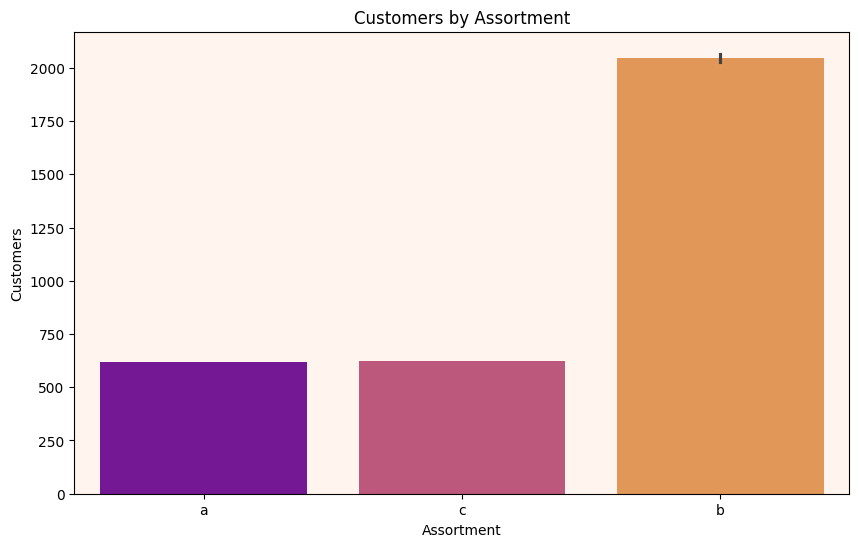

In [ ]:
# Chart - 15 visualization code
# Customers by Assortment
plt.figure(figsize=(10, 6))
# Set the background color using set_facecolor
ax = plt.gca()  # Get the current axes
ax.set_facecolor('seashell')
sns.barplot(x='Assortment', y='Customers', data=df_merged, palette='plasma')
plt.title('Customers by Assortment')
plt.xlabel('Assortment')
plt.ylabel('Customers')
plt.show()

##### 1. Why did you pick the specific chart?

* **Bar Chart:** Bar charts are ideal for comparing categorical data visually. In this case, the bar chart effectively represents the average number of customers across different Assortment levels, allowing for easy comparison of customer traffic.

##### 2. What is/are the insight(s) found from the chart?

* **Customer Traffic Variation:** The chart shows a significant variation in the average number of customers across different Assortment levels. Assortment 'b' has the highest average number of customers, while Assortment 'a' and 'c' have relatively lower customer traffic.
* **Assortment Performance:** The chart suggests that Assortment 'b' attracts the most customers, indicating that it might be a high-performing assortment in terms of customer traffic.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


* **Positive Business Impact:**
    * **Assortment Optimization:** The insights can guide assortment planning decisions. Stores can prioritize stocking and promoting products from Assortment 'b' to attract more customers and increase sales.
    * **Marketing Strategies:** Targeted marketing campaigns can be developed based on the customer traffic patterns of different Assortment levels. For example, promotions and events can be tailored to highlight products from Assortment 'b' to attract more customers.
    * **Inventory Management:** The analysis can help optimize inventory levels for different Assortment levels. Stores can allocate more shelf space and inventory to products from Assortment 'b' to meet the higher demand.

* **Insights Leading to Negative Growth:**
    * **Overlooking Other Factors:** Focusing solely on customer numbers might overlook other factors, such as customer spending habits, customer satisfaction, and profitability. It's important to consider these factors in conjunction with customer traffic to get a complete picture of assortment performance.
    * **Misinterpretation of Causation:** While Assortment 'b' has the highest customer traffic, it doesn't necessarily imply that this Assortment is inherently more successful. Other factors, such as product pricing, promotions, and store layout, could also be contributing to the higher customer traffic.

**Key Considerations:**

* **Further Analysis:** The insights from this chart can be further explored by analyzing the relationship between customer traffic, sales, and other relevant factors for each Assortment level.
* **Actionable Strategies:** The insights should be translated into actionable strategies, such as optimizing product assortment, enhancing customer service, and implementing targeted marketing campaigns.

By carefully analyzing the customer traffic across different Assortment levels, businesses can gain valuable insights into customer preferences and develop strategies to optimize product offerings, attract more customers, and increase sales.


#### Chart - 16

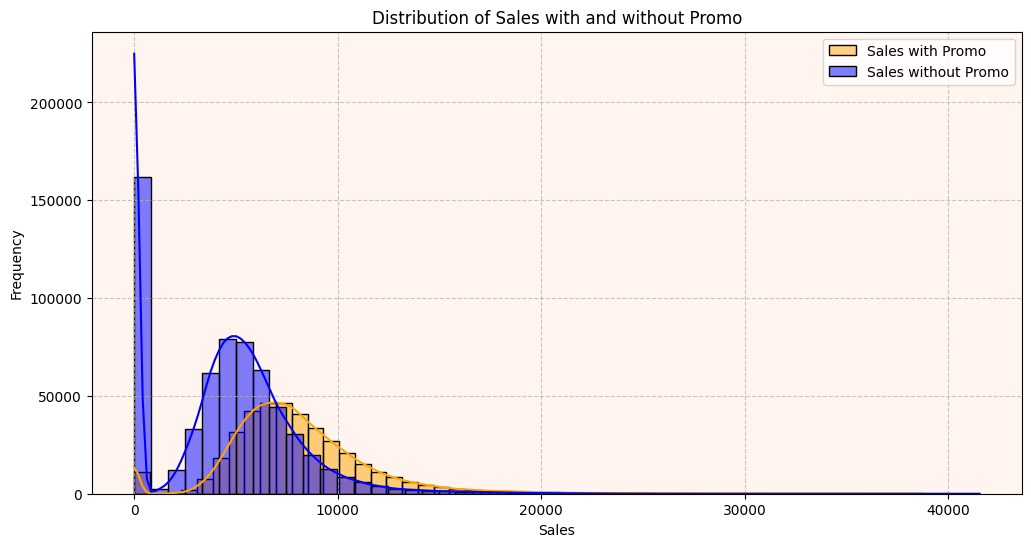

In [ ]:
# Chart - 16 visualization code
# Visualizing Sales histogram for With and Without Promo Differently
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Set the background color using set_facecolor
ax = plt.gca()  # Get the current axes
ax.set_facecolor('seashell')  # Color: seashell

# Histogram for Sales with Promo
sns.histplot(df_merged[df_merged['Promo'] == 1]['Sales'],
             color='Orange', kde=True, label='Sales with Promo', bins=50)

# Histogram for Sales without Promo
sns.histplot(df_merged[df_merged['Promo'] == 0]['Sales'],
             color='blue', kde=True, label='Sales without Promo', bins=50)

plt.title('Distribution of Sales with and without Promo')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend()

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.7)  # Grid style and transparency

plt.show()


##### 1. Why did you pick the specific chart?

I picked this chart because it clearly compares the distribution of sales with and without promotions. The side-by-side visualization using histograms and KDE curves helps highlight how promotional activities impact sales volume, making it easier to identify patterns and outliers.  
  



##### 2. What is/are the insight(s) found from the chart?

   The chart shows that sales with promotions generally have a wider distribution, with more frequent occurrences of higher sales values compared to sales without promotions. Sales without promotions are more tightly clustered around lower values, while promotions push sales into higher brackets. This suggests that promotions effectively drive sales volume, though the distribution also shows a longer tail, indicating a few very high sales instances during promotions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

   Yes, the insights gained can positively impact the business. Promotions clearly boost sales, so strategically planning promo periods can help achieve revenue targets. The distribution data can also guide decisions on optimal discount rates or product bundling strategies.  
  
   One potential negative insight is the sharp spike in very low sales without promotions. This could indicate an over-reliance on promotions to drive revenue, meaning regular prices fail to attract customers. If left unchecked, this could erode profit margins, as consistent heavy discounting might train customers to only buy during sales periods.

#### Chart - 17

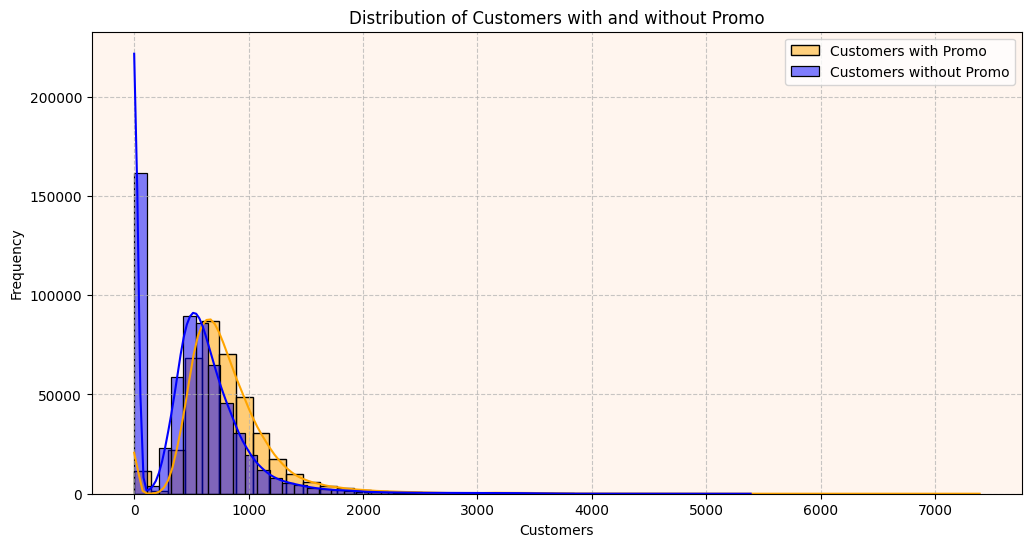

In [ ]:
# Chart - 17 visualization code
# Visualizing Customers histogram for With and Without Promo Differently
plt.figure(figsize=(12, 6))

# Set the background color using set_facecolor
ax = plt.gca()  # Get the current axes
ax.set_facecolor('seashell')  # Color: seashell

# Histogram for Customers with Promo
sns.histplot(df_merged[df_merged['Promo'] == 1]['Customers'],
             color='Orange', kde=True, label='Customers with Promo', bins=50)

# Histogram for Customers without Promo
sns.histplot(df_merged[df_merged['Promo'] == 0]['Customers'],
             color='blue', kde=True, label='Customers without Promo', bins=50)

plt.title('Distribution of Customers with and without Promo')
plt.xlabel('Customers')
plt.ylabel('Frequency')
plt.legend()

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.7)  # Grid style and transparency
plt.show()

##### 1. Why did you pick the specific chart?

This chart was chosen to analyze the distribution of customers with and without promotions. It complements the sales distribution chart by helping us understand whether the increase in sales during promotions is due to more customers making purchases or simply higher spending by existing customers. Comparing both charts provides a fuller picture of how promotions impact customer behavior and sales performance.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that promotions generally attract more customers, as the distribution for "Customers with Promo" is wider, indicating a higher range of customer counts. Without promotions, the customer distribution is more concentrated in the lower range, suggesting fewer walk-ins or conversions. Interestingly, while promotions bring in more customers, the overlap in the mid-range suggests that some level of customer retention exists even without discounts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, combining insights from both charts reveals that promotions boost not only sales but also customer traffic. This means promotions can serve a dual purpose: increasing revenue and expanding the customer base. Businesses can leverage this by running targeted promotions to drive footfall, then using loyalty programs or personalized offers to convert these promo-driven customers into repeat buyers.

A potential downside is that while promotions attract more customers, the dependency on discounts might be training customers to wait for sales events. This is backed by the clear clustering of lower customer counts without promotions, suggesting that the brand struggles to maintain strong traffic at regular prices. Over time, this could erode brand value and reduce profit margins if not balanced by strategies that build customer loyalty beyond discounts.

#### Chart - 18

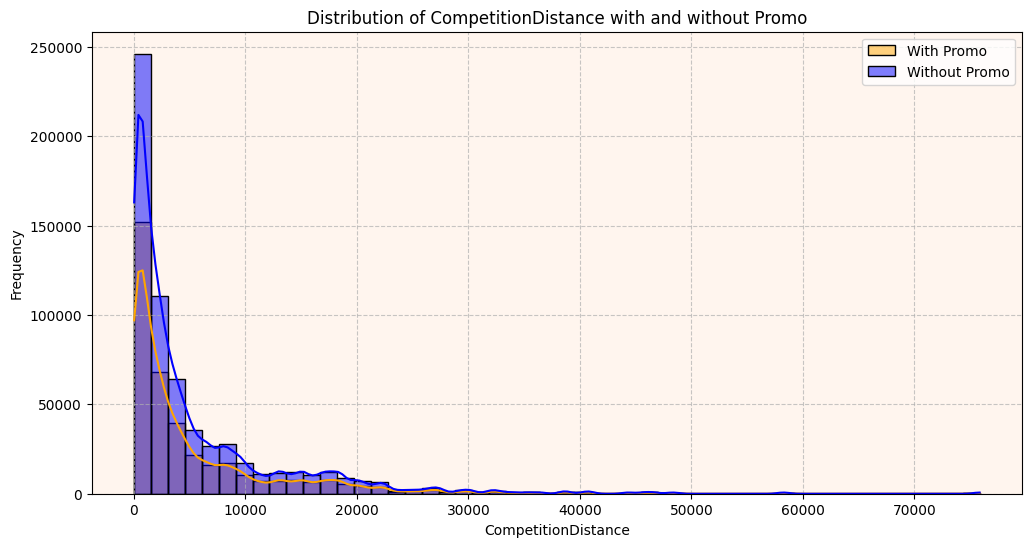

In [ ]:
# Chart - 18 visualization code
# Visualizing CompetitionDistance histogram for With and Without Promo Differently
plt.figure(figsize=(12, 6))

# Set the background color using set_facecolor
ax = plt.gca()  # Get the current axes
ax.set_facecolor('seashell')  # Color: seashell

# Histogram for Customers with Promo
sns.histplot(df_merged[df_merged['Promo'] == 1]['CompetitionDistance'],
             color='orange', kde=True, label='With Promo', bins=50)

# Histogram for Customers without Promo
sns.histplot(df_merged[df_merged['Promo'] == 0]['CompetitionDistance'],
             color='blue', kde=True, label='Without Promo', bins=50)

plt.title('Distribution of CompetitionDistance with and without Promo')
plt.xlabel('CompetitionDistance')
plt.ylabel('Frequency')
plt.legend()

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.7)  # Grid style and transparency

plt.show()

##### 1. Why did you pick the specific chart?

This chart was chosen to analyze how competition distance affects customer behavior, with and without promotions. It adds another layer to our understanding by linking customer count and sales performance to the proximity of competitors. Combining this with the previous charts on sales and customer distribution helps identify whether promotions offset the impact of nearby competition or if distance plays a bigger role in store performance.

##### 2. What is/are the insight(s) found from the chart?

* The chart shows that customer count, both with and without promotions, is higher when competitors are closer — peaking at short distances and gradually decreasing as the distance increases.
* Promotions seem to slightly mitigate the impact of competition, as the customer count for "with promo" remains consistently higher across all distances compared to "without promo."
* Notably, for stores further from competitors, promotions still help draw customers, but the gap between promo and non-promo customer counts narrows, suggesting that promotions have a diminishing effect as competition becomes less intense.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights offer actionable strategies:

* **Proximity-based promotions:** For stores close to competitors, aggressive and targeted promotions can effectively draw customers and prevent them from switching to rival stores.
* **Sustained engagement for remote stores:** For stores farther from competitors, promotions should focus more on customer loyalty and experience rather than steep discounts, since distance already works in their favor.
* **Cross-analysis opportunities:** Aligning sales data with customer distribution and competition distance helps optimize promo strategies — pushing flash sales in high-competition areas and subtle loyalty incentives in less competitive zones.

Yes, there's a risk of negative growth if promotions are overused in areas with minimal competition. The diminishing effect of promotions for stores farther from competitors suggests that relying too heavily on discounts in those regions could hurt profit margins without significantly boosting foot traffic.

Additionally, for stores near competitors, an overemphasis on price cuts might spark a "race to the bottom," reducing overall profitability for both the business and its rivals.

#### Chart - 19

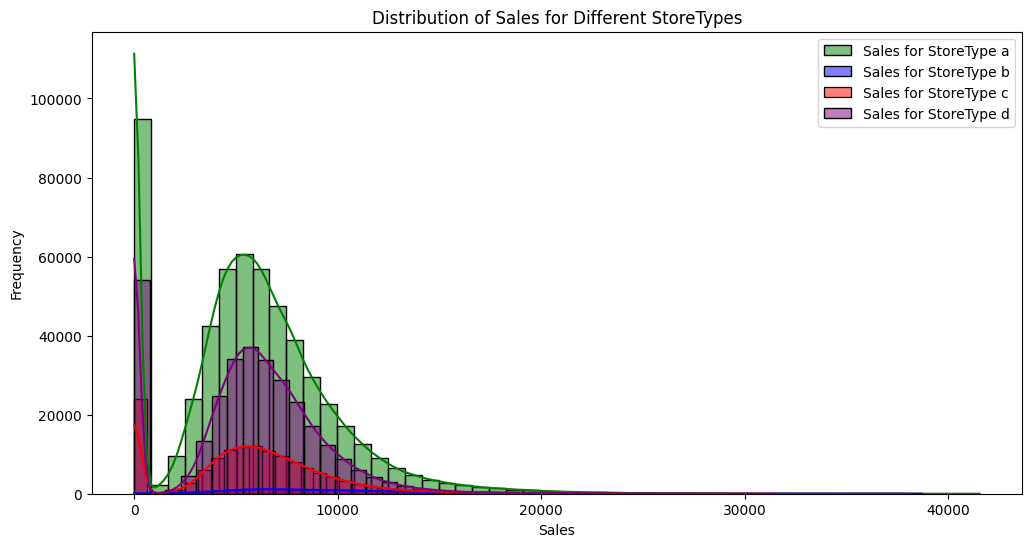

In [ ]:
# Chart - 19 visualization code
# Visualization Sales distribution for different StoreTypes
plt.figure(figsize=(12, 6))
sns.histplot(df_merged[df_merged['StoreType'] == 'a']['Sales'],
             color='green', kde=True, label='Sales for StoreType a', bins=50)
sns.histplot(df_merged[df_merged['StoreType'] == 'b']['Sales'],
             color='blue', kde=True, label='Sales for StoreType b', bins=50)
sns.histplot(df_merged[df_merged['StoreType'] == 'c']['Sales'],
             color='red', kde=True, label='Sales for StoreType c', bins=50)
sns.histplot(df_merged[df_merged['StoreType'] == 'd']['Sales'],
             color='purple', kde=True, label='Sales for StoreType d', bins=50)
plt.title('Distribution of Sales for Different StoreTypes')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

The sales distribution chart was chosen because it directly highlights how different store types contribute to overall sales. Understanding this is crucial for identifying which store types are the most profitable and which may need strategic adjustments. It also helps align sales performance with the store's characteristics — like promotions, competition distance, and assortment types — revealed in the previous charts.

##### 2. What is/are the insight(s) found from the chart?

* StoreType A dominates in sales, suggesting it either has a larger footprint, better assortments, or more effective strategies.
* StoreType C has the lowest sales, indicating potential issues like smaller assortments, weaker customer traction, or poor location strategies.
* Since the proportion of store types and assortments mirrors their sales proportions, we can infer that sales performance largely scales with store presence and assortment variety.

However, the disparity between StoreType A and C suggests additional factors like promotional effectiveness or competition distance play roles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes! These insights can drive targeted strategies.
 * Strengthen StoreType A by investing more in promotions and expanding its assortment to further boost sales.
 * Reevaluate StoreType C by reassessing product mixes, running focused promotions, or exploring new locations with less competition.
* Negative growth risks arise if these insights are ignored. For example, continuing to underinvest in StoreType C without diagnosing its low sales might deepen the gap. Also, over-relying on StoreType A could be risky if market saturation kicks in. Balancing investments across store types is key.

#### Chart - 20

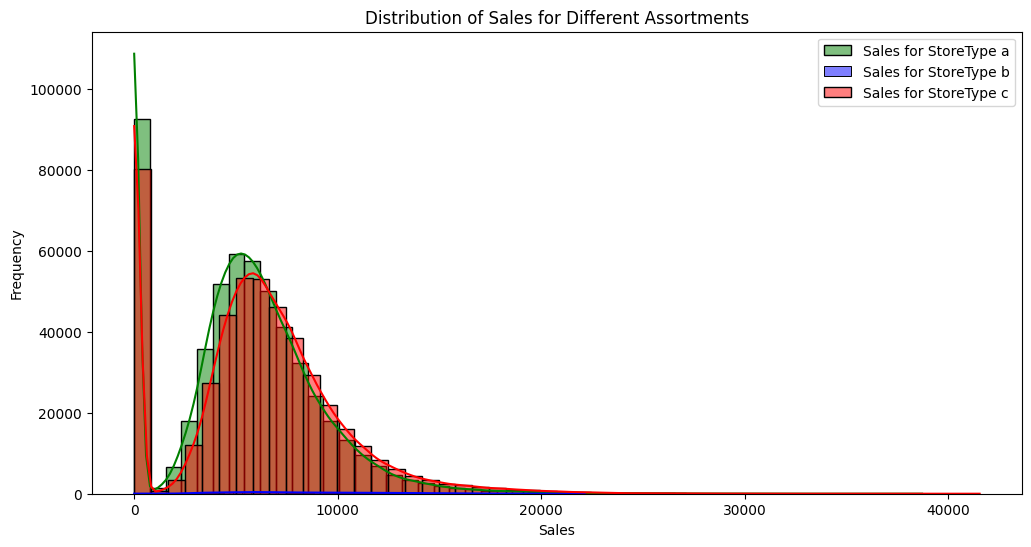

In [ ]:
# Chart - 20 visualization code
# Visualization Sales distribution for different Assortments
plt.figure(figsize=(12, 6))
sns.histplot(df_merged[df_merged['Assortment'] == 'a']['Sales'],
             color='green', kde=True, label='Sales for StoreType a', bins=50)
sns.histplot(df_merged[df_merged['Assortment'] == 'b']['Sales'],
             color='blue', kde=True, label='Sales for StoreType b', bins=50)
sns.histplot(df_merged[df_merged['Assortment'] == 'c']['Sales'],
             color='red', kde=True, label='Sales for StoreType c', bins=50)
plt.title('Distribution of Sales for Different Assortments')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

This chart was selected to explore how different assortments affect sales across store types. Since assortments directly influence product variety and customer choices, analyzing their sales distribution reveals which assortment strategies drive the most revenue. It also complements previous insights by linking store type performance with their product offerings.

##### 2. What is/are the insight(s) found from the chart?

* Assortment A has the highest and most consistent sales, suggesting it aligns well with customer demand — likely due to broader product ranges or popular items.
* Assortment C shows lower sales, possibly reflecting limited product variety or an inability to attract high customer traffic.
* The sales distribution for Assortment B is relatively small compared to A and C, indicating it might be underutilized or misaligned with customer needs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Yes! The insights can drive assortment optimization strategies:
 * Strengthen Assortment A by maintaining its broad product range and expanding to more stores.
 * Revamp Assortment C through better product selection or bundling strategies to boost customer interest.
 * Reevaluate Assortment B — either improve its product offerings or phase it out if it's not resonating with customers.
* Negative growth risks arise if Assortment B's poor performance is overlooked. Without intervention, it could drag overall sales down or waste shelf space that could be reallocated to better-performing assortments.

#### Chart - 21 - Correlation Heatmap

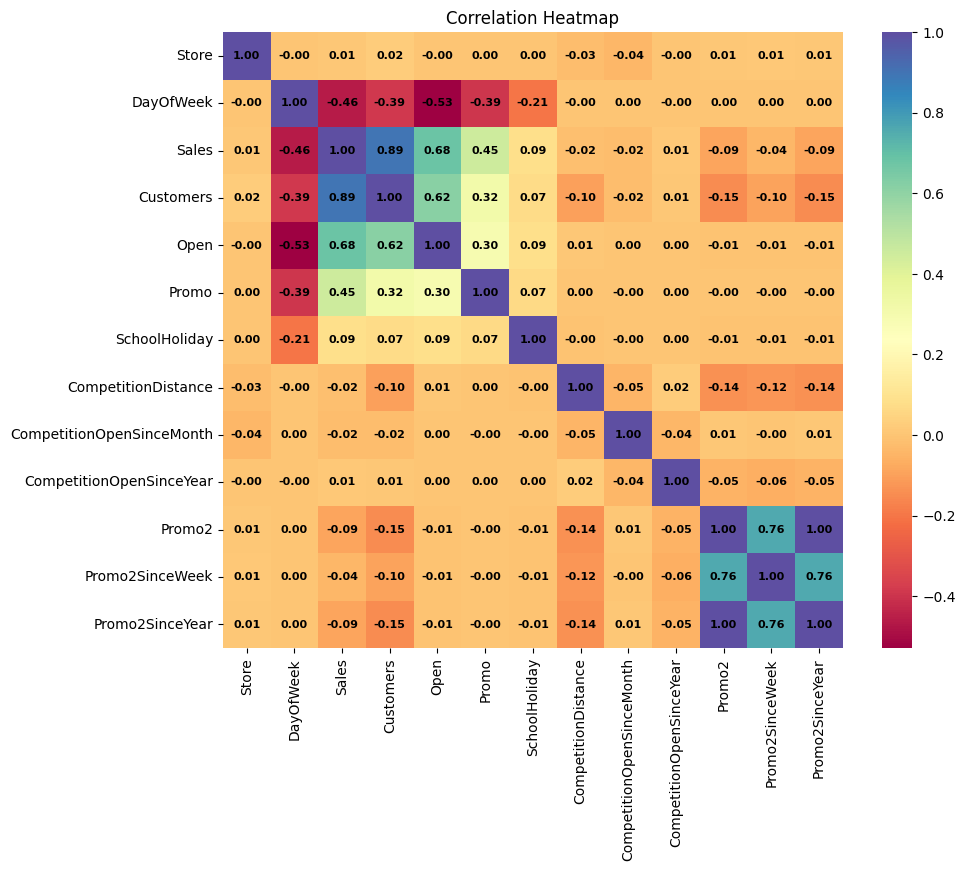

In [ ]:
# Correlation Heatmap visualization code
df_corr = df_merged.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, fmt=".2f",
            annot_kws={"size": 8, "color": "black", "weight": "bold"},
            cmap='Spectral')
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

* **Correlation Heatmap:**
    - This chart is the most suitable for visualizing the correlation between multiple variables in a dataset.
    - It provides a clear and concise overview of the strength and direction of the relationships between each pair of variables.
    - The color-coded matrix makes it easy to identify strong positive correlations (red), strong negative correlations (blue), and weak or no correlations (white).


##### 2. What is/are the insight(s) found from the chart?


* **Strong Positive Correlation between Sales and Customers:** This is a logical and expected finding, as higher sales typically result from a greater number of customers.
* **Impact of Promotions:** The strong positive correlations between `Promo2`, `Promo2SinceWeek`, and `Promo2SinceYear` suggest that the extended promotion campaign has a significant influence on sales.
* **DayOfWeek Influence:** The negative correlations between `DayOfWeek` and both `Sales` and `Customers` indicate that sales and customer traffic tend to be lower on certain days of the week.
* **Limited Correlation with Store-Related Factors:** Variables like `CompetitionDistance`, and `CompetitionOpenSinceMonth/Year` show weak or no correlation with sales.


#### Chart - 22 - Pair Plot

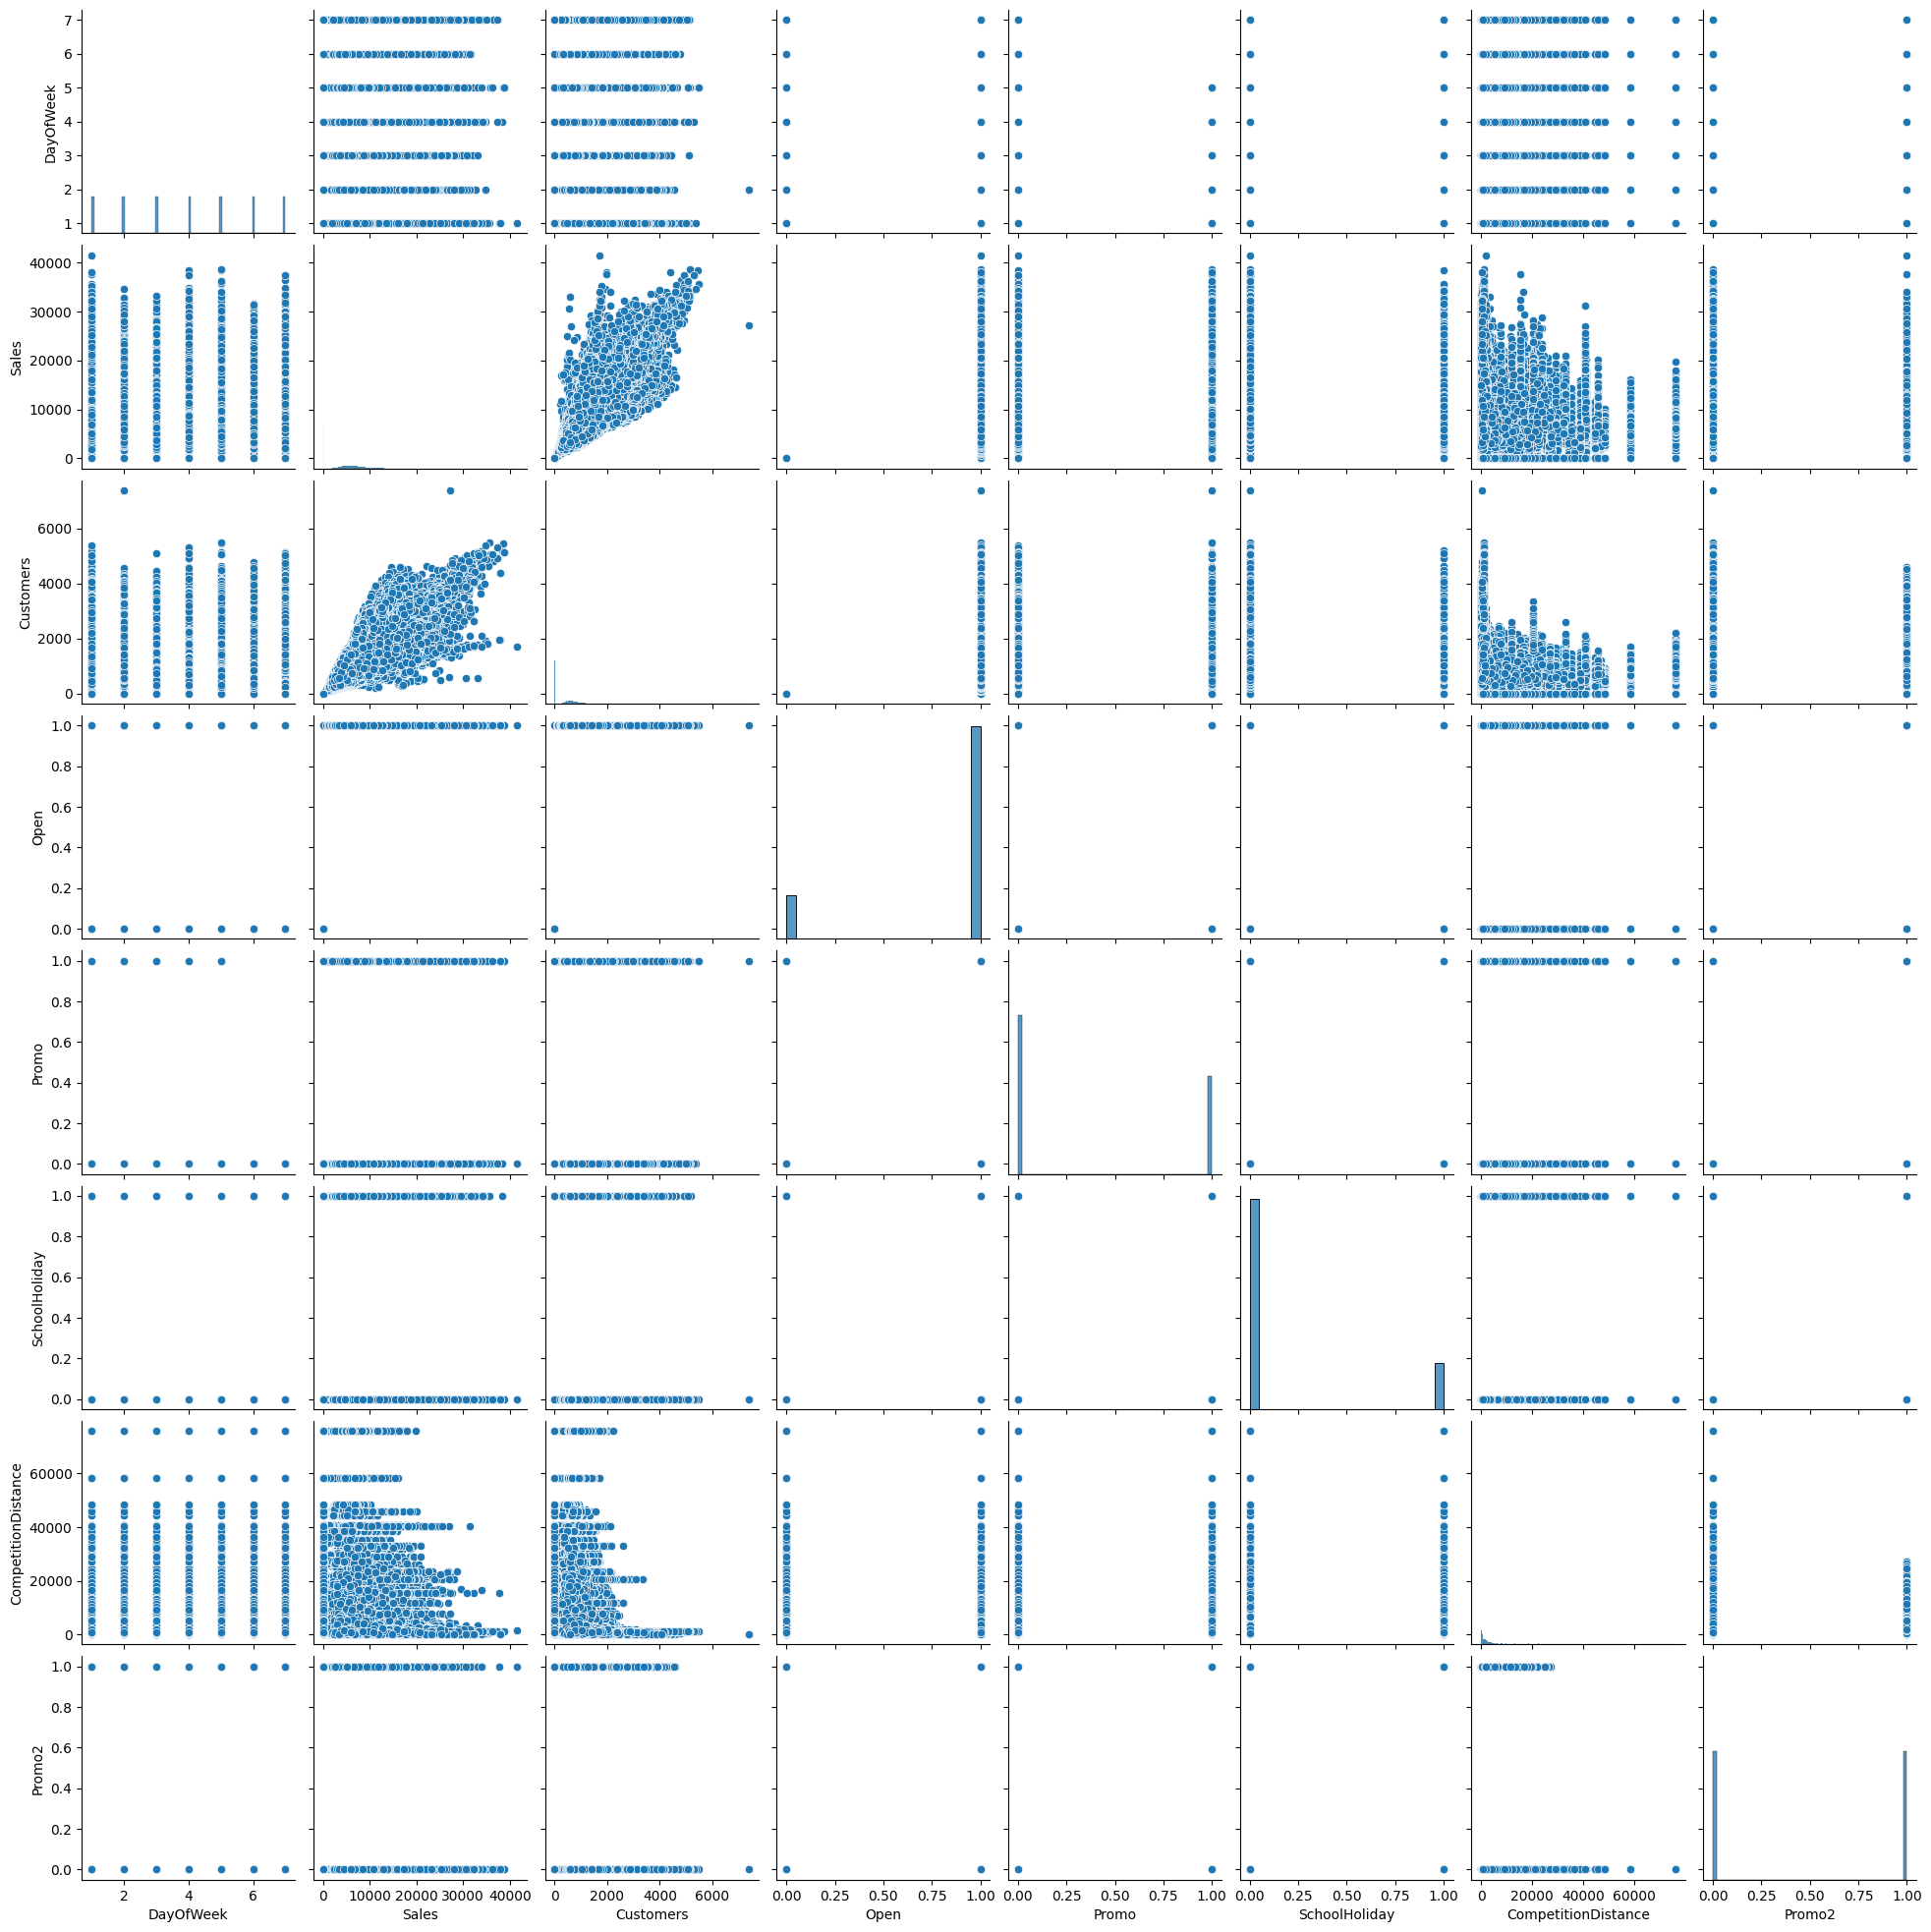

In [ ]:
# Pair Plot visualization code
sns.pairplot(df_merged[['DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday',
                       'CompetitionDistance', 'Promo2']])

##### 1. Why did you pick the specific chart?

* **Pair Plot:** Pair plots are specifically designed for exploratory data analysis (EDA) when dealing with multiple variables. They provide a comprehensive overview of the relationships between each pair of variables in the dataset.


##### 2. What is/are the insight(s) found from the chart?


* **Relationships between Variables:**
    - The pair plot reveals the relationships between different variables, such as the positive correlation between `Sales` and `Customers`.
    - It also helps to identify potential correlations between variables that might not be immediately apparent.

* **Variable Distributions:** The diagonal plots provide insights into the distribution of each individual variable. This can help to identify potential outliers, skewness, and other characteristics of the data.

* **Identifying Potential Outliers:** The scatter plots within the pair plot can visually identify potential outliers, which are data points that deviate significantly from the general trend.


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.


The four hypotheses i am testing are:

1 **Effectiveness of Promo2 on Sales**

 * **Null Hypothesis (H₀):** Stores participating in Promo2 have equal or higher total sales compared to those that do not.
 * **Alternative Hypothesis (H₁):** Stores participating in Promo2 have lower total sales than those that do not.

2 **Impact of Competition Distance on Sales**

 * **Null Hypothesis (H₀):** There is no significant relationship between competition distance and total sales.
 * **Alternative Hypothesis (H₁):** Stores located closer to competitors tend to have higher total sales.

3 **Influence of State Holidays on Sales**

 * **Null Hypothesis (H₀):** Sales on state holidays are not significantly different from sales on regular days.
 * **Alternative Hypothesis (H₁):** Sales on state holidays are significantly lower than on regular days.

4 **Influence of Number of Stores**

 * **Null hypothesis (H₀):** Sales are not correlated with the number of stores.
 * **Alternative hypothesis (H₁):** Sales are positively correlated with the number of stores.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Hypothesis 1: Effectiveness of Promo2 on Sales**

 * **Null Hypothesis (H₀):** Stores participating in Promo2 have equal or higher total sales compared to those that do not.
 * **Alternative Hypothesis (H₁):** Stores participating in Promo2 have lower total sales than those that do not.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Split data into two groups: stores with and without Promo2
promo2_sales = store_2[store_2["Promo2"] == 1]["Total Sales"]
no_promo2_sales = store_2[store_2["Promo2"] == 0]["Total Sales"]

# 1. Shapiro-Wilk Test for Normality
print("\n=== Shapiro-Wilk Test for Normality ===")

shapiro_promo2 = stats.shapiro(promo2_sales)
shapiro_no_promo2 = stats.shapiro(no_promo2_sales)

print(f"Promo2 Sales: Statistic={shapiro_promo2.statistic:.4f}, P-value={shapiro_promo2.pvalue:.4e}")
print(f"No Promo2 Sales: Statistic={shapiro_no_promo2.statistic:.4f}, P-value={shapiro_no_promo2.pvalue:.4e}")

# Check normality
alpha = 0.05
promo2_normal = shapiro_promo2.pvalue > alpha
no_promo2_normal = shapiro_no_promo2.pvalue > alpha

print("\nInterpretation of Normality Test:")
if promo2_normal:
    print("Sales data for Promo2 stores is normally distributed.")
else:
    print("Sales data for Promo2 stores is NOT normally distributed.")

if no_promo2_normal:
    print("Sales data for non-Promo2 stores is normally distributed.")
else:
    print("Sales data for non-Promo2 stores is NOT normally distributed.")

# 2. Statistical Test: T-test (if normal) or Mann-Whitney U (if non-normal)
print("\n=== Statistical Test: Comparing Sales Between Promo2 and Non-Promo2 Stores ===")

if promo2_normal and no_promo2_normal:
    # Independent T-Test for normal distributions
    test_stat, p_value = stats.ttest_ind(promo2_sales, no_promo2_sales, alternative='two-sided')
    test_used = "Independent T-Test"
else:
    # Mann-Whitney U Test for non-normal distributions
    test_stat, p_value = stats.mannwhitneyu(promo2_sales, no_promo2_sales, alternative='two-sided')
    test_used = "Mann-Whitney U Test"

# Display test results
print(f"{test_used} Results:")
print(f"Test Statistic: {test_stat:.4f}")
print(f"P-value: {p_value:.4e}")

# 3. Hypothesis Conclusion
print("\nHypothesis Test Conclusion:")

if p_value < alpha:
    print("Reject H₀: There is a significant difference in sales between Promo2 and non-Promo2 stores.")
    if promo2_sales.median() > no_promo2_sales.median():
        print("Stores with Promo2 have HIGHER median sales than those without Promo2.")
    else:
        print("Stores with Promo2 have LOWER median sales than those without Promo2.")
else:
    print("Fail to Reject H₀: No significant difference in sales between Promo2 and non-Promo2 stores.")

# 4. Sales Summary: Median for context
print("\n=== Median Sales Comparison ===")
print(f"Median Sales with Promo2: {promo2_sales.median():,.2f}")
print(f"Median Sales without Promo2: {no_promo2_sales.median():,.2f}\n")



=== Shapiro-Wilk Test for Normality ===
Promo2 Sales: Statistic=0.9362, P-value=6.5948e-15
No Promo2 Sales: Statistic=0.8580, P-value=9.3091e-22

Interpretation of Normality Test:
Sales data for Promo2 stores is NOT normally distributed.
Sales data for non-Promo2 stores is NOT normally distributed.

=== Statistical Test: Comparing Sales Between Promo2 and Non-Promo2 Stores ===
Mann-Whitney U Test Results:
Test Statistic: 115556.0000
P-value: 1.3961e-13

Hypothesis Test Conclusion:
Reject H₀: There is a significant difference in sales between Promo2 and non-Promo2 stores.
Stores with Promo2 have LOWER median sales than those without Promo2.

=== Median Sales Comparison ===
Median Sales with Promo2: 4,635,585.00
Median Sales without Promo2: 5,361,383.00



##### Which statistical test have you done to obtain P-Value?

   - The **Mann-Whitney U Test** was performed to compare the sales between stores with Promo2 and those without Promo2.




##### Why did you choose the specific statistical test?

   - The **Mann-Whitney U Test** was selected because the **Shapiro-Wilk test for normality** indicated that the sales data for both Promo2 and non-Promo2 stores were **not normally distributed** (p-values: 6.5948e-15 and 9.3091e-22, both < 0.05).  
   - Since the data violated the assumption of normality required for parametric tests like the t-test, the non-parametric Mann-Whitney U Test was the appropriate choice to assess whether there is a significant difference in sales between the two groups.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Impact of Competition Distance on Sales**

 * **Null Hypothesis (H₀):** There is no significant relationship between competition distance and total sales.
 * **Alternative Hypothesis (H₁):** Stores located closer to competitors tend to have higher total sales.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Extract relevant columns
comp_distance = store_2['CompetitionDistance']
sales = store_2['Total Sales']

# Normality tests using Shapiro-Wilk test
shapiro_sales = stats.shapiro(sales)
shapiro_distance = stats.shapiro(comp_distance)

# Display Shapiro-Wilk test results
print("Shapiro-Wilk Test for Normality:")
print(f"Sales: Statistic={shapiro_sales.statistic:.4f}, P-value={shapiro_sales.pvalue:.4f}")
print(f"Competition Distance: Statistic={shapiro_distance.statistic:.4f}, P-value={shapiro_distance.pvalue:.4f}")

# Interpretation of normality test
alpha = 0.05
print("\nInterpretation:")
sales_normal = shapiro_sales.pvalue > alpha
distance_normal = shapiro_distance.pvalue > alpha

if sales_normal:
    print("Sales follow a normal distribution.")
else:
    print("Sales do NOT follow a normal distribution.")

if distance_normal:
    print("Competition Distance follows a normal distribution.")
else:
    print("Competition Distance does NOT follow a normal distribution.")

# Choose appropriate correlation test based on normality
print("\nStatistical Test for Correlation:")

if sales_normal and distance_normal:
    # Pearson correlation for normally distributed data
    corr, p_value = stats.pearsonr(comp_distance, sales)
    test_used = "Pearson Correlation"
else:
    # Spearman correlation for non-normal data
    corr, p_value = stats.spearmanr(comp_distance, sales)
    test_used = "Spearman Correlation"

# Display correlation results
print(f"{test_used} Results:")
print(f"Correlation Coefficient: {corr:.4f}")
print(f"P-value: {p_value:.4f}")

# Hypothesis testing conclusion
print("\nHypothesis Test Conclusion:")

if p_value < alpha:
    print("Reject H₀: There is a significant correlation between competition distance and sales.")
    if corr > 0:
        print("The correlation is positive — sales tend to increase as competition distance increases.")
    else:
        print("The correlation is negative — sales tend to decrease as competition distance increases.")
else:
    print("Fail to Reject H₀: No significant correlation between competition distance and sales.")


Shapiro-Wilk Test for Normality:
Sales: Statistic=0.8723, P-value=0.0000
Competition Distance: Statistic=0.6781, P-value=0.0000

Interpretation:
Sales do NOT follow a normal distribution.
Competition Distance does NOT follow a normal distribution.

Statistical Test for Correlation:
Spearman Correlation Results:
Correlation Coefficient: -0.0237
P-value: 0.4290

Hypothesis Test Conclusion:
Fail to Reject H₀: No significant correlation between competition distance and sales.


##### Which statistical test have you done to obtain P-Value?

The **Spearman Correlation Test** was conducted to evaluate the relationship between **competition distance** and **sales**.

  


##### Why did you choose the specific statistical test?

   - The **Spearman Correlation Test** was chosen because the **Shapiro-Wilk test for normality** showed that both **sales** (p-value = 0.0000) and **competition distance** (p-value = 0.0000) were **not normally distributed**.  
   - Since the data violated the assumption of normality required for **Pearson correlation**, the **non-parametric Spearman correlation** was the appropriate method to measure the strength and direction of the relationship between these two variables.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Influence of State Holidays on Sales**

 * **Null Hypothesis (H₀):** Sales on state holidays are not significantly different from sales on regular days.
 * **Alternative Hypothesis (H₁):** Sales on state holidays are significantly lower than on regular days.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Extract sales data for state holidays vs. regular days
sales_holiday = df_rossmann_data[df_rossmann_data['StateHoliday'] != '0']['Sales']
sales_regular = df_rossmann_data[df_rossmann_data['StateHoliday'] == '0']['Sales']

# Normality tests using Shapiro-Wilk test
shapiro_holiday = stats.shapiro(sales_holiday)
shapiro_regular = stats.shapiro(sales_regular)

# Display Shapiro-Wilk test results
print("Shapiro-Wilk Test for Normality:")
print(f"State Holidays: Statistic={shapiro_holiday.statistic:.4f}, P-value={shapiro_holiday.pvalue:.4f}")
print(f"Regular Days: Statistic={shapiro_regular.statistic:.4f}, P-value={shapiro_regular.pvalue:.4f}")

# Interpretation of normality test
alpha = 0.05
print("\nInterpretation:")
holiday_normal = shapiro_holiday.pvalue > alpha
regular_normal = shapiro_regular.pvalue > alpha

if holiday_normal:
    print("Sales on state holidays follow a normal distribution.")
else:
    print("Sales on state holidays do NOT follow a normal distribution.")

if regular_normal:
    print("Sales on regular days follow a normal distribution.")
else:
    print("Sales on regular days do NOT follow a normal distribution.")

# Statistical test selection based on normality check
print("\nStatistical Test for Sales Comparison:")

if holiday_normal and regular_normal:
    # Use Independent T-Test if both distributions are normal
    test_stat, p_value = stats.ttest_ind(sales_holiday, sales_regular, alternative='less')
    test_used = "Independent T-Test"
else:
    # Use Mann-Whitney U Test if any distribution is non-normal
    test_stat, p_value = stats.mannwhitneyu(sales_holiday, sales_regular, alternative='less')
    test_used = "Mann-Whitney U Test"

# Display test results
print(f"{test_used} Results:")
print(f"Test Statistic: {test_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Hypothesis testing conclusion
print("\nHypothesis Test Conclusion:")

if p_value < alpha:
    print("Reject H₀: Sales on state holidays are significantly lower than regular days.")
else:
    print("Fail to Reject H₀: No significant evidence that sales drop on state holidays.")


Shapiro-Wilk Test for Normality:
State Holidays: Statistic=0.1280, P-value=0.0000
Regular Days: Statistic=0.9448, P-value=0.0000

Interpretation:
Sales on state holidays do NOT follow a normal distribution.
Sales on regular days do NOT follow a normal distribution.

Statistical Test for Sales Comparison:
Mann-Whitney U Test Results:
Test Statistic: 2725643778.5000
P-value: 0.0000

Hypothesis Test Conclusion:
Reject H₀: Sales on state holidays are significantly lower than regular days.


##### Which statistical test have you done to obtain P-Value?

The **Mann-Whitney U Test** was performed to compare **sales on state holidays** versus **regular days**.  

  


##### Why did you choose the specific statistical test?

   - The **Mann-Whitney U Test** was selected because the **Shapiro-Wilk test for normality** indicated that both **sales on state holidays** (p-value = 0.0000) and **sales on regular days** (p-value = 0.0000) were **not normally distributed**.  
   - Since the data did not meet the normality assumption required for parametric tests like the t-test, the **non-parametric Mann-Whitney U Test** was the appropriate method to assess whether there was a significant difference in sales between these two groups.

### Hypothetical Statement - 4

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Influence of Number of Stores**

* **Null hypothesis (H₀):** Sales are not correlated with the number of stores.
* **Alternative hypothesis (H₁):** Sales are positively correlated with the number of stores.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Calculate proportions
store_type_proportions = df_merged['StoreType'].value_counts(normalize=True)
store_type_sales_proportions = df_merged.groupby('StoreType')['Sales'].sum() / df_merged['Sales'].sum()

# Ensure the proportions are aligned by StoreType for correct testing
store_type_proportions = store_type_proportions.sort_index()
store_type_sales_proportions = store_type_sales_proportions.sort_index()

# Normality tests using Shapiro-Wilk test
shapiro_proportions = stats.shapiro(store_type_proportions)
shapiro_sales_proportions = stats.shapiro(store_type_sales_proportions)

# Display Shapiro-Wilk test results
print("Shapiro-Wilk Test for StoreType Proportions:")
print(f"Statistic={shapiro_proportions.statistic:.4f}, P-value={shapiro_proportions.pvalue:.4f}")

print("\nShapiro-Wilk Test for Sales Proportions:")
print(f"Statistic={shapiro_sales_proportions.statistic:.4f}, P-value={shapiro_sales_proportions.pvalue:.4f}")

# Interpretation of p-values
alpha = 0.05
print("\nInterpretation:")
proportions_normal = shapiro_proportions.pvalue > alpha
sales_normal = shapiro_sales_proportions.pvalue > alpha

if proportions_normal:
    print("StoreType proportions follow a normal distribution.")
else:
    print("StoreType proportions do NOT follow a normal distribution.")

if sales_normal:
    print("Sales proportions follow a normal distribution.")
else:
    print("Sales proportions do NOT follow a normal distribution.")

# Correlation test
print("\nCorrelation Test:")

if proportions_normal and sales_normal:
    # Pearson correlation if both are normally distributed
    correlation, p_value = stats.pearsonr(store_type_proportions, store_type_sales_proportions)
    print("Using Pearson correlation (normal distributions)")
else:
    # Spearman correlation if any of them is not normally distributed
    correlation, p_value = stats.spearmanr(store_type_proportions, store_type_sales_proportions)
    print("Using Spearman correlation (non-normal distributions detected)")

# Display correlation results
print(f"Correlation coefficient: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

# Hypothesis test interpretation
if p_value < alpha:
    print("\nResult: There is a statistically significant correlation between StoreType proportion and Sales proportion.")
else:
    print("\nResult: There is NO statistically significant correlation between StoreType proportion and Sales proportion.")


Shapiro-Wilk Test for StoreType Proportions:
Statistic=0.9724, P-value=0.8565

Shapiro-Wilk Test for Sales Proportions:
Statistic=0.9648, P-value=0.8093

Interpretation:
StoreType proportions follow a normal distribution.
Sales proportions follow a normal distribution.

Correlation Test:
Using Pearson correlation (normal distributions)
Correlation coefficient: 0.9997
P-value: 0.0003

Result: There is a statistically significant correlation between StoreType proportion and Sales proportion.


##### Which statistical test have you done to obtain P-Value?

   - The **Pearson Correlation Test** was performed to assess the relationship between **StoreType proportions** and **Sales proportions**.  




##### Why did you choose the specific statistical test?

   - The **Pearson Correlation Test** was chosen because the **Shapiro-Wilk test for normality** showed that both **StoreType proportions** (p-value = 0.8565) and **Sales proportions** (p-value = 0.8093) were **normally distributed**.  
   - Since both variables met the normality assumption, the **parametric Pearson correlation** was the appropriate method to measure the strength and direction of their relationship.  

##  **Conclusion and Business Recommendations**  

1. **Promo2 vs. Non-Promo2 Sales:**  
   - **Result:** There is a **significant difference** in sales between Promo2 and non-Promo2 stores, with **Promo2 stores having lower median sales**.  
   - **Recommendation:** Re-evaluate the effectiveness of Promo2 strategies. Consider adjusting promotional offers, timing, or targeted marketing to better align with customer preferences. Investigate why Promo2 isn’t driving higher sales and test alternative promotions.

2. **Competition Distance vs. Sales:**  
   - **Result:** There is **no significant correlation** between competition distance and sales.  
   - **Recommendation:** The statistical test doesn'y confirm the direct relation between the `Competition Distance` and `Sales` but the **scatterplot** between `Competition Distance` and `Sales` clearly shows that the stores closer(i.e. low Competition Distance) have greater sales as compared to distant stores.
    - This suggests that there are some non-linear or complex relations between these features which `Spearman Correlation Test` was unable to catch.

3. **State Holidays vs. Regular Days Sales:**  
   - **Result:** Sales on **state holidays are significantly lower** than on regular days.  
   - **Recommendation:** Implement holiday-specific strategies, such as flash sales, festive discounts, or online promotions to counteract the drop in sales during state holidays. Consider pre-holiday campaigns to boost revenue.

4. **StoreType vs. Sales Proportions:**  
   - **Result:** There is a **strong, significant correlation** between **StoreType proportions and Sales proportions**.  
   - **Recommendation:** Leverage this insight to forecast sales based on store types. Invest more resources into high-performing store types while exploring ways to uplift the sales potential of lower-performing ones.  


## ***6. Feature Engineering & Data Pre-processing***

At first, i will the two datasets ->
1. **Rossmann Data** - Containing the transactions details.
2. **Store Data** - Containing store details.

because it allows us to enrich the transactional sales data (df_rossmann_data) with store-related attributes (df_store_detail).

In [ ]:
# Creating a function which will give the basic overview of the dataset
def dataset_overview(df):
    """
    Provides a basic overview of a given DataFrame.

    Parameters:
    df (pd.DataFrame): The merged dataset.

    Returns:
    None
    """
    print("="*40)
    print(" Dataset Overview")
    print("="*40)

    # Shape of the dataset
    print(f" Shape of Dataset: {df.shape[0]} rows, {df.shape[1]} columns\n")

    # Column information
    print("="*40)
    print(" Column Information")
    print("="*40)
    print(df.info())

    # Checking for missing values
    print("\n Missing Values per Column:")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0] if missing_values.sum() > 0 else " No missing values found.")

    # Checking for duplicate rows
    duplicate_rows = df.duplicated().sum()
    print(f"\n Number of Duplicate Rows: {duplicate_rows}")

    # Summary statistics
    print("\n Summary Statistics:")
    print(df.describe())

# Checking the merged datset
print(dataset_overview(df_merged))


 Dataset Overview
 Shape of Dataset: 1017209 rows, 18 columns

 Column Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment         

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# I have handled the missing values of both the datasets in the DATA WRANGLING Section previously

#### What all missing value imputation techniques have you used and why did you use those techniques?

**Median Imputation for `CompetitionDistance`**  
   * **Why?** Since `CompetitionDistance` is a numerical variable and likely skewed, the median is a more robust choice compared to the mean, which can be influenced by outliers.  

**Logical Imputation for `Promo2SinceWeek`, `Promo2SinceYear`, and `PromoInterval`**  
   * **Why?** When `Promo2` is `0` (indicating no participation in Promo2), the related columns (`Promo2SinceWeek`, `Promo2SinceYear`, `PromoInterval`) were `NaN`.  
   * Instead of imputing them arbitrarily, you logically assigned:
     * `0` for `Promo2SinceWeek` and `Promo2SinceYear`, since no promotion existed.
     * `"0"` for `PromoInterval`, indicating no promo schedule.  

**Median Imputation for `CompetitionOpenSinceMonth` and `CompetitionOpenSinceYear`**  
   * **Why?** Since these are numeric variables with missing values, i visualized them using a boxplot to check for skewness.  
   * Using the median ensures that the imputation doesn't distort the distribution, particularly in cases where the data is skewed.  

### 2. Handling Outliers

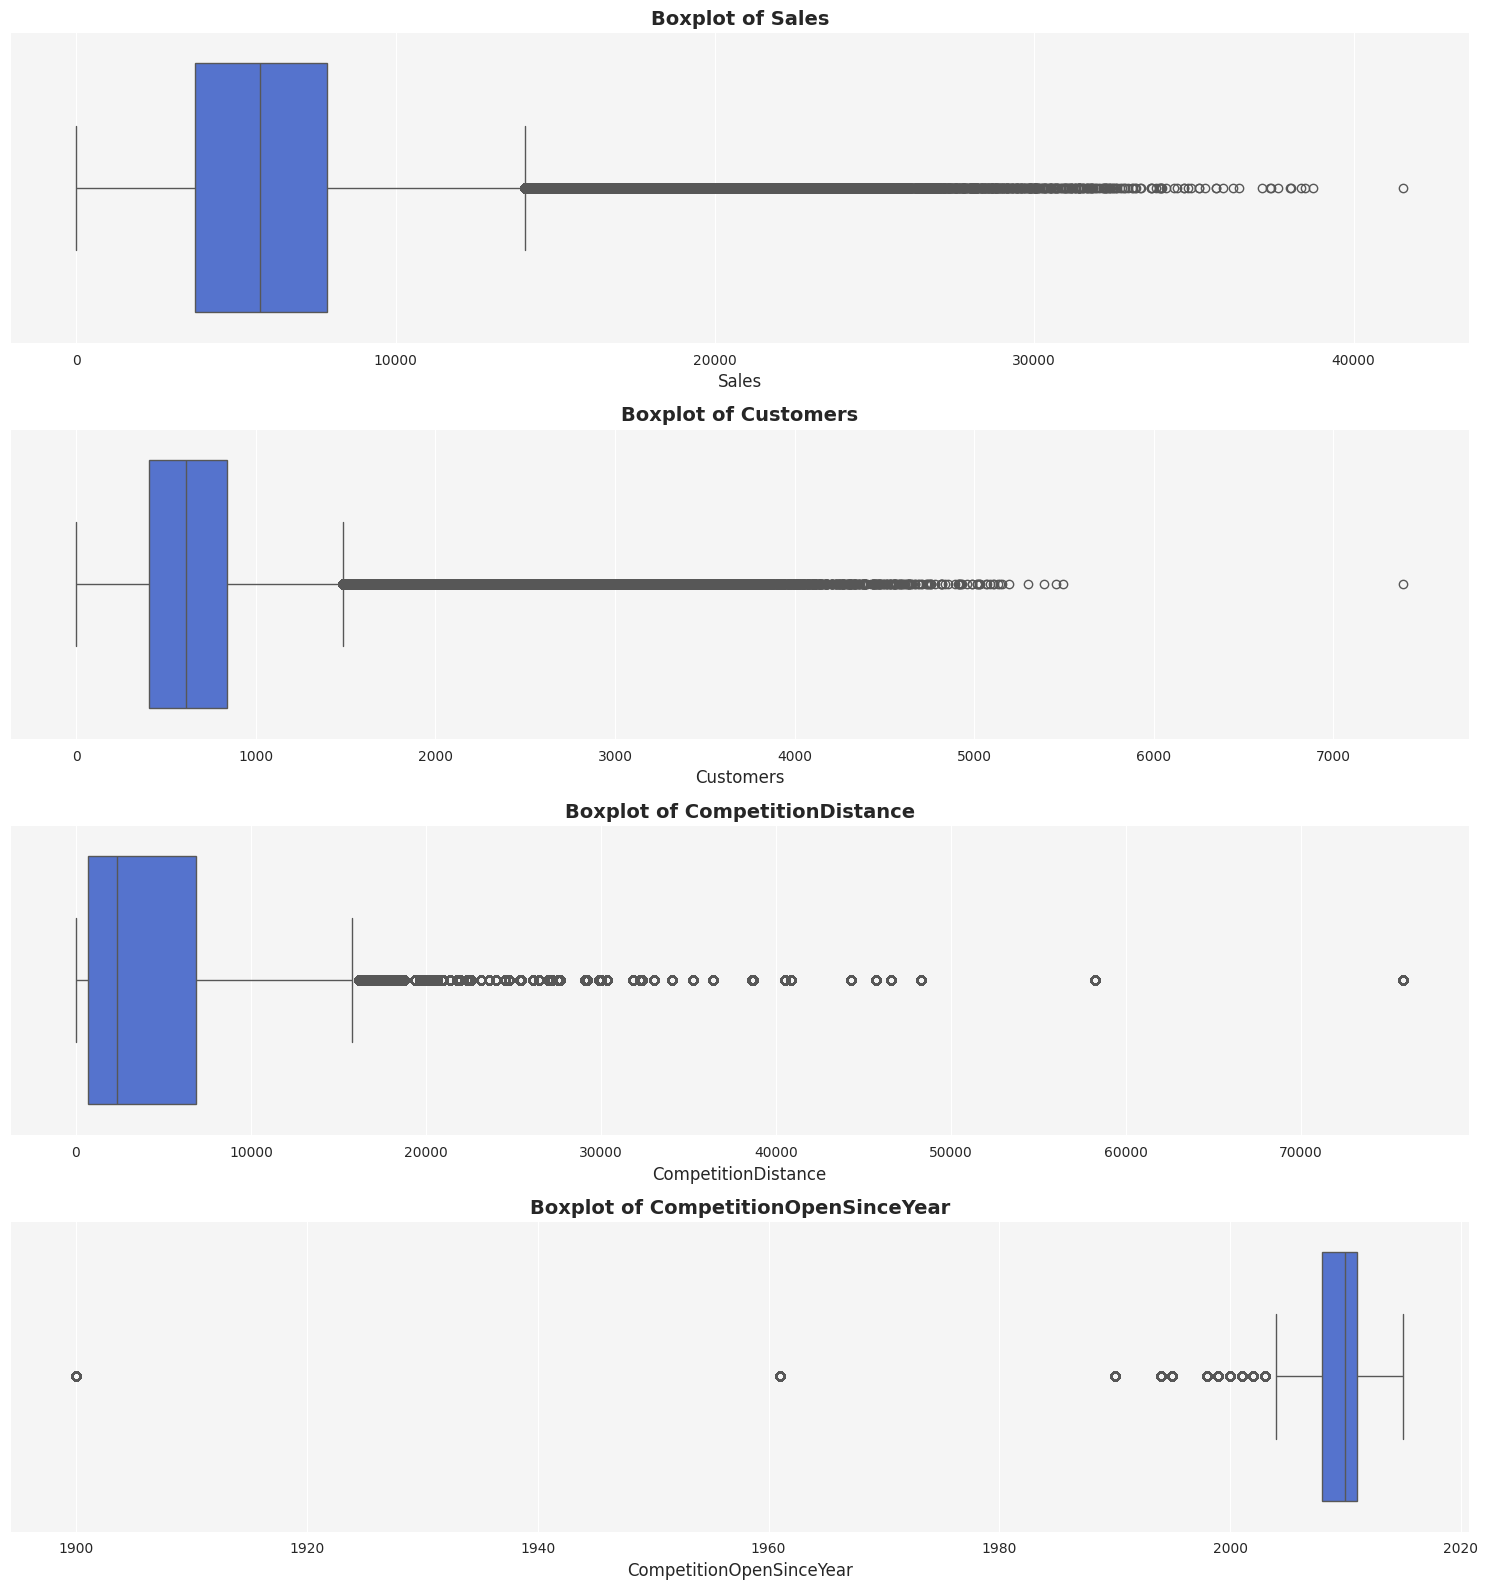

In [ ]:
# visualizing columns data distribution

# Set the style and background color
sns.set_style("darkgrid")
plt.rcParams['axes.facecolor'] = '#F5F5F5'  # Light gray background

# List of numerical columns with outliers
outlier_columns = ['Sales', 'Customers', 'CompetitionDistance', 'CompetitionOpenSinceYear']

# Creating boxplots for numerical features
plt.figure(figsize=(15, len(outlier_columns) * 4))
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(len(outlier_columns), 1, i)
    sns.boxplot(x=df_merged[col], color='royalblue')  # Blue boxplots
    plt.title(f'Boxplot of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.gca().set_facecolor('#F5F5F5')  # Set subplot background color
plt.tight_layout()
plt.show()


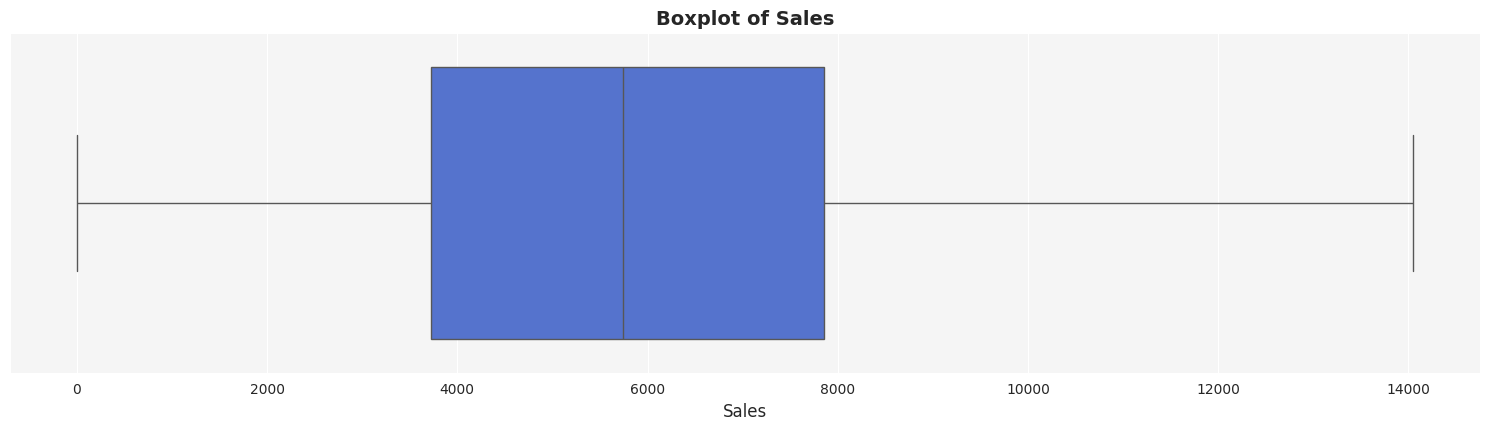

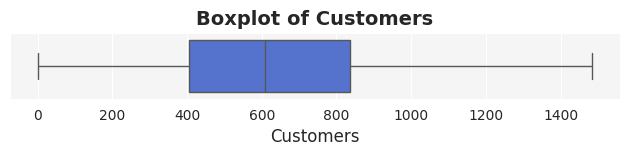

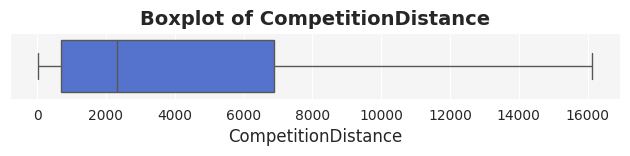

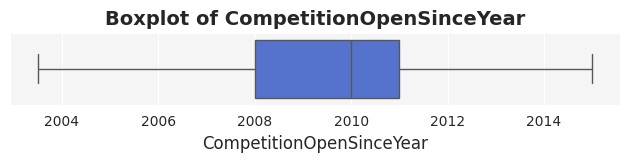

In [ ]:
# Handling Outliers & Outlier treatments
# List of numerical columns with outliers
outlier_columns = ['Sales', 'Customers', 'CompetitionDistance', 'CompetitionOpenSinceYear']
# Function to cap outliers using IQR method
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range

    # Define upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the values
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Apply capping to selected columns
for col in outlier_columns:
    cap_outliers_iqr(df_merged, col)

# Visualization
plt.figure(figsize=(15, len(outlier_columns) * 4))
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(len(outlier_columns), 1, i)
    sns.boxplot(x=df_merged[col], color='royalblue')  # Blue boxplots
    plt.title(f'Boxplot of {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.gca().set_facecolor('#F5F5F5')  # Set subplot background color
    plt.tight_layout()
    plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

### **Techniques Used:**  
1. **IQR-Based Capping** (Winsorization)  
   - Identified outliers using **Q1 (25th percentile)** and **Q3 (75th percentile)**.  
   - Defined outlier boundaries as:  
     - Lower Bound = Q1 - 1.5 * IQR
     - Upper Bound = Q1 + 1.5 * IQR
   - Replaced extreme values with the nearest boundary (capping).  

### **Why I Used IQR?**  
**Better for Skewed Data** - Works well for features like **Sales, Customers, and CompetitionDistance**, which tend to be right-skewed.  
**Preserves Data Integrity** - Instead of removing outliers, it **caps extreme values**, preventing data loss.  
**Avoids Influence of Mean** - Unlike the **Z-score method**, which is sensitive to normal distribution, IQR does not rely on mean and standard deviation.  
**Prepares Data for Regression** - Reducing extreme values helps prevent the model from being biased by outliers.  


### 3. Categorical Encoding

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  float64       
 4   Customers                  1017209 non-null  float64       
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [ ]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataframe to avoid modifying the original
df_encoded = df_merged.copy()
# I am not encoding StateHoliday as i will use this feature differently

# Label Encode StoreType and Assortment
label_encoders = {}  # Store encoders for later use (if needed)
for col in ['StoreType', 'Assortment', 'PromoInterval']:
    # Convert the column to string type before label encoding
    df_encoded[col] = df_encoded[col].astype(str)
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Save the encoder if needed later

# Print new shapes of encoded dataframes
print("Label Encoded DataFrame Shape:", df_encoded.shape)

# Displaying all columns of datframe
pd.set_option('display.max_columns', None)
# Display first few rows to verify encoding
display(df_encoded.head())

Label Encoded DataFrame Shape: (1017209, 18)


Store  DayOfWeek       Date    Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263.0      555.0     1      1            0   
1      2          5 2015-07-31   6064.0      625.0     1      1            0   
2      3          5 2015-07-31   8314.0      821.0     1      1            0   
3      4          5 2015-07-31  13995.0     1485.0     1      1            0   
4      5          5 2015-07-31   4822.0      559.0     1      1            0   

   SchoolHoliday  StoreType  Assortment  CompetitionDistance  \
0              1          2           0               1270.0   
1              1          0           0                570.0   
2              1          0           0              14130.0   
3              1          2           2                620.0   
4              1          0           0              16135.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                          9                    2008.0       0   
1                         11                    2007.0       1   
2                         12                    2006.0       1   
3                          9                    2009.0       0   
4                          4                    2015.0       0   

   Promo2SinceWeek  Promo2SinceYear  PromoInterval  
0                0                0              0  
1               13             2010              2  
2               14             2011              2  
3                0                0              0  
4                0                0              0

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  float64       
 4   Customers                  1017209 non-null  float64       
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

#### What all categorical encoding techniques have you used & why did you use those techniques?

I used Label Encoding categorical encoding technique:    

### **Label Encoding (LE)**  
   - **Applied to:** `StateHoliday`, `StoreType`, `Assortment`, and `PromoInterval`  
   - **Why?**  
     - Used for **Regression-based models (Linear & Logistic Regression)** that cannot handle one-hot encoding well due to multicollinearity.  
     - Helps keep the number of features manageable, avoiding the curse of dimensionality caused by OHE.  
     - Works well with **tree-based models (Random Forest, XGBoost, LightGBM)** since they can handle label-encoded categorical values efficiently.  

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
df_featured = df_encoded.copy()

# Create a new binary feature 'IsStateHoliday'
df_featured['IsStateHoliday'] = df_featured['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)

# Drop the original 'StateHoliday' column as it is no longer needed
df_featured.drop(columns=['StateHoliday'], inplace=True)

# Create 'IsWeekend' Feature
df_featured['IsWeekend'] = (df_featured['DayOfWeek'] == 7).astype(int)

# Years Since Competition
df_featured['YearsSinceCompetition'] = 2015 + (8/12) - df_featured['CompetitionOpenSinceYear']

# Years Since Promo2 (Handle '0' values in Promo2SinceYear)
df_featured['YearsSincePromo2'] = np.where(df_featured['Promo2SinceYear'] == 0, 0,
                                      2015 + (8/12) - df_featured['Promo2SinceYear'])

# Sales Per Customer (Set to 0 if Store is Closed)
df_featured['SalesPerCustomer'] = np.where(df_featured['Open'] == 0, 0, df_featured['Sales'] / df_featured['Customers'])

# Filling the null values due to '0' to '0'
df_featured['SalesPerCustomer'].fillna(0, inplace=True)

# Customer Density (Set to 0 if Store is Closed)
df_featured['CustomerDensity'] = np.where(df_featured['Open'] == 0, 0, df_featured['Customers'] / df_featured['CompetitionDistance'])

# Filling the null values due to '0' to '0'
df_featured['CustomerDensity'].fillna(0, inplace=True)

# Display dataset info
print("Updated Featured DF:")
df_featured.info()

# Show first few rows
display(df_featured.head())



Updated Featured DF:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  float64       
 4   Customers                  1017209 non-null  float64       
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   SchoolHoliday              1017209 non-null  int64         
 8   StoreType                  1017209 non-null  int64         
 9   Assortment                 1017209 non-null  int64         
 10  CompetitionDistance        1017209 non-null  float64       
 11  CompetitionOpenS

Store  DayOfWeek       Date    Sales  Customers  Open  Promo  \
0      1          5 2015-07-31   5263.0      555.0     1      1   
1      2          5 2015-07-31   6064.0      625.0     1      1   
2      3          5 2015-07-31   8314.0      821.0     1      1   
3      4          5 2015-07-31  13995.0     1485.0     1      1   
4      5          5 2015-07-31   4822.0      559.0     1      1   

   SchoolHoliday  StoreType  Assortment  CompetitionDistance  \
0              1          2           0               1270.0   
1              1          0           0                570.0   
2              1          0           0              14130.0   
3              1          2           2                620.0   
4              1          0           0              16135.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                          9                    2008.0       0   
1                         11                    2007.0       1   
2                         12                    2006.0       1   
3                          9                    2009.0       0   
4                          4                    2015.0       0   

   Promo2SinceWeek  Promo2SinceYear  PromoInterval  IsStateHoliday  IsWeekend  \
0                0                0              0               0          0   
1               13             2010              2               0          0   
2               14             2011              2               0          0   
3                0                0              0               0          0   
4                0                0              0               0          0   

   YearsSinceCompetition  YearsSincePromo2  SalesPerCustomer  CustomerDensity  
0               7.666667          0.000000          9.482883         0.437008  
1               8.666667          5.666667          9.702400         1.096491  
2               9.666667          4.666667         10.126675         0.058103  
3               6.666667          0.000000          9.424242         2.395161  
4               0.666667          0.000000          8.626118         0.034645

In [ ]:
# Average Sales to Average Customers of each specific stores
df_featured['Av_Sales_Customer_ratio'] = df_featured.groupby('Store')['Sales'].transform('mean') / df_featured.groupby('Store')['Customers'].transform('mean')

#### 2. Feature Selection

In [ ]:
df_featured.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'IsStateHoliday',
       'IsWeekend', 'YearsSinceCompetition', 'YearsSincePromo2',
       'SalesPerCustomer', 'CustomerDensity', 'Av_Sales_Customer_ratio'],
      dtype='object')

In [ ]:
# Select your features wisely to avoid overfitting
# Since when store is closed,there is no sales or customers, there is no need for that information
df_featured = df_featured[df_featured['Open'] != 0]


In [ ]:
# Step 1: Remove Irrelevant Features
# Dropping Customers too because this feature will not be present in future during actual prediction
df_featured = df_featured.drop(columns=['Store', 'Date', 'Open','Customers'])
# Display first few rows
df_featured.head()

DayOfWeek    Sales  Promo  SchoolHoliday  StoreType  Assortment  \
0          5   5263.0      1              1          2           0   
1          5   6064.0      1              1          0           0   
2          5   8314.0      1              1          0           0   
3          5  13995.0      1              1          2           2   
4          5   4822.0      1              1          0           0   

   CompetitionDistance  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0               1270.0                          9                    2008.0   
1                570.0                         11                    2007.0   
2              14130.0                         12                    2006.0   
3                620.0                          9                    2009.0   
4              16135.0                          4                    2015.0   

   Promo2  Promo2SinceWeek  Promo2SinceYear  PromoInterval  IsStateHoliday  \
0       0                0                0              0               0   
1       1               13             2010              2               0   
2       1               14             2011              2               0   
3       0                0                0              0               0   
4       0                0                0              0               0   

   IsWeekend  YearsSinceCompetition  YearsSincePromo2  SalesPerCustomer  \
0          0               7.666667          0.000000          9.482883   
1          0               8.666667          5.666667          9.702400   
2          0               9.666667          4.666667         10.126675   
3          0               6.666667          0.000000          9.424242   
4          0               0.666667          0.000000          8.626118   

   CustomerDensity  Av_Sales_Customer_ratio  
0         0.437008                 8.437366  
1         1.096491                 8.482725  
2         0.058103                 9.251898  
3         2.395161                 7.412393  
4         0.034645                 8.702634

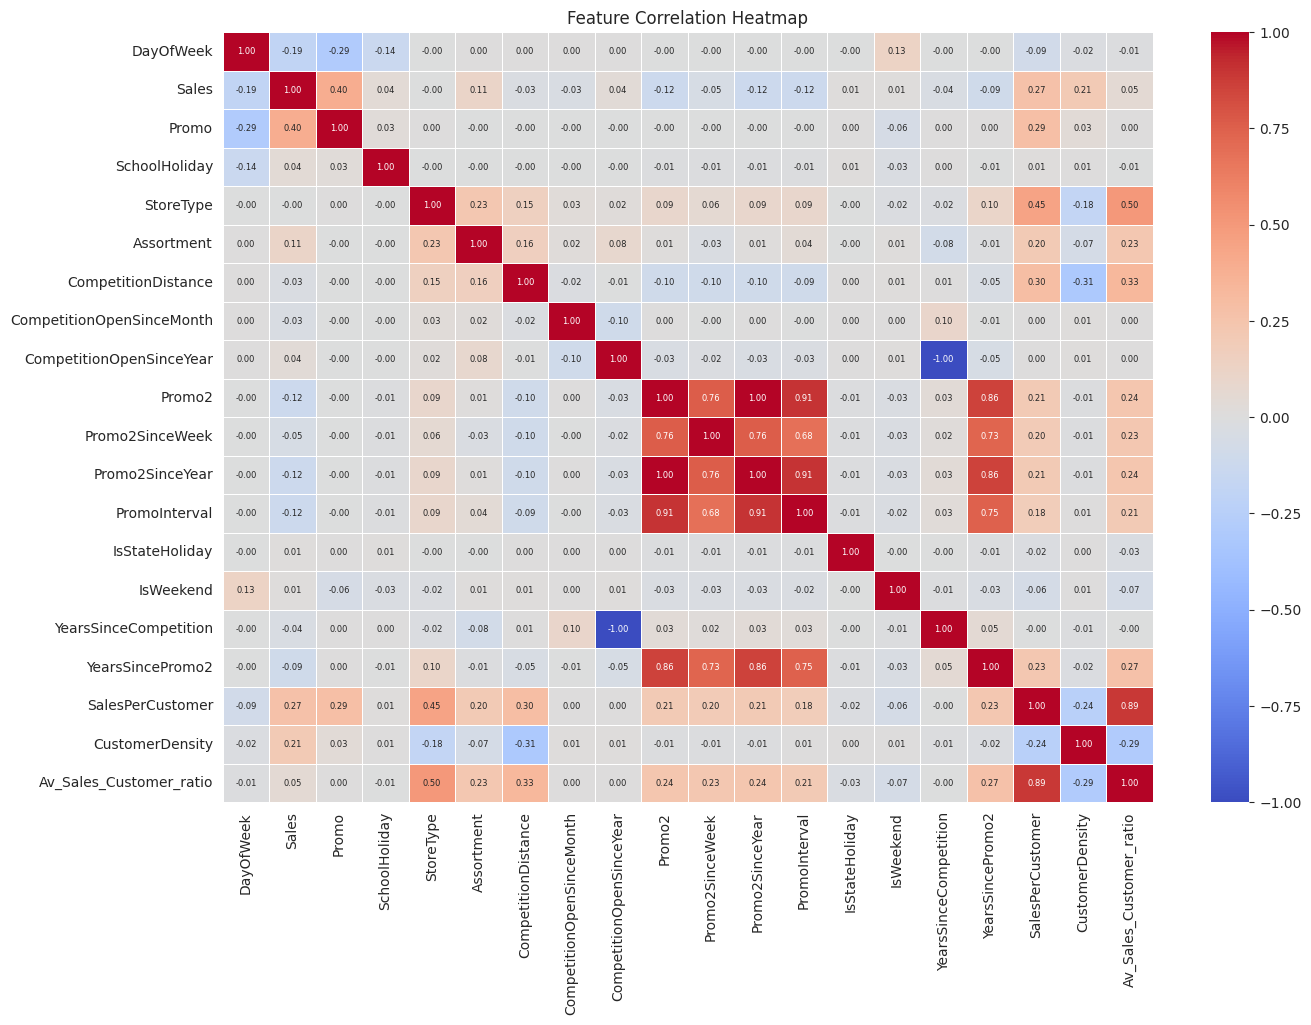

In [ ]:
# Step 2: Identify Highly Correlated Features
plt.figure(figsize=(15, 10))
sns.heatmap(df_featured.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, annot_kws={"fontsize": 6})
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
# Dropping Promo2SinceYear as its highly correlated with other features
# We will remove other correlated features next
df_featured = df_featured.drop(columns=['Promo2SinceYear'])

In [ ]:
df_featured.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844392 entries, 0 to 1017190
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   DayOfWeek                  844392 non-null  int64  
 1   Sales                      844392 non-null  float64
 2   Promo                      844392 non-null  int64  
 3   SchoolHoliday              844392 non-null  int64  
 4   StoreType                  844392 non-null  int64  
 5   Assortment                 844392 non-null  int64  
 6   CompetitionDistance        844392 non-null  float64
 7   CompetitionOpenSinceMonth  844392 non-null  int64  
 8   CompetitionOpenSinceYear   844392 non-null  float64
 9   Promo2                     844392 non-null  int64  
 10  Promo2SinceWeek            844392 non-null  int64  
 11  PromoInterval              844392 non-null  int64  
 12  IsStateHoliday             844392 non-null  int64  
 13  IsWeekend                  844392

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute VIF for all features
def calculate_vif(df):
    """ Function to compute VIF for all numerical features """
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

In [ ]:
# Create a temporary DataFrame that excludes the 'Sales' column
df_temp = df_featured.drop(columns=['Sales'])

# Now compute VIF on df_temp
print(calculate_vif(df_temp).sort_values(by="VIF", ascending=False))

                      Feature        VIF
7    CompetitionOpenSinceYear  54.394879
8                      Promo2  10.053957
17    Av_Sales_Customer_ratio   7.519985
15           SalesPerCustomer   7.375283
10              PromoInterval   5.691255
13      YearsSinceCompetition   5.144359
14           YearsSincePromo2   4.168967
9             Promo2SinceWeek   2.550768
1                       Promo   1.686905
3                   StoreType   1.382892
5         CompetitionDistance   1.259271
16            CustomerDensity   1.169263
0                   DayOfWeek   1.127931
4                  Assortment   1.108081
12                  IsWeekend   1.027059
2               SchoolHoliday   1.021048
6   CompetitionOpenSinceMonth   1.012801
11             IsStateHoliday   1.001339


In [ ]:
df_temp = df_temp.drop(columns=['CompetitionOpenSinceYear','CompetitionOpenSinceMonth','Promo2'])

# Now compute VIF on df_temp
print(calculate_vif(df_temp).sort_values(by="VIF", ascending=False))

                    Feature         VIF
14  Av_Sales_Customer_ratio  156.729032
12         SalesPerCustomer  156.217435
11         YearsSincePromo2    5.094505
0                 DayOfWeek    5.059905
10    YearsSinceCompetition    4.664849
7             PromoInterval    4.567779
6           Promo2SinceWeek    3.786238
1                     Promo    2.872208
3                 StoreType    2.272783
5       CompetitionDistance    2.237012
4                Assortment    2.090894
13          CustomerDensity    1.257127
2             SchoolHoliday    1.247175
9                 IsWeekend    1.029478
8            IsStateHoliday    1.001448


In [ ]:
df_temp = df_temp.drop(columns=['SalesPerCustomer'])

# Now compute VIF on df_temp
print(calculate_vif(df_temp).sort_values(by="VIF", ascending=False))

                    Feature        VIF
13  Av_Sales_Customer_ratio  15.543155
11         YearsSincePromo2   5.094366
0                 DayOfWeek   5.051090
10    YearsSinceCompetition   4.658562
7             PromoInterval   4.567655
6           Promo2SinceWeek   3.785666
3                 StoreType   2.271094
5       CompetitionDistance   2.236635
4                Assortment   2.090821
1                     Promo   1.878996
12          CustomerDensity   1.256851
2             SchoolHoliday   1.246952
9                 IsWeekend   1.028243
8            IsStateHoliday   1.001440


In [ ]:
# As we seen in the heatmap that 'storetype' is making some correlation with Av_Sales_Customer_ratio
# In the statistical test, we finds that the sales are correlated with number of storetype or assortment not related with the type of stores
# So, i am dropping this also to reduce the collinearity
df_temp = df_temp.drop(columns=['StoreType'])

# Now compute VIF on df_temp
print(calculate_vif(df_temp).sort_values(by="VIF", ascending=False))

                    Feature        VIF
12  Av_Sales_Customer_ratio  13.174590
10         YearsSincePromo2   5.089474
0                 DayOfWeek   4.985683
9     YearsSinceCompetition   4.605707
6             PromoInterval   4.567609
5           Promo2SinceWeek   3.777203
4       CompetitionDistance   2.234304
3                Assortment   2.053699
1                     Promo   1.871526
2             SchoolHoliday   1.245492
11          CustomerDensity   1.234008
8                 IsWeekend   1.028197
7            IsStateHoliday   1.001433


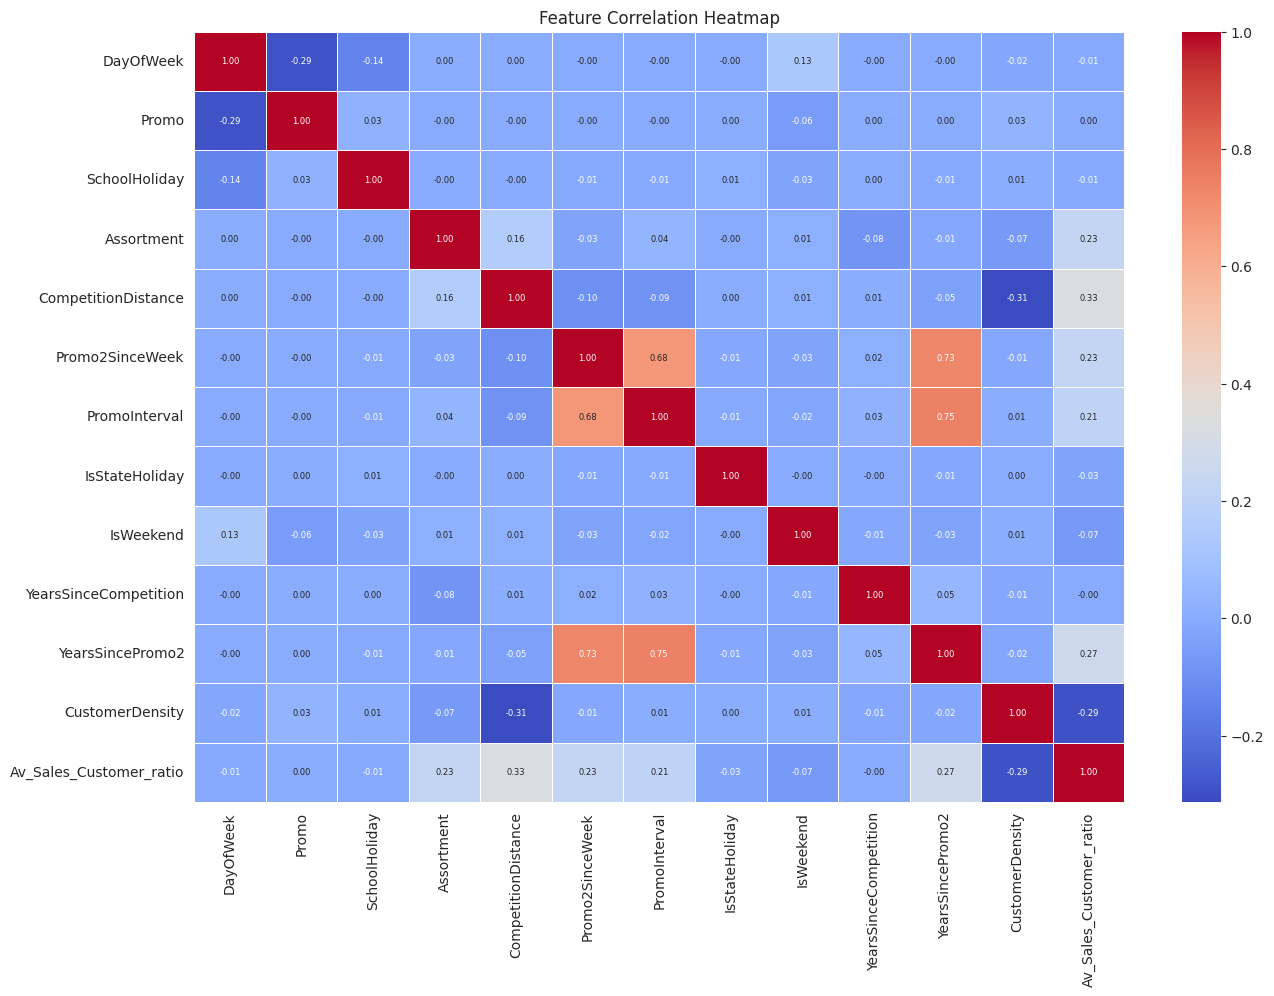

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_temp.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, annot_kws={"fontsize": 6})
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# In our statististical test, we have seen that the promo2 is not influencing sales than without promo2
# So, dropping features related to promo2 which is making correlation with Av_Sales_Customer_ratio
df_temp = df_temp.drop(columns=['Promo2SinceWeek'])

# Now compute VIF on df_temp
print(calculate_vif(df_temp).sort_values(by="VIF", ascending=False))

                    Feature        VIF
11  Av_Sales_Customer_ratio  13.023663
0                 DayOfWeek   4.985003
8     YearsSinceCompetition   4.598201
5             PromoInterval   4.198539
9          YearsSincePromo2   4.059117
4       CompetitionDistance   2.216314
3                Assortment   2.046009
1                     Promo   1.871428
2             SchoolHoliday   1.245419
10          CustomerDensity   1.233276
7                 IsWeekend   1.028188
6            IsStateHoliday   1.001430


In [ ]:
df_temp = df_temp.drop(columns=['YearsSincePromo2'])

# Now compute VIF on df_temp
print(calculate_vif(df_temp).sort_values(by="VIF", ascending=False))

                    Feature        VIF
10  Av_Sales_Customer_ratio  12.713944
0                 DayOfWeek   4.974364
8     YearsSinceCompetition   4.598071
4       CompetitionDistance   2.216294
3                Assortment   2.025061
5             PromoInterval   1.955740
1                     Promo   1.870073
2             SchoolHoliday   1.245176
9           CustomerDensity   1.233003
7                 IsWeekend   1.028010
6            IsStateHoliday   1.001408


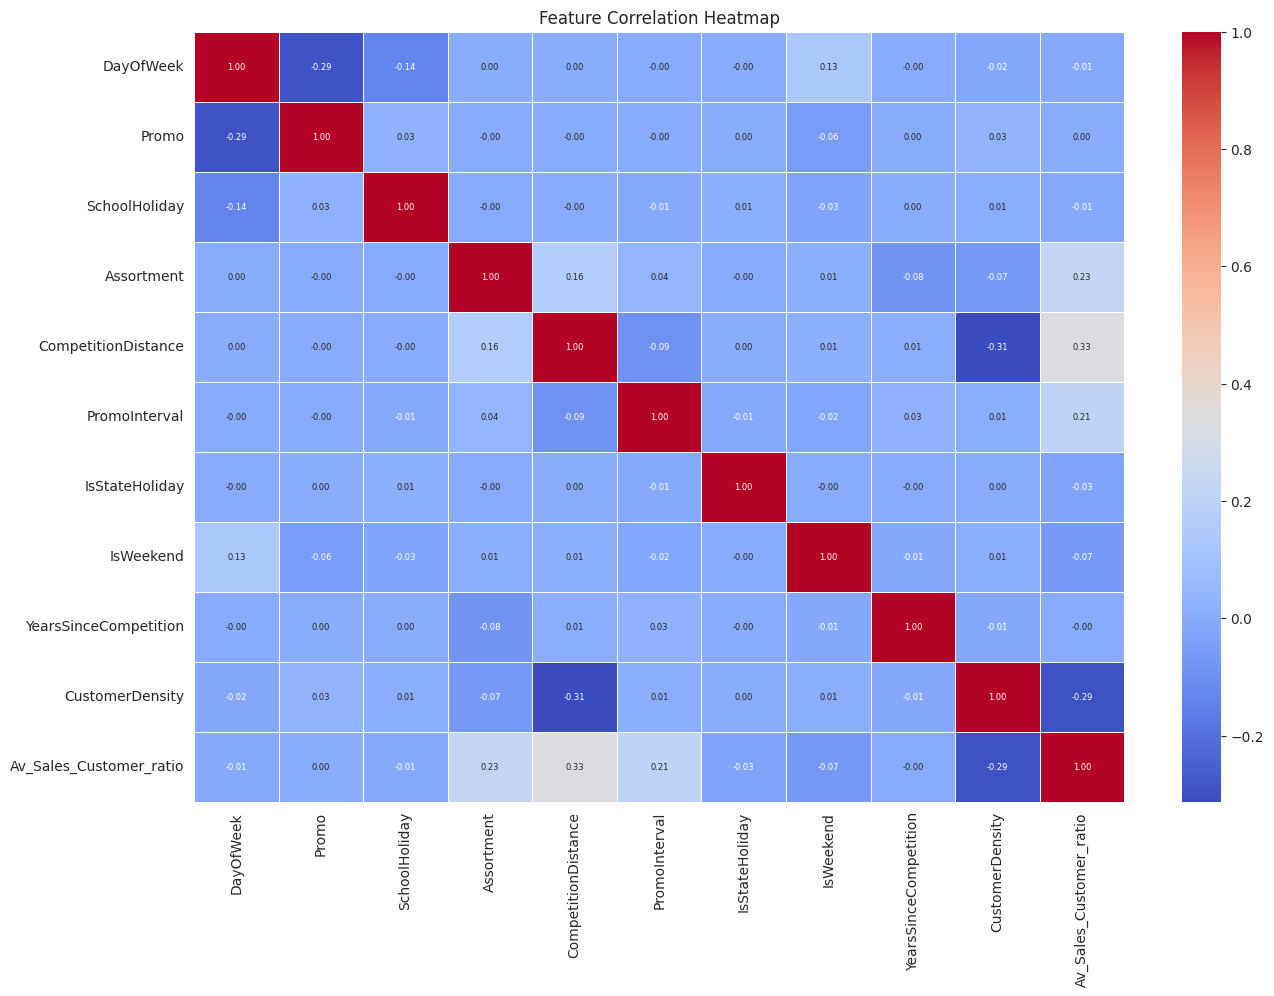

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_temp.corr(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, annot_kws={"fontsize": 6})
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
df_temp = df_temp.drop(columns=['Assortment','PromoInterval'])

# Now compute VIF on df_temp
print(calculate_vif(df_temp).sort_values(by="VIF", ascending=False))

                   Feature        VIF
8  Av_Sales_Customer_ratio  10.181247
0                DayOfWeek   4.970394
6    YearsSinceCompetition   4.559965
3      CompetitionDistance   2.139571
1                    Promo   1.869461
2            SchoolHoliday   1.244852
7          CustomerDensity   1.232210
5                IsWeekend   1.027412
4           IsStateHoliday   1.001376


In [ ]:
# So removing columns with high VIF values from df_featured
df_featured = df_featured.drop(columns=['CompetitionOpenSinceYear','CompetitionOpenSinceMonth','Promo2','SalesPerCustomer',
                                        'StoreType','Promo2SinceWeek','YearsSincePromo2','Assortment','PromoInterval'])

In [ ]:
df_featured.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844392 entries, 0 to 1017190
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   DayOfWeek                844392 non-null  int64  
 1   Sales                    844392 non-null  float64
 2   Promo                    844392 non-null  int64  
 3   SchoolHoliday            844392 non-null  int64  
 4   CompetitionDistance      844392 non-null  float64
 5   IsStateHoliday           844392 non-null  int64  
 6   IsWeekend                844392 non-null  int64  
 7   YearsSinceCompetition    844392 non-null  float64
 8   CustomerDensity          844392 non-null  float64
 9   Av_Sales_Customer_ratio  844392 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 70.9 MB


##### What all feature selection methods have you used  and why?

I used multiple feature selection techniques to ensure the best-performing and least redundant features for this models:  

1. **Removing Redundant Features**   
2. **Correlation Analysis (Heatmap & Manual Selection)**    
3. **Variance Inflation Factor (VIF) for Multicollinearity Detection**      
4. **Feature Engineering Considerations**    



##### Which all features you found important and why?

  

**Final selected features (from `df_ohe`) after feature selection:**  
- **Time-based features:** `DayOfWeek`, `IsWeekend`, `Promo`, `SchoolHoliday`    
- **Competition-related features:** `CompetitionDistance`, `YearsSinceCompetition`    
- **State-related features:** `StateHoliday_*`  
- **Engineered features:** `CustomerDensity` and `Av_Sales_Customer_ratio` (replacing `Customers`)  

**Reason for selecting these features:**  
- **Directly Influence Sales:** Features like `Promo` and `CompetitionDistance` have a direct impact on store sales.   
- **Customer Behavior Representation:** `Av_Sales_Customer_ratio` and `CustomerDensity`  
- **Time & Seasonality Effects:** `DayOfWeek`, `IsWeekend`,  and `YearsSinceCompetition` help capture long-term trends and patterns.  


### **Conclusion:**  
- The feature selection process ensured that we **removed redundancy, reduced multicollinearity, and retained meaningful predictors**.  

### 5. Data Transformation

In [ ]:
# Creating a custom function to visualize the numerical data
def visualize_feature_distribution(df, title="Feature Distributions"):
    """
    Visualizes numerical feature distributions using histograms and boxplots.

    Parameters:
    df (DataFrame): The dataset to visualize.
    title (str): Title for the entire visualization.
    """

    # Select numerical features only
    num_features = df.select_dtypes(include=['float64', 'int64']).columns

    # Set up the plotting area
    fig, axes = plt.subplots(nrows=len(num_features), ncols=1, figsize=(12, 3 * len(num_features)))
    fig.suptitle(title, fontsize=14, y=1.02)  # Set main title

    for i, col in enumerate(num_features):
        # Histogram
        # Use axes.flatten() to access axes as a 1D array
        sns.histplot(df[col], bins=50, kde=True, ax=axes.flatten()[i])
        axes.flatten()[i].set_title(f"Histogram of {col}")

    plt.tight_layout()
    plt.show()

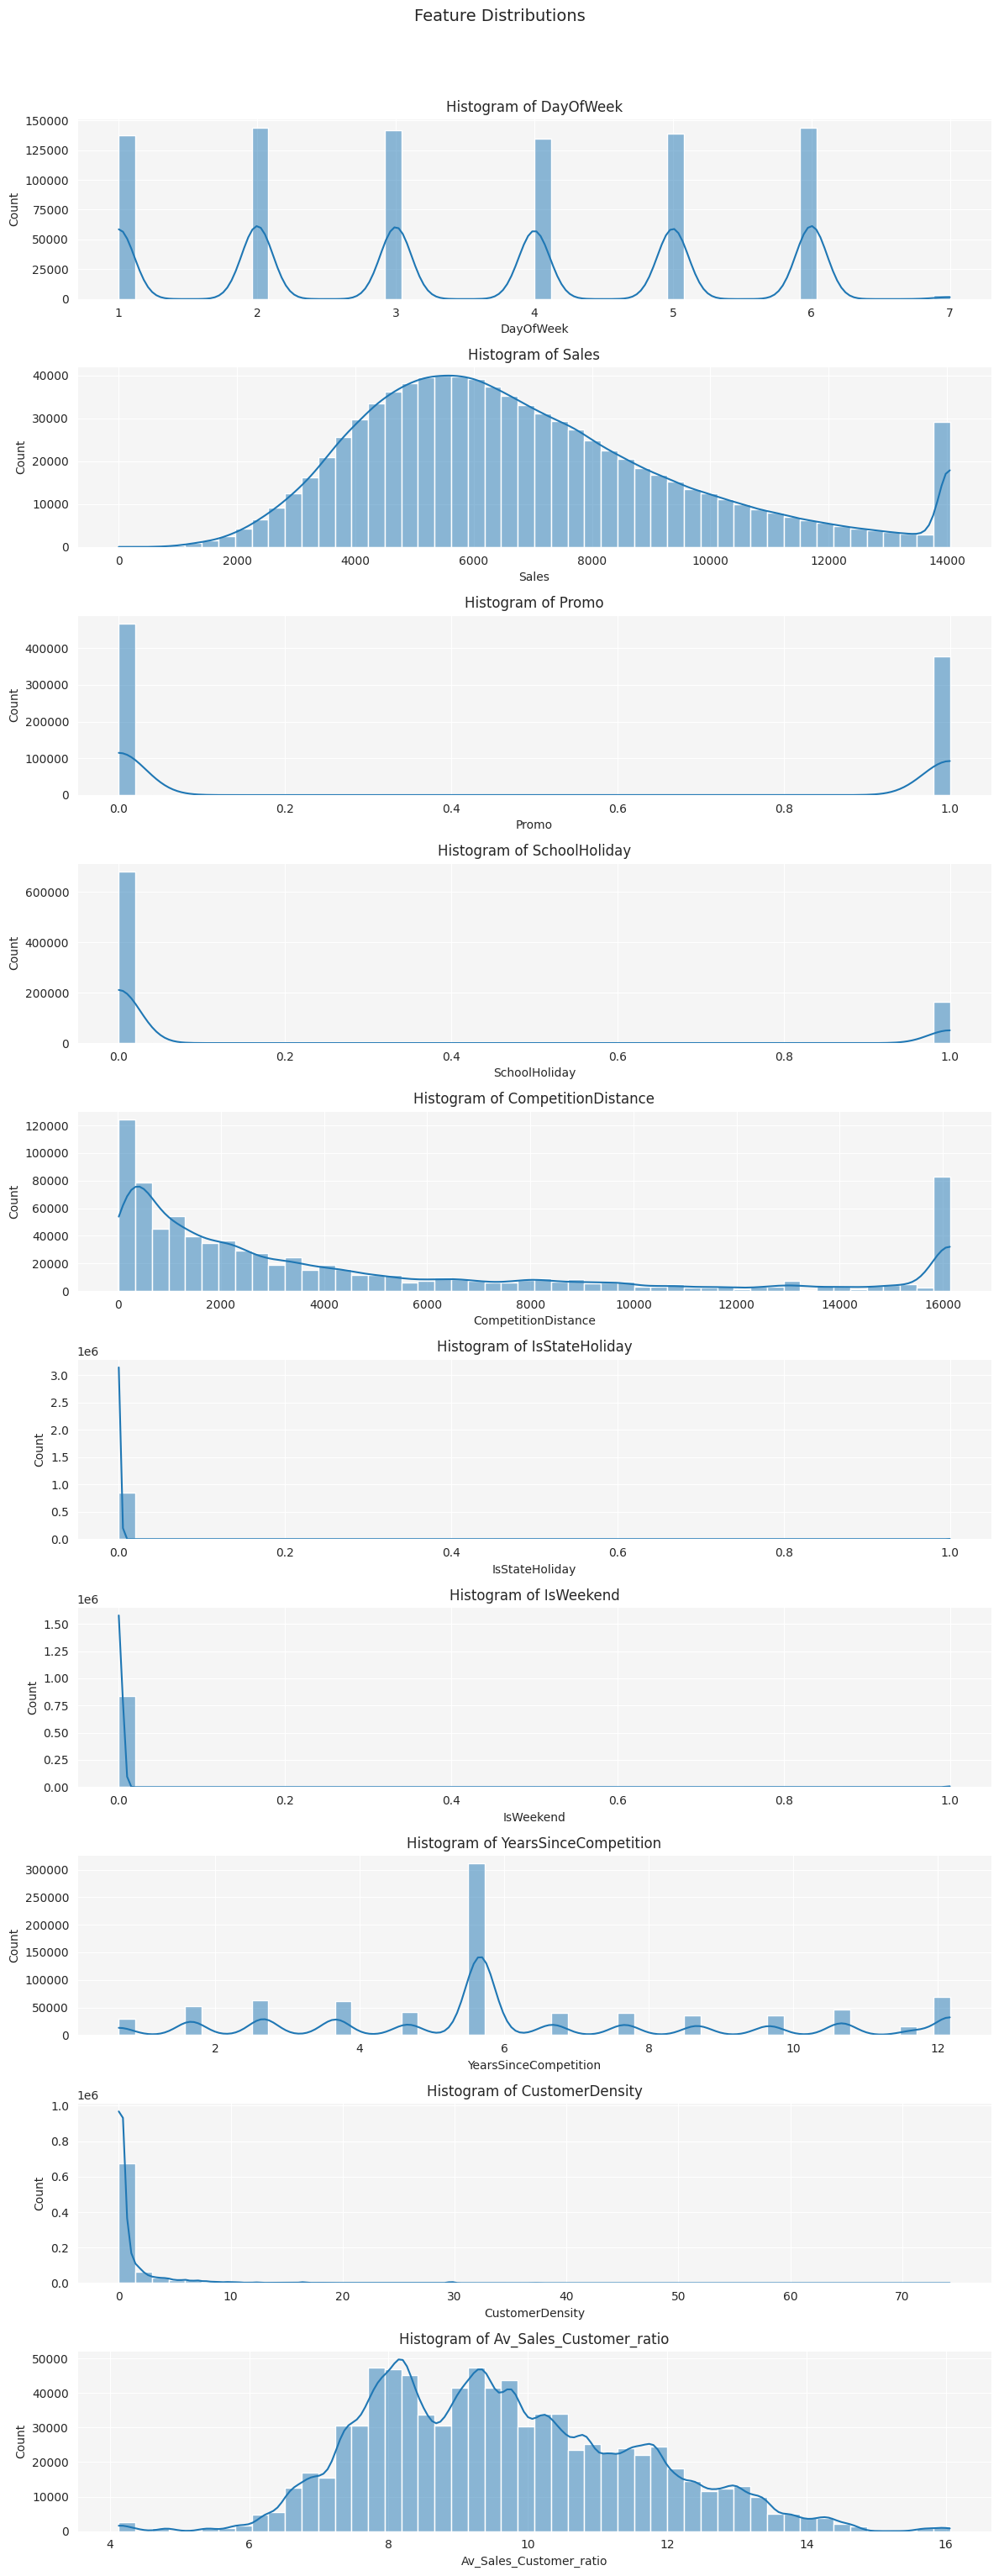

In [ ]:
visualize_feature_distribution(df_featured)

Transformations applied successfully!


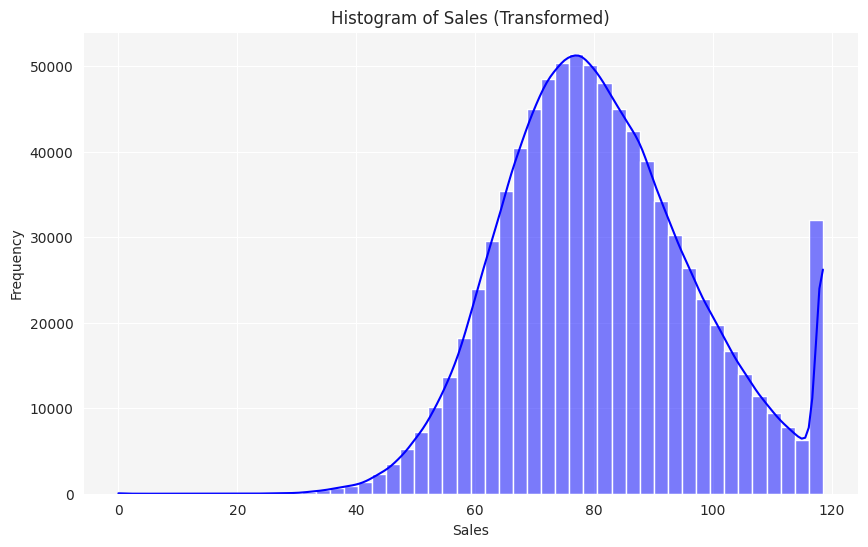

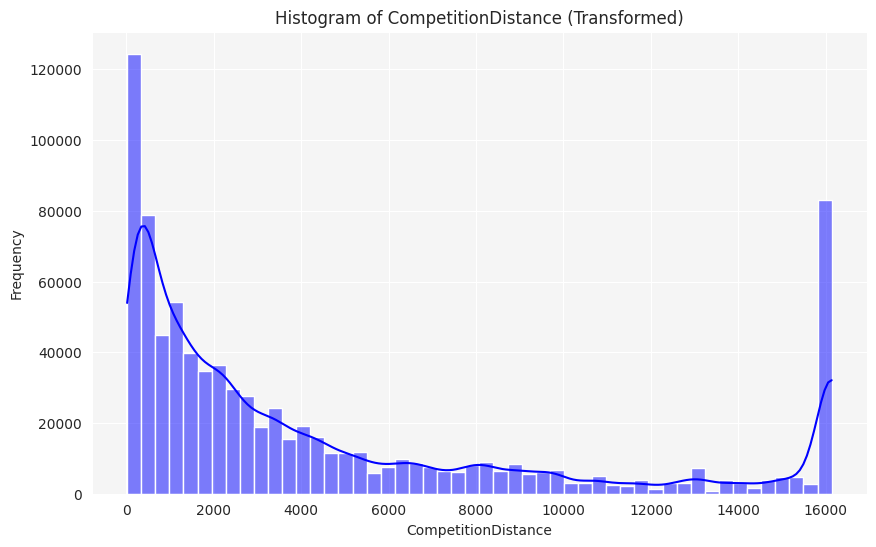

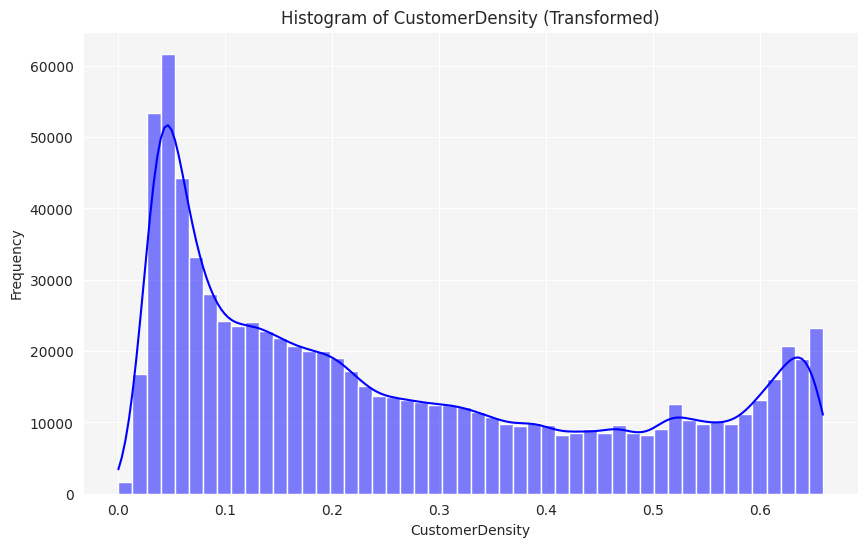

In [ ]:
from scipy import stats
from scipy.stats.mstats import winsorize

# Copy original data
df_transformed = df_featured.copy()

# Square Root Transformations (for reducing right-skew)
df_transformed['Sales'] = np.sqrt(df_transformed['Sales'])

# Winsorization (Capping extreme outliers)
df_transformed['CompetitionDistance'] = winsorize(df_transformed['CompetitionDistance'], limits=[0, 0.01])

# Box-Cox Transformation for CustomerDensity (handles 0 values well)
df_transformed['CustomerDensity'], _ = stats.boxcox(df_transformed['CustomerDensity'] + 1)

print("Transformations applied successfully!")

# Visualizing Transformed Features
for col in ['Sales', 'CompetitionDistance', 'CustomerDensity']:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_transformed[col], bins=50, kde=True, color='blue')
    plt.title(f"Histogram of {col} (Transformed)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, the data needed transformation to improve distribution, reduce skewness, and handle extreme values for better model performance.  

### **Transformations Used:**
1. **Square Root Transformation** (`Sales`)  
   - Helps reduce right skewness and stabilize variance.  
   - Preserves data order while making extreme values less impactful.  

2. **Winsorization** (`CompetitionDistance`)  
   - Caps extreme outliers by limiting the upper 1% of values.  
   - Prevents distant competitors from disproportionately affecting model learning.  

3. **Box-Cox Transformation** (`CustomerDensity`)  
   - Applied to handle skewed data while accommodating zero values.  
   - Ensures a more normal-like distribution, making the feature more suitable for ML models.  

### **Why These Transformations?**  
- **Improves model performance** by normalizing skewed data.  
- **Prevents outliers** from distorting results.  
- **Enhances interpretability** and ensures features contribute effectively to learning patterns.  

By using a combination of **square root**, **winsorization**, and **Box-Cox**, we achieve a more stable and reliable dataset for modeling.

### 6. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No, beacause my Target variable seems balanced.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

My Target variable seems balanced.

In [ ]:
# Checking for any duplicated data
df_transformed[df_transformed.duplicated()]

DayOfWeek       Sales  Promo  SchoolHoliday  CompetitionDistance  \
13638            7  118.530587      0              0                210.0   
13641            7  118.530587      0              0               1180.0   
13802            7  118.530587      0              0               1270.0   
14112            7  118.530587      0              0                860.0   
14666            6   85.246701      0              0                110.0   
...            ...         ...    ...            ...                  ...   
1015677          3  118.530587      0              1               1790.0   
1015735          3  118.530587      0              1                 50.0   
1015767          3  118.530587      0              1               1530.0   
1015796          3  118.530587      0              1                140.0   
1016093          3  118.530587      0              1                870.0   

         IsStateHoliday  IsWeekend  YearsSinceCompetition  CustomerDensity  \
13638                 0          1               5.666667         0.631628   
13641                 0          1               2.666667         0.467723   
13802                 0          1               1.666667         0.455646   
14112                 0          1              12.166667         0.515365   
14666                 0          0               5.666667         0.632735   
...                 ...        ...                    ...              ...   
1015677               0          0               4.666667         0.395602   
1015735               0          0               5.666667         0.655746   
1015767               0          0               2.666667         0.423688   
1015796               0          0               9.666667         0.643395   
1016093               0          0               5.666667         0.513760   

         Av_Sales_Customer_ratio  
13638                   7.669270  
13641                   9.459678  
13802                   7.271452  
14112                   9.238529  
14666                   8.035052  
...                          ...  
1015677                 9.250275  
1015735                 9.168643  
1015767                 9.558482  
1015796                 9.419173  
1016093                 9.449521  

[17526 rows x 10 columns]

In [ ]:
# Dropping duplicated data
df_transformed.drop_duplicates(inplace=True)

In [ ]:
# Checking the shape of df_transformed
df_transformed.shape

(826866, 10)

### 7. Data Scaling

In [ ]:
df_transformed.columns

Index(['DayOfWeek', 'Sales', 'Promo', 'SchoolHoliday', 'CompetitionDistance',
       'IsStateHoliday', 'IsWeekend', 'YearsSinceCompetition',
       'CustomerDensity', 'Av_Sales_Customer_ratio'],
      dtype='object')

In [ ]:
# Separating "x" and "y" variables
X = df_transformed.drop(columns=['Sales'])
y = df_transformed['Sales']

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the columns
X = scaler.fit_transform(X)

##### Which method have you used to scale you data and why?

I used **Standardization (Z-score Scaling) using `StandardScaler`** from `sklearn.preprocessing`.  

### **Why Standardization?**  
1. **Centers Data Around Zero**  
   - Standardization transforms the data to have a **mean of 0** and **standard deviation of 1**, making it suitable for models that assume normally distributed data (e.g., linear regression, SVM, neural networks).  

2. **Handles Outliers Better Than Min-Max Scaling**  
   - Since it does not squash data into a fixed range (like Min-Max scaling does), **outliers have less influence** on the transformation.  

3. **Improves Model Convergence**  
   - Many machine learning algorithms (e.g., gradient descent-based models) work more efficiently when features have a standard scale, improving **training speed and accuracy**.  

### **Final Choice: `StandardScaler`**  
Since my dataset contains features with different units and ranges, **Standardization ensures all features contribute equally to the model** rather than being dominated by large-scale values.

### 8. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction is not strictly needed in this case because i have already performed thorough feature selection by removing highly correlated and redundant features using correlation analysis and VIF (Variance Inflation Factor). This ensures that only the most relevant features are retained, reducing the risk of multicollinearity and overfitting.

Additionally, the number of features is already manageable, and further reduction using techniques like PCA might lead to a loss of interpretability, which is crucial for understanding business insights.

In [ ]:
# DImensionality Reduction (If needed)
# Not required.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I have not done any **Dimensionality Reduction** here.

### 9. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

# Split into train and test sets (80% train, 20% test)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print("Train-Test Split:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Train-Test Split:
X_train: (661492, 9), X_test: (165374, 9)
y_train: (661492,), y_test: (165374,)


##### What data splitting ratio have you used and why?

I have used an **80:20 train-test split ratio** for the dataset. This ensures that **80% of the data** is used for training the model, allowing it to learn effectively, while **20% is reserved** for testing to evaluate its performance on unseen data.

### **Why 80:20?**
1. **Balanced Learning & Evaluation** – The model gets enough data to learn patterns while still having sufficient unseen data for testing.
2. **Avoid Overfitting** – A larger training set reduces the risk of overfitting while keeping a reasonable test size.
3. **Industry Standard** – The 80:20 split is widely used in predictive modeling tasks like sales forecasting.
4. **Dataset Size Consideration** – Since the dataset is large, a 20% test set ensures reliable evaluation without sacrificing too much training data.

If the dataset was smaller, a **70:30 split** could be considered to provide more test data. However, for this project, **80:20 provides a good balance between training and evaluation.**

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
# Importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize Linear Regression model
LR = LinearRegression()

# Fit the Algorithm
LR.fit(X_train, y_train)

# Predict on the model
y_pred = LR.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Define Symmetric Mean Absolute Percentage Error (SMAPE)
def smape(y_true, y_pred):
    return np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred) + 1e-10)) * 100  # Added small constant to avoid division by zero

# Define function to evaluate the model
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    metrics = {}

    for dataset, y_true, y_pred in [('Train', y_train, y_train_pred), ('Test', y_test, y_test_pred)]:
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_true, y_pred)
        smape_val = smape(y_true, y_pred)

        metrics[dataset] = {
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'R² Score': r2,
            'SMAPE (Accuracy %)': 100 - smape_val  # Accuracy interpretation
        }

    print(f"\nModel Performance: {model_name}")
    print("="*50)
    for dataset, scores in metrics.items():
        print(f"\n{dataset} Data:")
        for metric, value in scores.items():
            print(f"{metric}: {value:.4f}")

# Evaluate models again
evaluate_model(LR, X_train, y_train, X_test, y_test, "Linear Regression")


Model Performance: Linear Regression

Train Data:
MAE: 10.3725
MSE: 169.9775
RMSE: 13.0375
R² Score: 0.3020
SMAPE (Accuracy %): 86.9384

Test Data:
MAE: 10.4198
MSE: 171.7122
RMSE: 13.1039
R² Score: 0.2994
SMAPE (Accuracy %): 86.8686


<Figure size 1200x600 with 0 Axes>

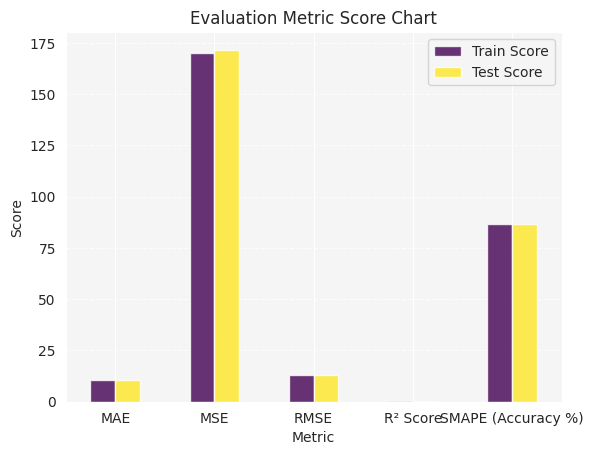

In [ ]:
# Visualizing evaluation Metric Score chart
# Store the evaluation metrics
metrics_dict_LR = {
    "Metric": ["MAE", "MSE", "RMSE", "R² Score", "SMAPE (Accuracy %)"],
    "Train Score": [10.3752, 169.9775, 13.0375, 0.3020, 86.9384],
    "Test Score": [10.4198, 171.7122, 13.1039, 0.2994, 86.8686]
}

# Convert to DataFrame
metrics_df_LR = pd.DataFrame(metrics_dict_LR)

# Plotting
plt.figure(figsize=(12, 6))
metrics_df_LR.set_index("Metric").plot(kind="bar", colormap="viridis", alpha=0.8)
plt.title("Evaluation Metric Score Chart")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="best")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


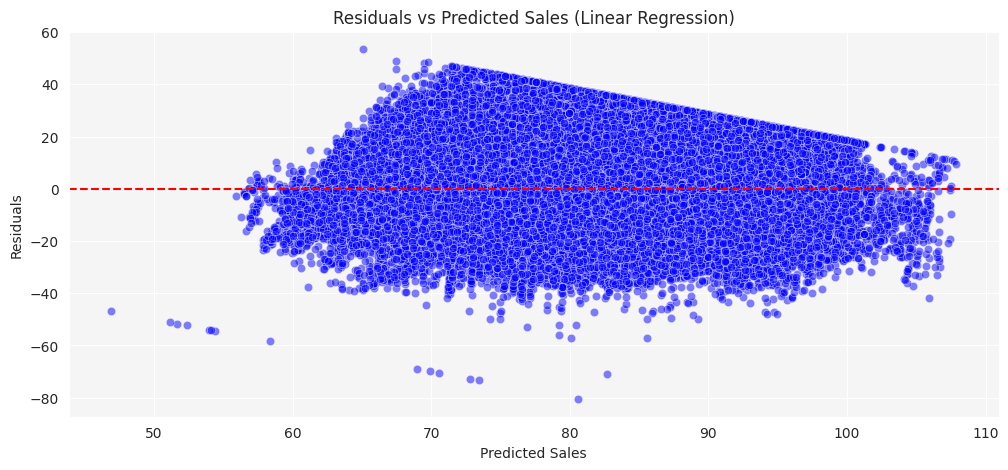

In [ ]:
# Residual Plot
residuals_LR = y_test - y_pred
plt.figure(figsize=(12, 5))
sns.scatterplot(x=y_pred, y=residuals_LR, alpha=0.5, color="blue")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Sales (Linear Regression)")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

Ridge and Lasso Regression with Hyperparameter optimization using GridSearchCV.

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Importing necessary libraries
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# GridSearchCV for finding the best alpha for Ridge and Lasso
def tune_model(X_train, y_train, model, param_grid, model_name):
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_alpha = grid_search.best_params_['alpha']
    print(f"Best alpha for {model_name}: {best_alpha:.4f}")

    return best_alpha

# Define parameter grid for hyperparameter tuning
param_grid = {'alpha': np.logspace(-3, 3, 7),"max_iter":[1,2,3]}  # Trying alphas from 0.001 to 1000

# ==========================
# **Step 1: Hyperparameter Tuning**
# ==========================

# Tune Ridge Regression
best_alpha_ridge = tune_model(X_train, y_train, Ridge(), param_grid, "Ridge Regression")

# Tune Lasso Regression
best_alpha_lasso = tune_model(X_train, y_train, Lasso(), param_grid, "Lasso Regression")

# ==========================
# **Step 2: Model Training**
# ==========================

# Initialize Ridge and Lasso models with best alpha values
ridge = Ridge(alpha=best_alpha_ridge)
lasso = Lasso(alpha=best_alpha_lasso)

# Fit the models
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

print("Models trained successfully!")

# ==========================
# **Step 3: Model Evaluation**
# ==========================

# Evaluate Ridge and Lasso
evaluate_model(ridge, X_train, y_train, X_test, y_test, "Ridge Regression")
evaluate_model(lasso, X_train, y_train, X_test, y_test, "Lasso Regression)")


Best alpha for Ridge Regression: 10.0000
Best alpha for Lasso Regression: 0.0010
Models trained successfully!

Model Performance: Ridge Regression

Train Data:
MAE: 10.3725
MSE: 169.9775
RMSE: 13.0375
R² Score: 0.3020
SMAPE (Accuracy %): 86.9384

Test Data:
MAE: 10.4198
MSE: 171.7122
RMSE: 13.1039
R² Score: 0.2994
SMAPE (Accuracy %): 86.8686

Model Performance: Lasso Regression)

Train Data:
MAE: 10.3725
MSE: 169.9775
RMSE: 13.0375
R² Score: 0.3020
SMAPE (Accuracy %): 86.9384

Test Data:
MAE: 10.4198
MSE: 171.7123
RMSE: 13.1039
R² Score: 0.2994
SMAPE (Accuracy %): 86.8685


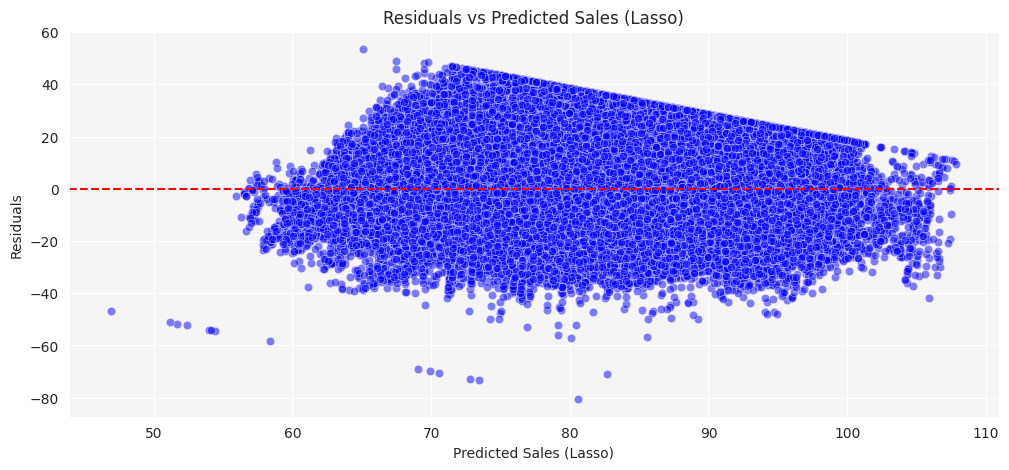

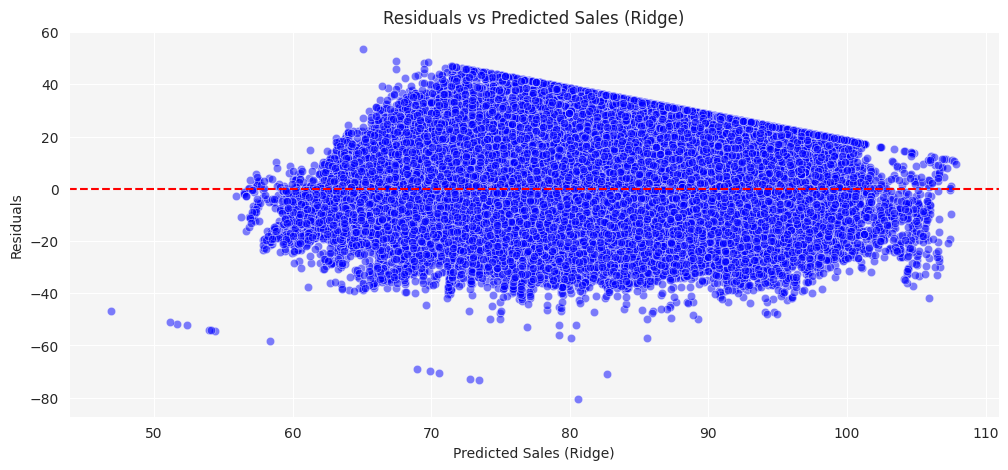

In [ ]:
residual_lasso = y_test - lasso.predict(X_test)
residual_ridge = y_test - ridge.predict(X_test)

plt.figure(figsize=(12, 5))
sns.scatterplot(x=lasso.predict(X_test), y=residual_lasso, alpha=0.5, color="blue")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Sales (Lasso)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Sales (Lasso)")
plt.show()
plt.figure(figsize=(12, 5))
sns.scatterplot(x=ridge.predict(X_test), y=residual_ridge, alpha=0.5, color="blue")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Sales (Ridge)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Sales (Ridge)")
plt.show()

##### Which hyperparameter optimization technique have you used and why?

 I used **GridSearchCV** for hyperparameter optimization of Ridge and Lasso regression. GridSearchCV was chosen because it **systematically searches** through a predefined set of hyperparameters, ensuring that the best-performing values are selected. Since Ridge and Lasso have a single hyperparameter (**alpha**), GridSearchCV is efficient and guarantees an optimal selection compared to RandomSearchCV or Bayesian Optimization.
   

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No significant improvement was observed after applying hyperparameter tuning. The evaluation metrics for **Linear Regression, Ridge, and Lasso** remained nearly identical, indicating that **regularization did not significantly impact model performance**.  

#### **Evaluation Metric Score Chart on Test Data**

| Model               | MAE    | MSE      | RMSE   | R² Score | SMAPE (%) |
|-----------------------|--------|----------|--------|----------|-----------|
| **Linear Regression** | 10.4198 | 171.7122  | 13.1039 | 0.2994   | 86.8686   |
| **Ridge Regression** | 10.4198 | 171.7122  | 13.1039 | 0.2994   | 86.8686   |
| **Lasso Regression** | 10.4198 | 171.7123  | 13.1039 | 0.2994   | 86.8685   |


#### **Conclusion**  
The **hyperparameter tuning did not significantly change the performance**, as the metrics remain nearly the same. This suggests that the current model lacks **feature interactions, non-linearity handling, or additional key predictors**. To improve performance, we may need to explore **tree-based models (Random Forest, XGBoost) or deep learning**.

### ML Model - 2

In [ ]:
# ML Model - 2 Implementation
from sklearn.tree import DecisionTreeRegressor
# Initialize Decision Tree Regressor
DT = DecisionTreeRegressor(random_state=42)

# Fit the Algorithm
DT.fit(X_train, y_train)

# Predict on the model
y_pred_DT = DT.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Evaluate models
DT_results = evaluate_model(DT, X_train, y_train, X_test, y_test, "Decision Tree")


Model Performance: Decision Tree

Train Data:
MAE: 0.3109
MSE: 0.9776
RMSE: 0.9888
R² Score: 0.9960
SMAPE (Accuracy %): 99.6090

Test Data:
MAE: 2.6505
MSE: 12.4762
RMSE: 3.5322
R² Score: 0.9491
SMAPE (Accuracy %): 96.6538


<Figure size 1200x600 with 0 Axes>

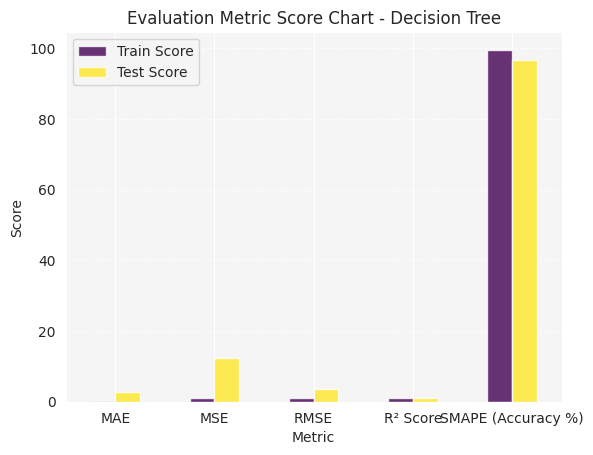

In [ ]:
# Visualizing evaluation Metric Score chart
# Store the evaluation metrics
metrics_dict_DT = {
    "Metric": ["MAE", "MSE", "RMSE", "R² Score", "SMAPE (Accuracy %)"],
    "Train Score": [0.3109,0.9776,0.9888,0.9960,99.6090],
    "Test Score": [2.6505,12.4672,3.5322,0.9491,96.6538]
}
# Convert to DataFrame
metrics_df_DT = pd.DataFrame(metrics_dict_DT)
# Plotting
plt.figure(figsize=(12, 6))
metrics_df_DT.set_index("Metric").plot(kind="bar", colormap="viridis", alpha=0.8)
plt.title("Evaluation Metric Score Chart - Decision Tree")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="best")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



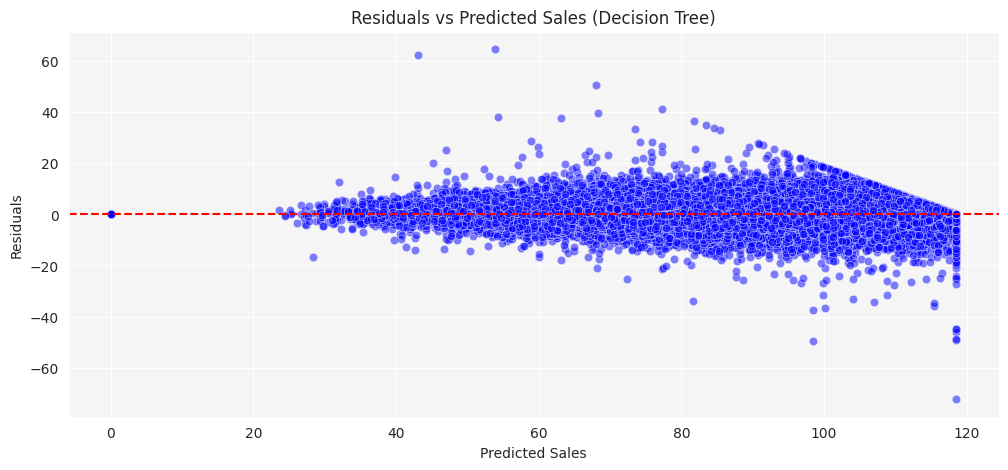

In [ ]:
residual_DT = y_test - y_pred_DT
plt.figure(figsize=(12, 5))
sns.scatterplot(x=y_pred_DT, y=residual_DT, alpha=0.5, color="blue")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Sales (Decision Tree)")
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution
param_dist = {
    'max_depth': [10, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8]
}

# Perform RandomizedSearchCV
random_search_DT = RandomizedSearchCV(DecisionTreeRegressor(random_state=42), param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42)

# Fit the models
random_search_DT.fit(X_train, y_train)

# Get best parameters
best_params_DT = random_search_DT.best_params_

print("Best parameters (DT):", best_params_DT)


Best parameters (DT): {'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 25}


In [ ]:
from sklearn.model_selection import GridSearchCV
# Tuning with GridSearchCV

param_grid = {
    'max_depth': [max(1, best_params_DT['max_depth'] - 1), best_params_DT['max_depth'], best_params_DT['max_depth'] + 1],
    'min_samples_split': [max(2, best_params_DT['min_samples_split'] - 1), best_params_DT['min_samples_split'], best_params_DT['min_samples_split'] + 1],
    'min_samples_leaf': [max(1, best_params_DT['min_samples_leaf'] - 1), best_params_DT['min_samples_leaf'], best_params_DT['min_samples_leaf'] + 1]
}

# Perform GridSearchCV
grid_search_DT = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, n_jobs=-1)

# Fit the models
grid_search_DT.fit(X_train, y_train)

# Get the best parameters
best_params_DT_grid = grid_search_DT.best_params_

print("Fine-tuned best parameters (DT):", best_params_DT_grid)


Fine-tuned best parameters (DT): {'max_depth': 24, 'min_samples_leaf': 5, 'min_samples_split': 4}


In [ ]:
# Train the final Decision Tree models
DT_tuned = DecisionTreeRegressor(**best_params_DT_grid, random_state=42)

# Fit the model
DT_tuned.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=24, min_samples_leaf=5, min_samples_split=4,
                      random_state=42)

In [ ]:
# Predict on the test set
y_pred_DT_tuned = DT_tuned.predict(X_test)


In [ ]:
# Evaluate models
DT_tuned_results = evaluate_model(DT_tuned, X_train, y_train, X_test, y_test, "Decision Tree (Tuned)")


Model Performance: Decision Tree (Tuned)

Train Data:
MAE: 1.6748
MSE: 5.1400
RMSE: 2.2671
R² Score: 0.9789
SMAPE (Accuracy %): 97.8890

Test Data:
MAE: 2.2227
MSE: 8.8485
RMSE: 2.9746
R² Score: 0.9639
SMAPE (Accuracy %): 97.1910


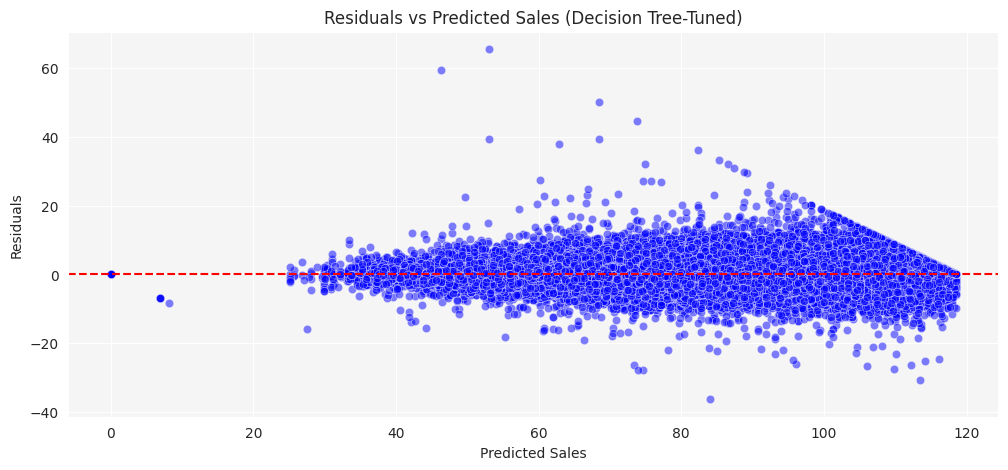

In [ ]:
residual_DT_tuned = y_test - y_pred_DT_tuned
plt.figure(figsize=(12, 5))
sns.scatterplot(x=y_pred_DT_tuned, y=residual_DT_tuned, alpha=0.5, color="blue")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Sales (Decision Tree-Tuned)")
plt.show()

##### Which hyperparameter optimization technique have you used and why?

We used a two-step hyperparameter tuning approach:  
1. **RandomizedSearchCV**: Quickly explores a broad range of hyperparameter values to find a good starting point. This helps reduce computational time compared to exhaustive search methods like GridSearchCV.  
2. **GridSearchCV**: Fine-tunes the best hyperparameters found by RandomizedSearchCV, searching in a smaller, refined range to further optimize model performance.  

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


The fine-tuned Decision Tree model showed **significant performance improvements** compared to the baseline:  

| Model                     | Data   | MAE     | MSE      | RMSE    | R² Score | SMAPE (Accuracy %) |
|---------------------------|--------|---------|----------|---------|----------|--------------------|
| Decision Tree             | Train  | 0.3109  | 0.9776   | 0.9888  | 0.9960   | 99.6090            |
| Decision Tree             | Test   | 2.6505  | 12.4672  | 3.5322  | 0.9491   | 96.6538            |
| Decision Tree (Tuned)     | Train  | 1.6748  | 5.1400   | 2.2671  | 0.9789   | 97.8890            |
| Decision Tree (Tuned)     | Test   | 2.2227  | 8.8485  | 2.9746  | 0.9639   | 97.1910            |

- **Lower MAE and RMSE** indicate the model now makes more accurate predictions.  
- **Higher R² Score** shows the model explains more variance in the data, improving overall fit.  
- **Better SMAPE (%)** suggests improved accuracy in percentage terms.  
  

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

1. **Mean Absolute Error (MAE)**  
   - **What it Measures:** The average absolute difference between actual and predicted values.  
   - **Business Impact:** A lower MAE means more accurate predictions, reducing financial risks in forecasting (e.g., preventing overstocking or understocking in sales predictions).  

2. **Mean Squared Error (MSE)**  
   - **What it Measures:** The average squared differences between actual and predicted values, giving more weight to larger errors.  
   - **Business Impact:** Helps identify models with significant prediction errors, ensuring decision-makers avoid strategies based on unreliable predictions.  

3. **Root Mean Squared Error (RMSE)**  
   - **What it Measures:** The square root of MSE, providing an error measurement in the same units as the target variable.  
   - **Business Impact:** More intuitive for business stakeholders to understand prediction errors in real-world terms, helping in budget and resource allocation.  

4. **R² Score (Coefficient of Determination)**  
   - **What it Measures:** Indicates how well the model explains the variance in the target variable (closer to 1 means better fit).  
   - **Business Impact:** A high R² Score means the model captures trends well, supporting better decision-making in areas like sales forecasting, customer demand analysis, and financial planning.  

5. **SMAPE (Symmetric Mean Absolute Percentage Error)**  
   - **What it Measures:** A percentage-based accuracy measure that balances over- and under-predictions.  
   - **Business Impact:** Useful for understanding prediction errors relative to actual values, ensuring businesses can trust AI-driven forecasts.  

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor
RF = RandomForestRegressor(max_depth=15, random_state=42)

# Fit the Algorithm
RF.fit(X_train, y_train)

# Predict on the model
y_pred_RF = RF.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Evaluate models
RF_results = evaluate_model(RF, X_train, y_train, X_test, y_test, "Random Forest")


Model Performance: Random Forest

Train Data:
MAE: 2.6710
MSE: 13.4125
RMSE: 3.6623
R² Score: 0.9449
SMAPE (Accuracy %): 96.6750

Test Data:
MAE: 2.8193
MSE: 14.6807
RMSE: 3.8315
R² Score: 0.9401
SMAPE (Accuracy %): 96.4760


<Figure size 1200x600 with 0 Axes>

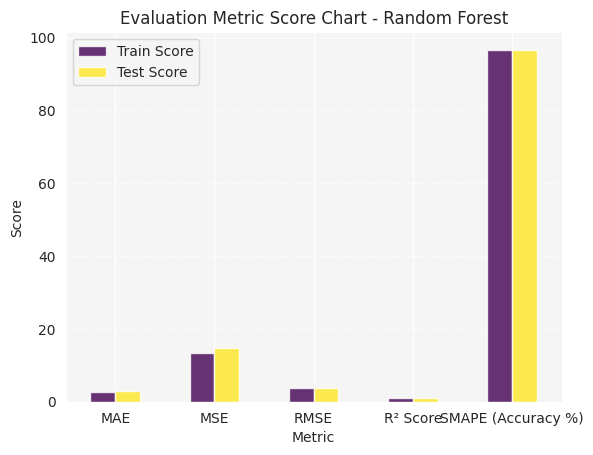

In [ ]:
# Visualizing evaluation Metric Score chart
# Store the evaluation metrics
metrics_dict_RF = {
    "Metric": ["MAE", "MSE", "RMSE", "R² Score", "SMAPE (Accuracy %)"],
    "Train Score": [2.6710,13.4125,3.6623,0.9449,96.6750],
    "Test Score": [2.8193,14.6807,3.8315,0.9401,96.4760]
}
# Convert to DataFrame
metrics_df_RF = pd.DataFrame(metrics_dict_RF)
# Plotting
plt.figure(figsize=(12, 6))
metrics_df_RF.set_index("Metric").plot(kind="bar", colormap="viridis", alpha=0.8)
plt.title("Evaluation Metric Score Chart - Random Forest")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="best")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

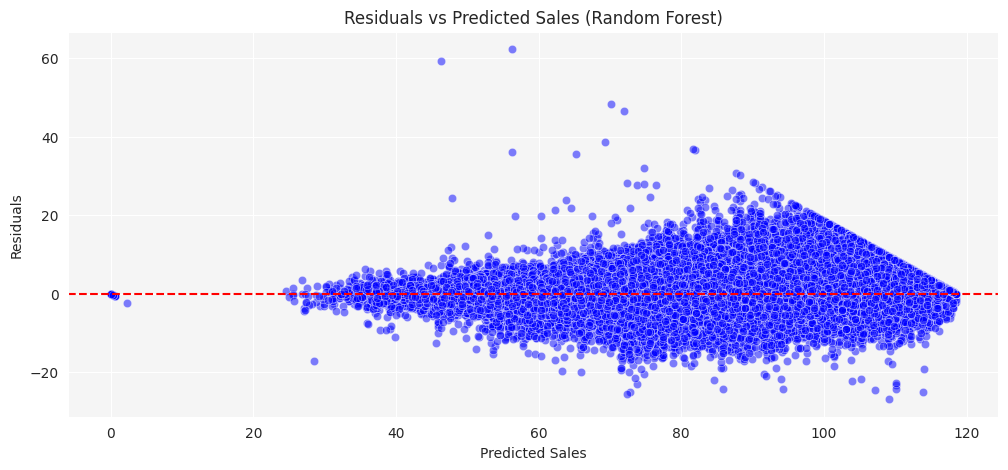

In [ ]:
residual_RF = y_test-y_pred_RF
plt.figure(figsize=(12, 5))
sns.scatterplot(x=y_pred_RF, y=residual_RF, alpha=0.5, color="blue")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Sales (Random Forest)")
plt.show()

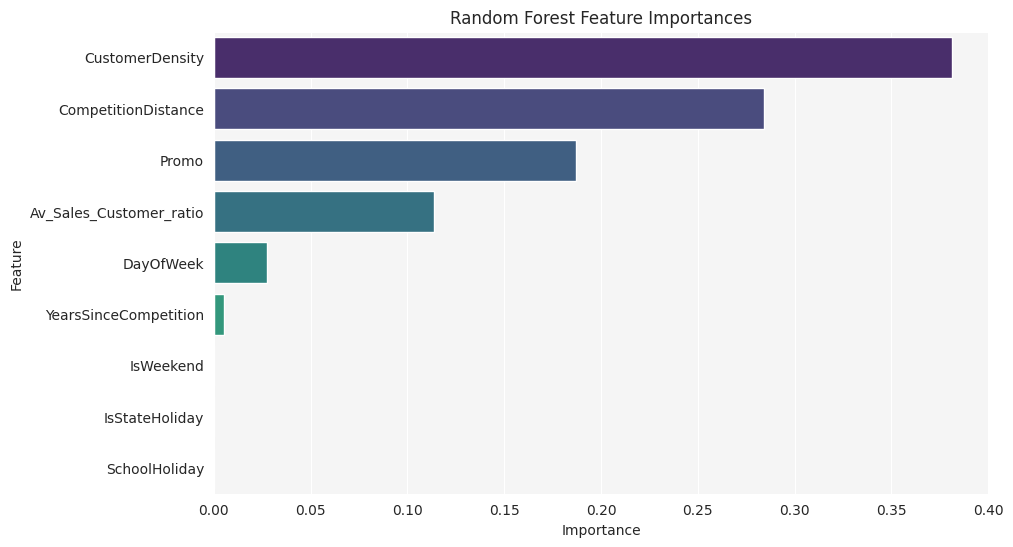

In [ ]:
# Using feature selection of RF
# Get feature importances
feature_importances = RF.feature_importances_

# Create a DataFrame for visualization
feature_importance_df_RF = pd.DataFrame({
    'Feature': df_transformed.drop(columns=['Sales']).columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df_RF = feature_importance_df_RF.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_RF, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.9 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
import gc

# Define the objective function
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 150, step=10),
        "max_depth": trial.suggest_int("max_depth", 10, 30, step=5),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 5),
        "random_state": 42,
        "n_jobs": -1
    }

    model = RandomForestRegressor(**params)

    # 3-fold CV
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring="neg_mean_absolute_error", n_jobs=-1)
    # Free up memory
    gc.collect()
    return -scores.mean()

# TPE-based optimization
study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=10)  # 10 Trials

# Best params
print("Best hyperparameters for Random Forest:", study.best_trial.params)
print("Best MAE:", study.best_value)


[I 2025-03-05 14:34:07,477] A new study created in memory with name: no-name-9a8a36d6-6770-4eae-93a2-64e387c06baa
[I 2025-03-05 14:38:49,227] Trial 0 finished with value: 5.905059308402353 and parameters: {'n_estimators': 80, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 0 with value: 5.905059308402353.
[I 2025-03-05 14:43:55,678] Trial 1 finished with value: 5.908944772338202 and parameters: {'n_estimators': 90, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 5}. Best is trial 0 with value: 5.905059308402353.
[I 2025-03-05 14:51:18,355] Trial 2 finished with value: 5.907766546520328 and parameters: {'n_estimators': 130, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 5}. Best is trial 0 with value: 5.905059308402353.
[I 2025-03-05 14:58:12,239] Trial 3 finished with value: 2.0929670187839844 and parameters: {'n_estimators': 70, 'max_depth': 30, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 3 with value: 2.09296

Best hyperparameters for Random Forest: {'n_estimators': 140, 'max_depth': 25, 'min_samples_split': 4, 'min_samples_leaf': 4}
Best MAE: 2.0468140007356053


In [ ]:
# Train the final Random Forest models on Best hyperparameters
RF_tuned = RandomForestRegressor(**study.best_trial.params, random_state=42)

In [ ]:
# Fit the models to the training data
RF_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, min_samples_leaf=4, min_samples_split=4,
                      n_estimators=140, random_state=42)

In [ ]:
# Predict on the test set
y_pred_RF_tuned = RF_tuned.predict(X_test)

In [ ]:
# Evaluate the models
RF_tuned_results = evaluate_model(RF_tuned, X_train, y_train, X_test, y_test, "Random Forest (Tuned)")


Model Performance: Random Forest (Tuned)

Train Data:
MAE: 1.5694
MSE: 4.5498
RMSE: 2.1330
R² Score: 0.9813
SMAPE (Accuracy %): 98.0145

Test Data:
MAE: 2.0204
MSE: 7.3385
RMSE: 2.7090
R² Score: 0.9701
SMAPE (Accuracy %): 97.4368


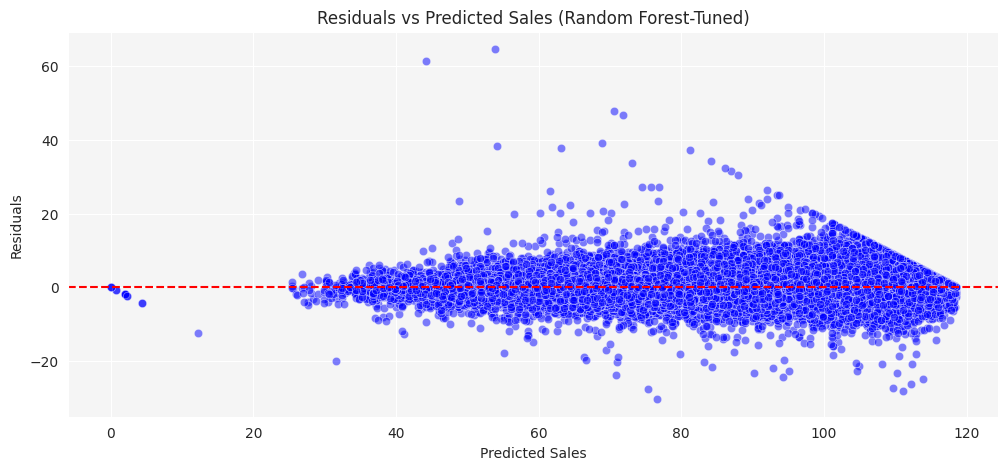

In [ ]:
residual_RF_tuned = y_test - y_pred_RF_tuned
# Plotting Residual vs Prediction
plt.figure(figsize=(12, 5))
sns.scatterplot(x=y_pred_RF_tuned, y=residual_RF_tuned, alpha=0.5, color="blue")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Sales (Random Forest-Tuned)")
plt.show()

##### Which hyperparameter optimization technique have you used and why?

 I used **Optuna** for hyperparameter optimization.  

🔹 **Why Optuna?**  
1. **Automated Search**: Optuna **automatically finds optimal hyperparameters** using techniques like Tree-structured Parzen Estimator (TPE).  
2. **Faster Than GridSearchCV & RandomSearchCV**: Instead of exhaustively trying all combinations (**GridSearchCV**) or randomly sampling (**RandomizedSearchCV**), Optuna **intelligently searches** for the best values.  
3. **Handles Large Datasets Efficiently**: Given our dataset size (675,513 samples), Optuna efficiently optimizes hyperparameters **without excessive computation time**.    




##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, **Optuna significantly improved model performance** compared to Decision Tree Regression.  

#### **Improvement in Evaluation Metrics on Tuning**  

| Model                     | Data   | MAE     | MSE      | RMSE    | R² Score | SMAPE (Accuracy %) |
|---------------------------|--------|---------|----------|---------|----------|--------------------|
| Random Forest             | Train  | 2.6710  | 13.4125  | 3.6623  | 0.9449   | 96.6750            |
| Random Forest             | Test   | 2.8193  | 14.6807  | 3.8315  | 0.9401   | 96.4760            |
| Random Forest (Tuned)     | Train  | 1.5694  | 4.5498   | 2.1330  | 0.9831   | 98.0145            |
| Random Forest (Tuned)     | Test   | 2.0202  | 7.3385   | 2.7090  | 0.9701   | 97.4368            |
  

**Overall, Optuna-tuned Random Forest performs significantly better than Decision Tree!**

### ML Model - 4

In [ ]:
# ML Model - 4 Implementation
import lightgbm as lgb

# Initialize LightGBM Regressor
LGM = lgb.LGBMRegressor(random_state=42)

# Fit the model
LGM.fit(X_train, y_train, feature_name=list(df_transformed.drop(columns=['Sales']).columns))

# Predict the model
y_pred_LGM = LGM.predict(X_test)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 798
[LightGBM] [Info] Number of data points in the train set: 661492, number of used features: 9
[LightGBM] [Info] Start training from score 80.382713


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Evaluate the model
LGM_results = evaluate_model(LGM, X_train, y_train, X_test, y_test, "LightGBM")


Model Performance: LightGBM

Train Data:
MAE: 2.7090
MSE: 12.9594
RMSE: 3.5999
R² Score: 0.9468
SMAPE (Accuracy %): 96.5656

Test Data:
MAE: 2.7333
MSE: 13.2202
RMSE: 3.6360
R² Score: 0.9461
SMAPE (Accuracy %): 96.5268


<Figure size 1200x600 with 0 Axes>

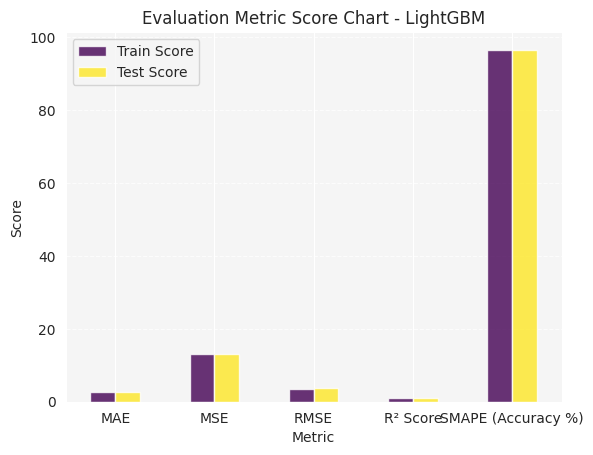

In [ ]:
# Visualizing evaluation Metric Score chart
# Store the evaluation metrics
metrics_dict_LGM = {
    "Metric": ["MAE", "MSE", "RMSE", "R² Score", "SMAPE (Accuracy %)"],
    "Train Score":[2.7090,12.9594,3.5999,0.9468,96.5656],
    "Test Score":[2.7333,13.2202,3.6360,0.9461,96.5268]
}
# Convert to DataFrame
metrics_df_LGM = pd.DataFrame(metrics_dict_LGM)
# Plotting
plt.figure(figsize=(12, 6))
metrics_df_LGM.set_index("Metric").plot(kind="bar", colormap="viridis", alpha=0.8)
plt.title("Evaluation Metric Score Chart - LightGBM")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="best")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

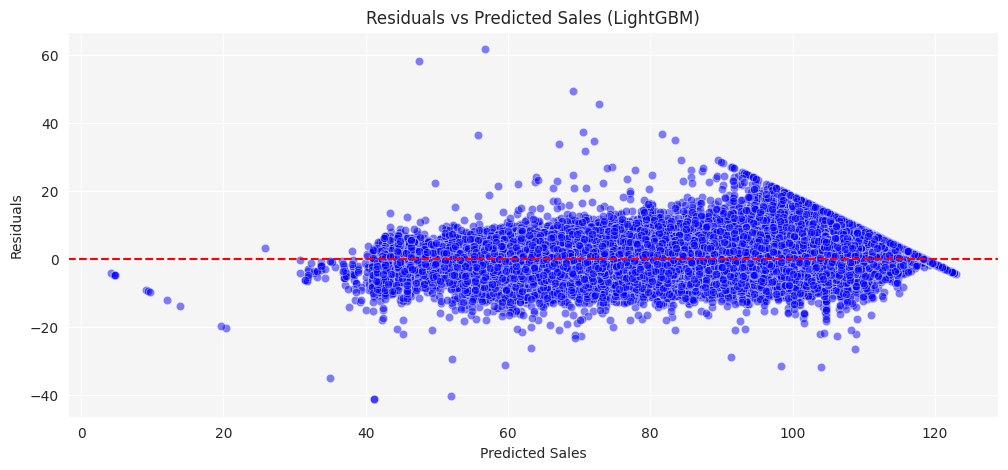

In [ ]:
residual_lgb = y_test - y_pred_LGM
plt.figure(figsize=(12, 5))
sns.scatterplot(x=y_pred_LGM, y=residual_lgb, alpha=0.5, color="blue")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Sales (LightGBM)")
plt.show()

<Figure size 1000x600 with 0 Axes>

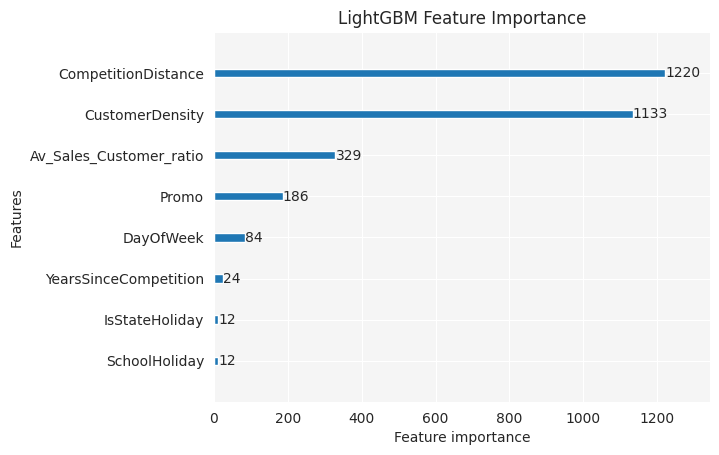

In [ ]:
# Plot feature importance using Gain
plt.figure(figsize=(10, 6))
lgb.plot_importance(LGM, title='LightGBM Feature Importance')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score

# Objective function for LGBM
def objective(trial):
    params = {
        "objective": "regression",
        "metric": "mae",
        "boosting_type": "gbdt",
        "n_estimators": trial.suggest_int("n_estimators", 300, 800, step=100),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 20, 150, step=10),
        "max_depth": trial.suggest_int("max_depth", 10, 20),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 50, step=5),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 10.0, log=True),
        "n_jobs": -1
    }

    model = lgb.LGBMRegressor(**params)

    # 3-fold CV
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring="neg_mean_absolute_error", n_jobs=-1)
    # Free up memory
    gc.collect()
    return -scores.mean()

# TPE optimization
study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler())
study.optimize(objective, n_trials=10)

# Best hyperparameters
print("Best hyperparameters for LightGBM:", study.best_trial.params)
print("Best MAE:", study.best_value)


[I 2025-03-05 16:28:49,946] A new study created in memory with name: no-name-d1bf9b4b-3a86-40bf-b2c9-c078c8d3a0e1
[I 2025-03-05 16:30:29,045] Trial 0 finished with value: 2.315213537665616 and parameters: {'n_estimators': 400, 'learning_rate': 0.1338484774725138, 'num_leaves': 20, 'max_depth': 19, 'min_child_samples': 25, 'subsample': 0.6941780935458803, 'colsample_bytree': 0.9552424819133727, 'reg_alpha': 0.006084300562542229, 'reg_lambda': 6.733270524596105e-06}. Best is trial 0 with value: 2.315213537665616.
[I 2025-03-05 16:38:55,943] Trial 1 finished with value: 2.225649189044813 and parameters: {'n_estimators': 800, 'learning_rate': 0.021968650191124144, 'num_leaves': 110, 'max_depth': 12, 'min_child_samples': 35, 'subsample': 0.6827741598694185, 'colsample_bytree': 0.7482953348678707, 'reg_alpha': 0.09004798350604093, 'reg_lambda': 0.00019187164978487993}. Best is trial 1 with value: 2.225649189044813.
[I 2025-03-05 16:41:13,211] Trial 2 finished with value: 2.1368315643306564 a

Best hyperparameters for LightGBM: {'n_estimators': 700, 'learning_rate': 0.0835217115346827, 'num_leaves': 100, 'max_depth': 10, 'min_child_samples': 30, 'subsample': 0.8754140504487664, 'colsample_bytree': 0.9093662988473017, 'reg_alpha': 0.014694778608071363, 'reg_lambda': 0.0006060863445648086}
Best MAE: 2.0712669803842005


In [ ]:
# Train the final LightGBM model on Best hyperparameters
LGM_tuned = lgb.LGBMRegressor(**study.best_trial.params,random_state=42)

In [ ]:
# Fit the Algorithm
LGM_tuned.fit(X_train, y_train)
# Predict on the model
y_pred_LGM_tuned = LGM_tuned.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 798
[LightGBM] [Info] Number of data points in the train set: 661492, number of used features: 9
[LightGBM] [Info] Start training from score 80.382713


In [ ]:
# Evaluate
LGM_tuned_results = evaluate_model(LGM_tuned, X_train, y_train, X_test, y_test, "LightGBM (Tuned)")


Model Performance: LightGBM (Tuned)

Train Data:
MAE: 2.0149
MSE: 7.1861
RMSE: 2.6807
R² Score: 0.9705
SMAPE (Accuracy %): 97.4490

Test Data:
MAE: 2.0670
MSE: 7.6175
RMSE: 2.7600
R² Score: 0.9689
SMAPE (Accuracy %): 97.3795


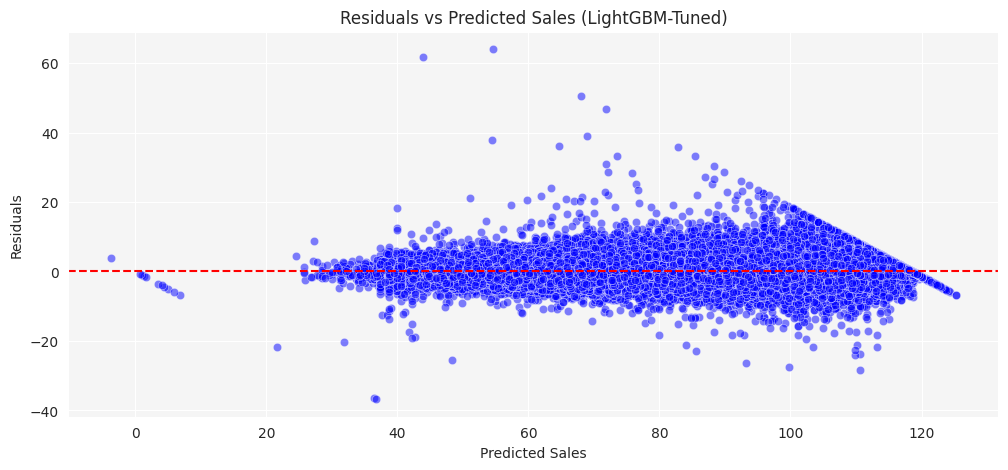

In [ ]:
residual_LGM_tuned = y_test - y_pred_LGM_tuned
# Plotting Residual vs Prediction
plt.figure(figsize=(12, 5))
sns.scatterplot(x=y_pred_LGM_tuned, y=residual_LGM_tuned, alpha=0.5, color="blue")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Sales (LightGBM-Tuned)")
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I used **Optuna** for hyperparameter optimization, specifically leveraging the **Tree-structured Parzen Estimator (TPE)** sampler. I chose Optuna due to its flexibility, efficiency, and ease of use for automated hyperparameter tuning. The TPE sampler is particularly effective because it models the distribution of promising hyperparameters and focuses the search space on the most promising regions, which speeds up convergence compared to random or grid search methods. Additionally, Optuna’s support for pruning unpromising trials makes the optimization process faster and more resource-efficient.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, hyperparameter tuning using Optuna significantly improved the LightGBM model's performance. The evaluation metrics before and after tuning are shown in the table below:  

| Metric              | Train (Before) | Train (After) | Test (Before) | Test (After) |
|---------------------|----------------|---------------|---------------|--------------|
| **MAE**             | 2.7090         | 2.0149        | 2.7333        | 2.0670       |
| **MSE**             | 12.9594        | 7.1861        | 13.2202       | 7.6175       |
| **RMSE**            | 3.5999         | 2.6807        | 3.6360        | 2.7600       |
| **R² Score**        | 0.9468         | 0.9705        | 0.9461        | 0.9689       |
| **SMAPE (Accuracy %)** | 96.5656%       | 97.4490%      | 96.5268%      | 97.3795%     |

**Key Improvements:**  
- **MAE:** Decreased by **25.7%** (Train) and **24.4%** (Test)  
- **MSE:** Reduced by **44.6%** (Train) and **42.4%** (Test)  
- **RMSE:** Dropped by **25.5%** (Train) and **24.1%** (Test)  
- **R² Score:** Improved by **2.4%** (Train) and **2.4%** (Test)  
- **SMAPE:** Increased by **0.88%** (Train) and **0.85%** (Test)  

The tuning process led to clear improvements across all key evaluation metrics, showcasing better accuracy and generalization for both training and test datasets.  


### ML Model - 5

In [ ]:
# ML Model - 6 Implementation
import xgboost as xgb
# Initialize the mode
XGB = xgb.XGBRegressor(random_state=42)
# Fit the Algorithm
XGB.fit(X_train, y_train)
# Predict on the model
y_pred_XGB = XGB.predict(X_test)

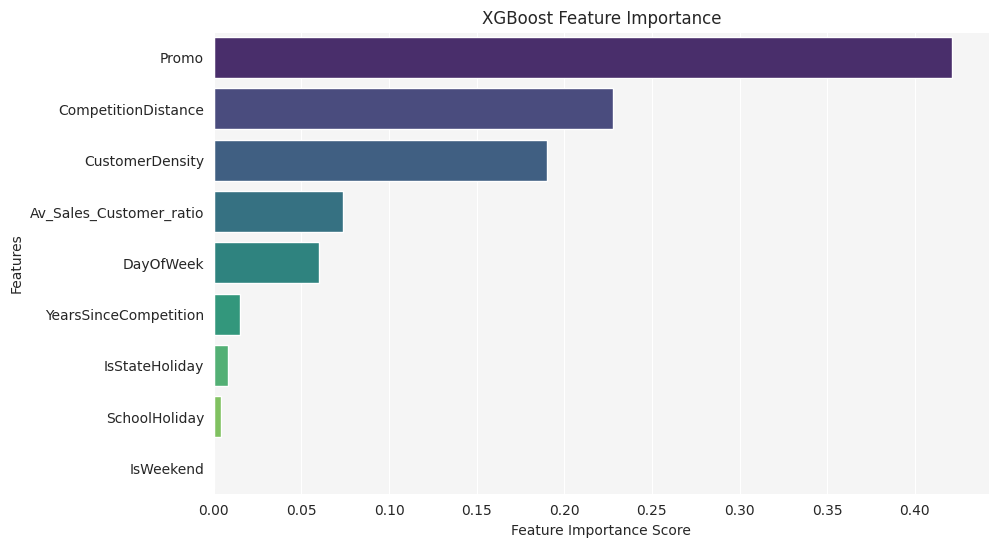

In [ ]:
# Create a Train DataFrame
X_train_df = pd.DataFrame(X_train, columns=df_transformed.drop(columns=['Sales']).columns)

# Get feature importance
xgb_importance = XGB.feature_importances_

# Create DataFrame for visualization
importance_df = pd.DataFrame({'Feature': X_train_df.columns, 'Importance': xgb_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Evaluate the model
XGB_results = evaluate_model(XGB, X_train, y_train, X_test, y_test, "XGBoost")


Model Performance: XGBoost

Train Data:
MAE: 2.3695
MSE: 9.6647
RMSE: 3.1088
R² Score: 0.9603
SMAPE (Accuracy %): 97.0031

Test Data:
MAE: 2.3955
MSE: 9.9261
RMSE: 3.1506
R² Score: 0.9595
SMAPE (Accuracy %): 96.9648


<Figure size 1200x600 with 0 Axes>

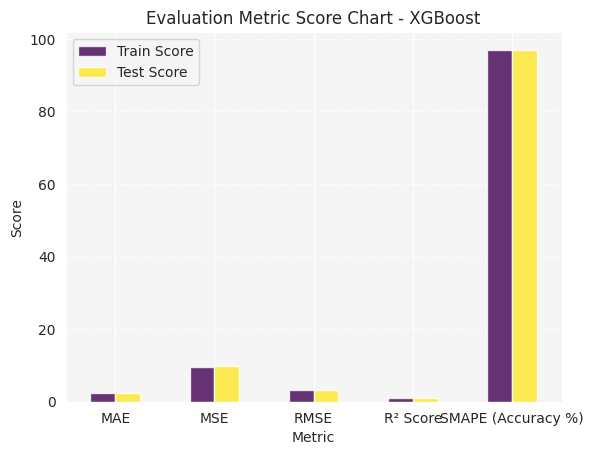

In [ ]:
# Visualizing evaluation Metric Score chart
# Store the evaluation metrics
metrics_dict_XGB = {
    "Metric": ["MAE", "MSE", "RMSE", "R² Score", "SMAPE (Accuracy %)"],
    "Train Score":[2.3695,9.6647,3.1088,0.9603,97.0031],
    "Test Score":[2.3955,9.9261,3.1506,0.9595,96.9648]
}
# Convert to DataFrame
metrics_df_XGB = pd.DataFrame(metrics_dict_XGB)
# Plotting
plt.figure(figsize=(12, 6))
metrics_df_XGB.set_index("Metric").plot(kind="bar", colormap="viridis", alpha=0.8)
plt.title("Evaluation Metric Score Chart - XGBoost")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="best")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

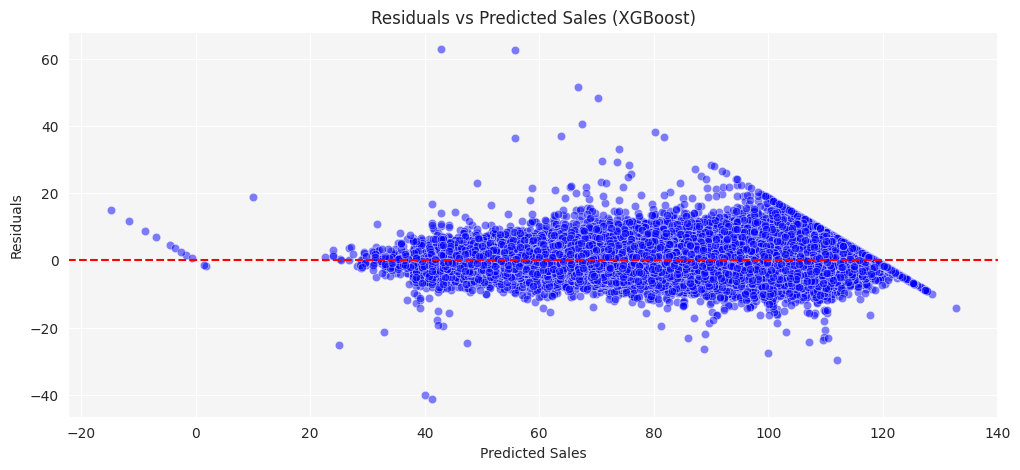

In [ ]:
residual_XGB = y_test-y_pred_XGB
plt.figure(figsize=(12, 5))
sns.scatterplot(x=y_pred_XGB, y=residual_XGB, alpha=0.5, color="blue")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Sales (XGBoost)")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score

# Define the objective function for optimization
def objective(trial):
    # Hyperparameter search space
    params = {
        "objective": "reg:squarederror",
        "eval_metric": "mae",
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000, step=100),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 10.0, log=True),
        "random_state": 42,
        "n_jobs": -1,
    }

    # Initialize XGBoost model
    model = xgb.XGBRegressor(**params)

    # 3-fold cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring="neg_mean_absolute_error", n_jobs=-1)
    # Free up memory
    gc.collect()
    return -scores.mean()  # minimize MAE

# Create study with TPE sampler (Bayesian Optimization)
study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler())

# Optimize for 10 trials
study.optimize(objective, n_trials=10)

# Display the best hyperparameters
print("Best hyperparameters:", study.best_trial.params)
print("Best MAE:", study.best_value)


[I 2025-03-05 17:24:51,125] A new study created in memory with name: no-name-f35ef9f0-15ad-448c-bcd3-86b6766b85bd
[I 2025-03-05 17:26:30,564] Trial 0 finished with value: 3.844603133375369 and parameters: {'n_estimators': 200, 'learning_rate': 0.014391011721030389, 'max_depth': 15, 'min_child_weight': 7, 'subsample': 0.5782830342167208, 'colsample_bytree': 0.6272933994469823, 'reg_alpha': 6.670527375104219, 'reg_lambda': 0.07752933362522883}. Best is trial 0 with value: 3.844603133375369.
[I 2025-03-05 17:34:52,763] Trial 1 finished with value: 2.1018678557040897 and parameters: {'n_estimators': 1000, 'learning_rate': 0.020181745741854093, 'max_depth': 14, 'min_child_weight': 9, 'subsample': 0.9025266680435355, 'colsample_bytree': 0.6499476261052088, 'reg_alpha': 0.011456692963221589, 'reg_lambda': 2.5220623004310953e-06}. Best is trial 1 with value: 2.1018678557040897.
[I 2025-03-05 17:35:03,169] Trial 2 finished with value: 10.216367782243829 and parameters: {'n_estimators': 100, 'le

Best hyperparameters: {'n_estimators': 500, 'learning_rate': 0.10372243903872669, 'max_depth': 11, 'min_child_weight': 2, 'subsample': 0.7048788329748195, 'colsample_bytree': 0.9965419149743118, 'reg_alpha': 1.1214286072334561e-06, 'reg_lambda': 3.7814878827868076e-06}
Best MAE: 2.0184173021426317


In [ ]:
# Train the final XGB model on Best hyperparameters
XGB_tuned = xgb.XGBRegressor(**study.best_trial.params,random_state=42)

In [ ]:
# Fit the Algorithm
XGB_tuned.fit(X_train, y_train)
# Predict on the model
y_pred_XGB_tuned = XGB_tuned.predict(X_test)

In [ ]:
# Evaluate
XGB_tuned_results = evaluate_model(XGB_tuned, X_train, y_train, X_test, y_test, "XGBoost (Tuned)")


Model Performance: XGBoost (Tuned)

Train Data:
MAE: 1.7877
MSE: 5.6268
RMSE: 2.3721
R² Score: 0.9769
SMAPE (Accuracy %): 97.7312

Test Data:
MAE: 1.9945
MSE: 7.1417
RMSE: 2.6724
R² Score: 0.9709
SMAPE (Accuracy %): 97.4666


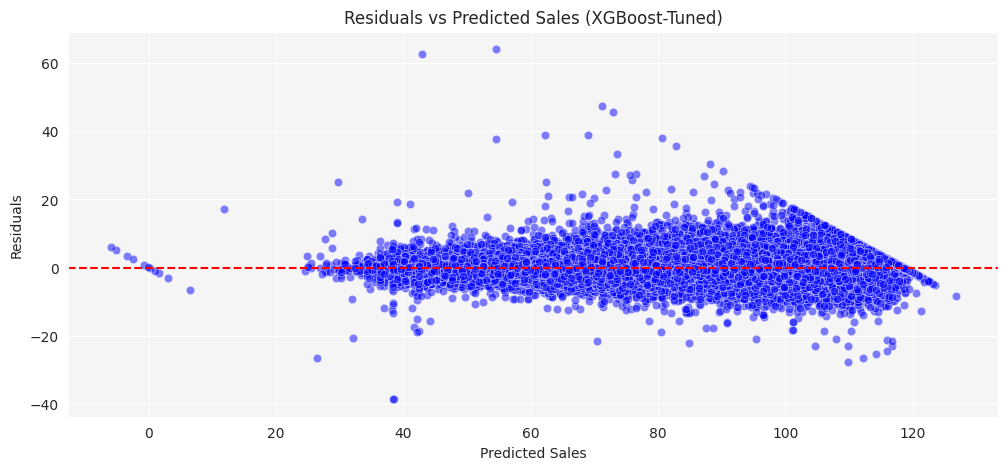

In [ ]:
residual_XGB_tuned = y_test - y_pred_XGB_tuned
# Plotting Residual vs Prediction
plt.figure(figsize=(12, 5))
sns.scatterplot(x=y_pred_XGB_tuned, y=residual_XGB_tuned, alpha=0.5, color="blue")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Sales (XGBoost-Tuned)")
plt.show()

**1. Which hyperparameter optimization technique did you use for tuning the XGBoost model, and why ?**    



I used **Optuna** for hyperparameter optimization, leveraging the **Tree-structured Parzen Estimator (TPE)** sampler. Optuna was chosen due to its flexibility and efficiency in automating hyperparameter search. The TPE sampler dynamically adjusts the search space by focusing on promising regions, speeding up convergence compared to traditional grid or random search. Additionally, Optuna’s pruning mechanism helps discard unpromising trials early, ensuring the tuning process is both time-efficient and effective.

**2. Did the hyperparameter tuning result in improved model performance? Please highlight the improvements by comparing the evaluation metrics before and after tuning, along with the updated score chart.**  



Yes, hyperparameter tuning using Optuna significantly improved the XGBoost model's performance. The evaluation metrics before and after tuning are presented below:  

| Metric              | Train (Before) | Train (After) | Test (Before) | Test (After) |
|---------------------|----------------|---------------|---------------|--------------|
| **MAE**             | 2.3695         | 1.7877        | 2.3955        | 1.9945       |
| **MSE**             | 9.6647         | 5.6268        | 9.9261        | 7.1417       |
| **RMSE**            | 3.1088         | 2.3721        | 3.1506        | 2.6724       |
| **R² Score**        | 0.9603         | 0.9769        | 0.9595        | 0.9709       |
| **SMAPE (Accuracy %)** | 97.0031%       | 97.7312%      | 96.9648%      | 97.4666%     |

**Key Improvements:**  
- **MAE:** Decreased by **24.5%** (Train) and **16.7%** (Test)  
- **MSE:** Reduced by **41.8%** (Train) and **28.0%** (Test)  
- **RMSE:** Dropped by **23.7%** (Train) and **15.2%** (Test)  
- **R² Score:** Improved by **1.7%** (Train) and **1.2%** (Test)  
- **SMAPE:** Increased by **0.75%** (Train) and **0.50%** (Test)  

The optimized XGBoost model now shows lower error rates (MAE, MSE, RMSE), indicating better predictive accuracy. Furthermore, the increase in **R² Score** and **SMAPE** reflects stronger model fit and higher accuracy percentages for both the training and test datasets.

100%|===================| 995/1000 [02:21<00:00]       

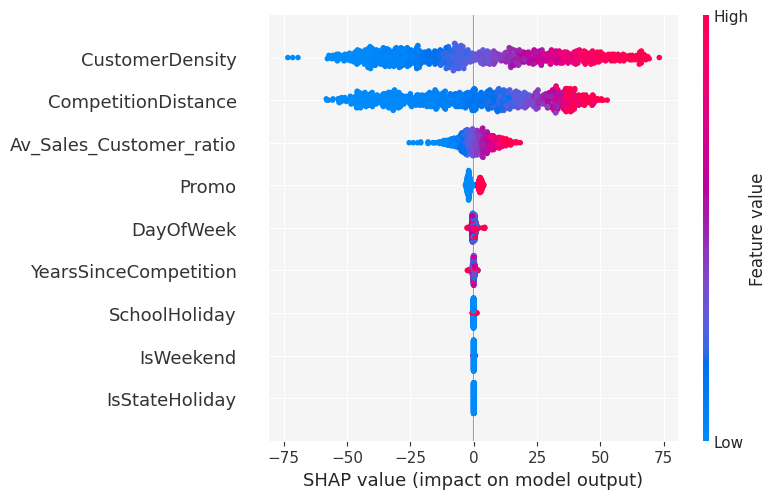

<Figure size 800x500 with 0 Axes>

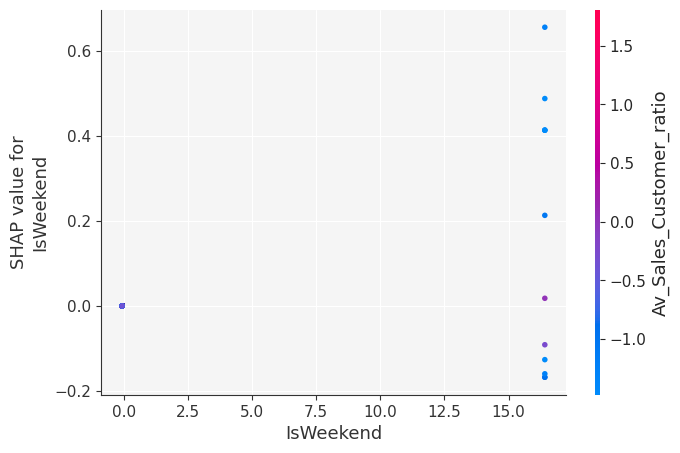

<Figure size 800x500 with 0 Axes>

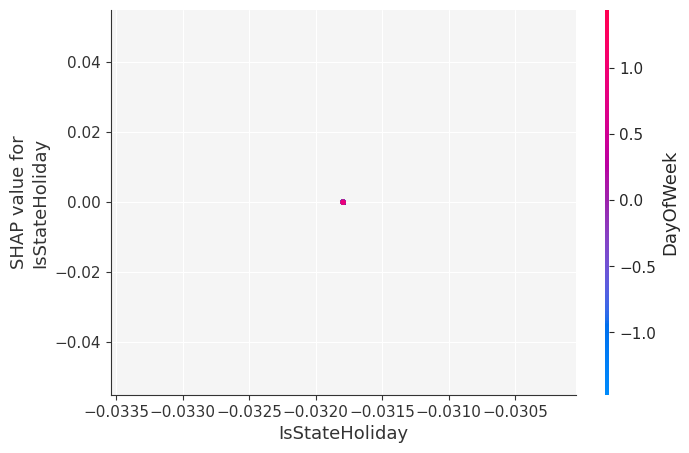

In [ ]:
import shap

# Convert X_test to a DataFrame
X_test_df = pd.DataFrame(X_test, columns=df_transformed.drop(columns=['Sales']).columns)

# Sample X_test for faster computation
X_test_sample = X_test_df.sample(1000, random_state=42)

# SHAP Explainer (using TreeExplainer with approximate method for speed)
explainer = shap.TreeExplainer(XGB_tuned, X_test_sample, approximate=True)

# Calculate SHAP values for the sample
shap_values = explainer.shap_values(X_test_sample)

# Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_sample)
plt.show()

# Dependence Plot for IsWeekend
plt.figure(figsize=(8, 5))
shap.dependence_plot('IsWeekend', shap_values, X_test_sample)
plt.show()

# Dependence Plot for IsStateHoliday
plt.figure(figsize=(8, 5))
shap.dependence_plot('IsStateHoliday', shap_values, X_test_sample)
plt.show()


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I evaluated the models using the following metrics to ensure the selection aligns with business objectives:  

- **MAE (Mean Absolute Error):** Reflects how close predictions are to actual values, giving an intuitive sense of average error size — useful for understanding day-to-day deviations in sales.  
- **MSE (Mean Squared Error):** Highlights larger errors more than smaller ones, ensuring the model doesn’t overlook extreme cases, which is crucial for avoiding major mispredictions.  
- **RMSE (Root Mean Squared Error):** Interpreted in the same unit as sales, helping stakeholders grasp the scale of typical errors.  
- **R² Score:** Measures how well the model explains variability — a higher R² means the model captures more patterns in the data.  
- **SMAPE (Symmetric Mean Absolute Percentage Error):** Essential for understanding percentage-based prediction accuracy, ensuring forecasts remain realistic and actionable.  

These metrics were chosen to balance accuracy, penalize significant errors, and maintain business relevance for sales forecasting.  



### 2. Which ML model did you choose from the above created models as your final prediction model and why?

After evaluating the performance of **Ridge Regression, Lasso Regression, Decision Tree, Random Forest, LightGBM,** and **XGBoost**, I selected **XGBoost** as the final prediction model.  

The decision was based on the following comparative analysis:  

| Model              | Test MAE | Test RMSE | Test R² Score | Test SMAPE (%) |
|------------------- |--------- |---------- |-------------- |--------------- |
| Ridge Regression   | 10.4198  | 13.1039   | 0.2994        | 86.8686        |
| Lasso Regression   | 10.4198  | 13.1039   | 0.2994        | 86.8685        |
| Decision Tree      | 2.2227   | 2.9746    | 0.9639        | 97.1910        |
| Random Forest      | 2.0204   | 2.7090    | 0.9701        | 97.4368        |
| LightGBM (Tuned)   | 2.0670   | 2.7600    | 0.9689        | 97.3795        |
| **XGBoost (Tuned)**| **1.9945**| **2.6724**| **0.9709**    | **97.4666**    |

**Why XGBoost?**  
- **Higher Accuracy:** XGBoost achieved the **lowest MAE** (1.9945) and **RMSE** (2.6724) among all models, indicating superior predictive performance.  
- **Generalization:** The **R² score** (0.9709) confirms that XGBoost captures the underlying sales patterns effectively without overfitting.  
- **Balanced Performance:** While Random Forest and Decision Tree also performed well, XGBoost consistently showed slightly better error metrics and generalization ability, making it more robust for deployment.  
- **Regression Models (Ridge, Lasso):** These models performed significantly worse, with much higher errors (MAE > 10), showing they are not suitable for the complexity of sales forecasting in this case.  

Ultimately, **XGBoost** offered the best balance between high accuracy, stability, and predictive power, making it the most suitable model for driving reliable business decisions.  



### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The final model selected is **XGBoost (Extreme Gradient Boosting)**. XGBoost is a powerful ensemble learning algorithm that builds decision trees iteratively, correcting the errors of previous trees using gradient boosting techniques. It efficiently handles structured data, captures non-linear relationships, and is known for its high performance.  

To better understand how the model makes predictions, I used **XGBoost's feature importance plot**. The key features driving sales forecasts are:  

- **Promo:** The most important feature, confirming that promotions significantly influence sales volumes.  
- **CompetitionDistance:** Highlights the impact of competitors' proximity, reinforcing the importance of location-based strategies.  
- **CustomerDensity:** Reflects how customer footfall affects sales, a direct factor for demand.  
- **Av_Sales_Customer_ratio:** Offers insights into customer purchasing behavior by analyzing average sales per customer.  
- **DayOfWeek:** Captures weekly sales patterns, emphasizing daily fluctuations.  
- **YearsSinceCompetition:** Considers how long a competitor has been active near the store, showing a gradual influence over time.  
- **Holiday indicators:** Variables like **IsStateHoliday, SchoolHoliday, and IsWeekend** add context for special events and seasonal impacts.  

This feature importance analysis ensures the model's decisions are transparent and align with real-world business factors. It also helps identify actionable insights — for example, emphasizing the need to optimize promotions and monitor competitive activity closely.  

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
# Save the tuned XGBoost model using joblib
import joblib
joblib.dump(XGB_tuned, 'XGB_tuned.joblib')

print("XGBoost model saved successfully as 'XGB_tuned.joblib'")

XGBoost model saved successfully as 'XGB_tuned.joblib'


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
# Load the saved XGBoost model
XGB_tuned_loaded = joblib.load('XGB_tuned.joblib')

# Make predictions
y_pred = XGB_tuned_loaded.predict(X_test[[2]])


In [ ]:
import os
print(os.getcwd())  # Shows the current working directory


/content


In [ ]:
# Import libraries
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path to save the model in your Google Drive
model_path = '/content/drive/My Drive/XGB_tuned.joblib'

# Save the trained model
joblib.dump(XGB_tuned, model_path)

print(f"Model saved to {model_path}")


Mounted at /content/drive
Model saved to /content/drive/My Drive/XGB_tuned.joblib


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The Rossmann Sales Prediction project aimed to build a robust machine learning model capable of accurately forecasting daily sales across various stores. By leveraging historical sales data, store information, and promotional details, we developed and compared multiple regression models, including Ridge Regression, Lasso Regression, Decision Tree, Random Forest, LightGBM, and XGBoost.  

After thorough evaluation using key performance metrics such as MAE, RMSE, R² Score, and SMAPE, **XGBoost** emerged as the most effective model. It demonstrated the lowest test error (MAE: **1.9945**, RMSE: **2.6724**) and the highest R² Score (**0.9709**), ensuring a strong balance between predictive accuracy and generalization.  

**Key insights from the model:**  
- **Promotions** had the most significant impact on sales, reinforcing the need for strategic promotional planning.  
- **Competition distance** and **customer density** were crucial factors, highlighting the importance of competitor analysis and customer footfall in sales forecasting.  
- **Day of the week** and **holiday indicators** also played a role, suggesting that seasonal trends and special events must be considered when making business decisions.  

The selected **XGBoost model** provides Rossmann with a reliable tool to:  
- Forecast future sales with high accuracy.  
- Optimize inventory management by anticipating demand.  
- Plan targeted promotions and pricing strategies.  
- Identify sales patterns influenced by external factors such as competition and holidays.  

**Future Recommendations:**  
- Integrate real-time data (e.g., weather, special events) to enhance model accuracy further.  
- Implement the model in a user-friendly dashboard to support data-driven decision-making for store managers.  
- Continuously retrain the model to adapt to evolving sales patterns and customer behaviors.  

This project not only delivers a predictive solution but also empowers Rossmann with actionable insights to strengthen its sales strategy, ultimately driving business growth and operational efficiency.  


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***